# AEROFIT BUSINESS CASE

## About Aerofit

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.


## Problem Statement

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.
Dataset

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

## About the dataset

1. Product Purchased:	KP281, KP481, or KP781
2. Age:	In years
3. Gender:	Male/Female
4. Education:	In years
5. MaritalStatus:	Single or partnered
6. Usage:	The average number of times the customer plans to use the treadmill each week.
7. Income:	Annual income (in USD)
8. Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
9. Miles:	The average number of miles the customer expects to walk/run each week
    
    
Product Portfolio:

1. The KP281 is an entry-level treadmill that sells for USD 1,500.
2. The KP481 is for mid-level runners that sell for USD 1,750.
3. The KP781 treadmill is having advanced features that sell for USD 2,500.

In [1]:
# Importing required packages to be used

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from IPython.display import display

In [2]:
# Importing and Reading top 10 data

df_aerofit=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')
df_aerofit.head(10)

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   KP281   18    Male         14        Single      3        4   29562    112
1   KP281   19    Male         15        Single      2        3   31836     75
2   KP281   19  Female         14     Partnered      4        3   30699     66
3   KP281   19    Male         12        Single      3        3   32973     85
4   KP281   20    Male         13     Partnered      4        2   35247     47
5   KP281   20  Female         14     Partnered      3        3   32973     66
6   KP281   21  Female         14     Partnered      3        3   35247     75
7   KP281   21    Male         13        Single      3        3   32973     85
8   KP281   21    Male         15        Single      5        4   35247    141
9   KP281   21  Female         15     Partnered      2        3   37521     85

## General Analysis

In [3]:
# Defining the shape and dimension of data

a = df_aerofit.shape
b = df_aerofit.ndim
print("Shape-->", a,'\n',"Dimension-->",b)

Shape--> (180, 9) 
 Dimension--> 2


### Remarks: -
    1. There are 180 rows and 9 columns present in the dataset.
    2. Its 2-d dataset by nature

In [4]:
# Checking general info of cols

df_aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


### Remarks: -
    1. There are 3 string type columns (product, gender, maritalstatus)
    2. Rest all are integer type

In [5]:
# Overall stats of entire dataset

df_aerofit.describe(include="all")

Product         Age Gender   Education MaritalStatus       Usage  \
count      180  180.000000    180  180.000000           180  180.000000   
unique       3         NaN      2         NaN             2         NaN   
top      KP281         NaN   Male         NaN     Partnered         NaN   
freq        80         NaN    104         NaN           107         NaN   
mean       NaN   28.788889    NaN   15.572222           NaN    3.455556   
std        NaN    6.943498    NaN    1.617055           NaN    1.084797   
min        NaN   18.000000    NaN   12.000000           NaN    2.000000   
25%        NaN   24.000000    NaN   14.000000           NaN    3.000000   
50%        NaN   26.000000    NaN   16.000000           NaN    3.000000   
75%        NaN   33.000000    NaN   16.000000           NaN    4.000000   
max        NaN   50.000000    NaN   21.000000           NaN    7.000000   

           Fitness         Income       Miles  
count   180.000000     180.000000  180.000000  
unique         NaN            NaN         NaN  
top            NaN            NaN         NaN  
freq           NaN            NaN         NaN  
mean      3.311111   53719.577778  103.194444  
std       0.958869   16506.684226   51.863605  
min       1.000000   29562.000000   21.000000  
25%       3.000000   44058.750000   66.000000  
50%       3.000000   50596.500000   94.000000  
75%       4.000000   58668.000000  114.750000  
max       5.000000  104581.000000  360.000000

### Remarks: -
    1. These are the overall stats of the dataset
    2. A lot of NaN values are present for numerical related calculation like mean, etc. , since they are object type by nature.
    3. The overall mean of Age= 28.78 ;  There are more Male compared to Female ;  There are more partnered persons (maritalstatus) ; 
       KP281 is the most demanded product as compared to rest

In [6]:
# Categorical Data Description

df_aerofit.describe(include= object).T

count unique        top freq
Product         180      3      KP281   80
Gender          180      2       Male  104
MaritalStatus   180      2  Partnered  107

### Remarks: -
    1. This is solely targetting the object datatype columns overall statistics
    2. There are 3 unique products and 2 unique Gender/Maritalstatus values present in entire dataset
    3. The topmost consecutive value and its freq of each of the column values are present in the last
       2 columns (in above result)

In [7]:
# Null/Empty values in dataset

df_aerofit.isna().sum().sort_values(ascending=False)

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

### Remarks: -
    1. This is a check on the number of nulls/empty values present in the entire dataset
    2. There are no nulls/empty values present in the dataset for any of the column values

In [8]:
# Finding duplicate rows based on all columns

duplicate_rows = df_aerofit[df_aerofit.duplicated()]

# Display the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

# Count the total number of duplicate rows
num_duplicates = len(duplicate_rows)

print(f"Total number of duplicate rows: {num_duplicates}")

Duplicate Rows:
Empty DataFrame
Columns: [Product, Age, Gender, Education, MaritalStatus, Usage, Fitness, Income, Miles]
Index: []
Total number of duplicate rows: 0


### Remarks: -
    1. This is solely targetting the number of duplicates across any of the data
    2. There are no duplicates present in the entire dataset

In [9]:
# Checking for value ranges (e.g., numeric columns should not have negative values)

numeric_columns = df_aerofit.select_dtypes(include=['int', 'float']).columns
value_range_issues = (df_aerofit[numeric_columns] < 0).any()

print("\nValue Range Issues:")
print(value_range_issues)


Value Range Issues:
Age          False
Education    False
Usage        False
Fitness      False
Income       False
Miles        False
dtype: bool


### Remarks: -
    1. This is for checking if there is any weird or unexpected data present under the integer columns
    2. There are no weird values and only numeric data is present across all the rows for these integer columns

## Non-Graphical Analysis

### Uniques and Value counts

In [10]:
# Unique values for Products

print("Unique values are: -")
print(df_aerofit['Product'].unique())

# Value counts
print("\nValue counts are: -")
print(df_aerofit['Product'].value_counts().reset_index().to_string(index=False, header=['Product', 'Count']))

Unique values are: -
['KP281' 'KP481' 'KP781']

Value counts are: -
Product Count
  KP281    80
  KP481    60
  KP781    40


### Remarks: -
    1. There are 3 unique values for product type in the entire dataset
    2. The unique counts of each values are as displayed above:- KP281=80 times it occurred in the dataset ,etc.

In [11]:
# Unique values for Age

print("Unique values are: -")
print(np.sort(df_aerofit['Age'].unique()))

# Value counts
print("\nCounts of occurences for each Age(ordered by desc w.r.t counts): -")
age_cnt=df_aerofit['Age'].value_counts().reset_index()
age_cnt.columns=['Age', 'Count']
age_cnt1=age_cnt.sort_values(by='Count',ascending=False)
print(age_cnt1.to_string(index=False))

Unique values are: -
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 50]

Counts of occurences for each Age(ordered by desc w.r.t counts): -
 Age  Count
  25     25
  23     18
  24     12
  26     12
  28      9
  35      8
  33      8
  30      7
  38      7
  21      7
  22      7
  27      7
  31      6
  34      6
  29      6
  40      5
  20      5
  32      4
  19      4
  48      2
  37      2
  45      2
  47      2
  46      1
  50      1
  18      1
  44      1
  43      1
  41      1
  39      1
  36      1
  42      1


### Remarks: -
    1. There are 32 unique values for Age in the entire dataset
    2. The unique counts of each values are as displayed above:- Age 25 =>25 times it occurred in the dataset ,etc.

In [12]:
# Unique values for Gender

print("Unique values are: -")
print(df_aerofit['Gender'].unique())

# Value counts
print("\nValue counts are: -")
print(df_aerofit['Gender'].value_counts().reset_index().to_string(index=False, header=['Gender', 'Count']))

Unique values are: -
['Male' 'Female']

Value counts are: -
Gender Count
  Male   104
Female    76


### Remarks: -
    1. There are 2 unique values for Gender in the entire dataset
    2. The unique counts of each values are as displayed above:- Male =>104 are there in data ,etc.

In [13]:
# Unique values for Education

print("Unique values are: -")
print(np.sort(df_aerofit['Education'].unique()))

# Value counts
print("\nCounts of occurences for each Education(ordered by desc w.r.t counts): -")
edu_cnt=df_aerofit['Education'].value_counts().reset_index()
edu_cnt.columns=['Education', 'Count']
edu_cnt1=edu_cnt.sort_values(by='Count',ascending=False)
print(edu_cnt1.to_string(index=False))

Unique values are: -
[12 13 14 15 16 18 20 21]

Counts of occurences for each Education(ordered by desc w.r.t counts): -
 Education  Count
        16     85
        14     55
        18     23
        15      5
        13      5
        12      3
        21      3
        20      1


### Remarks: -
    1. There are 8 unique values for Education in the entire dataset
    2. The unique counts of each values are as displayed above:- 85 people have 16years education ,etc.

In [14]:
# Unique values for MaritalStatus

print("Unique values are: -")
print(df_aerofit['MaritalStatus'].unique())

# Value counts
print("\nValue counts are: -")
print(df_aerofit['MaritalStatus'].value_counts().reset_index().to_string(index=False, header=['MaritalStatus', 'Count']))

Unique values are: -
['Single' 'Partnered']

Value counts are: -
MaritalStatus Count
    Partnered   107
       Single    73


### Remarks: -
    1. There are 2 unique values for MaritalStatus in the entire dataset
    2. The unique counts of each values are as displayed above:- Married => 107 people in our data ,etc.

In [15]:
# Unique values for Usage

print("Unique values are: -")
print(np.sort(df_aerofit['Usage'].unique()))

# Value counts
print("\nCounts of occurences for each Usage(ordered by desc w.r.t counts): -")
usag_cnt=df_aerofit['Usage'].value_counts().reset_index()
usag_cnt.columns=['Usage', 'Count']
usag_cnt1=usag_cnt.sort_values(by='Count',ascending=False)
print(usag_cnt1.to_string(index=False))

Unique values are: -
[2 3 4 5 6 7]

Counts of occurences for each Usage(ordered by desc w.r.t counts): -
 Usage  Count
     3     69
     4     52
     2     33
     5     17
     6      7
     7      2


### Remarks: -
    1. There are 6 unique values for Usage in the entire dataset
    2. The unique counts of each values are as displayed above:-69 people use 3 times a week on an average ,etc.

In [16]:
# Unique values for Fitness

print("Unique values are: -")
print(np.sort(df_aerofit['Fitness'].unique()))

# Value counts
print("\nCounts of occurences for each Fitness(ordered by desc w.r.t counts): -")
fitn_cnt=df_aerofit['Fitness'].value_counts().reset_index()
fitn_cnt.columns=['Fitness', 'Count']
fitn_cnt1=fitn_cnt.sort_values(by='Count',ascending=False)
print(fitn_cnt1.to_string(index=False))

Unique values are: -
[1 2 3 4 5]

Counts of occurences for each Fitness(ordered by desc w.r.t counts): -
 Fitness  Count
       3     97
       5     31
       2     26
       4     24
       1      2


### Remarks: -
    1. There are 5 unique values for Fitness level in the entire dataset
    2. The unique counts of each values are as displayed above:- Fitness level 3 => 97 among all,etc.

In [17]:
# Unique values for Income

print("Unique values are: -")
print(np.sort(df_aerofit['Income'].unique()))

# Value counts
print("\nCounts of occurences for each Income(ordered by desc w.r.t counts): -")
inc_cnt=df_aerofit['Income'].value_counts().reset_index()
inc_cnt.columns=['Income', 'Count']
inc_cnt1=inc_cnt.sort_values(by='Count',ascending=False)
print(inc_cnt1.to_string(index=False))

Unique values are: -
[ 29562  30699  31836  32973  34110  35247  36384  37521  38658  39795
  40932  42069  43206  44343  45480  46617  47754  48556  48658  48891
  49801  50028  51165  52290  52291  52302  53439  53536  54576  54781
  55713  56850  57271  57987  58516  59124  60261  61006  61398  62251
  62535  64741  64809  65220  67083  68220  69721  70966  74701  75946
  77191  83416  85906  88396  89641  90886  92131  95508  95866  99601
 103336 104581]

Counts of occurences for each Income(ordered by desc w.r.t counts): -
 Income  Count
  45480     14
  52302      9
  46617      8
  54576      8
  53439      8
  50028      7
  51165      7
  40932      6
  48891      5
  32973      5
  35247      5
  38658      5
  34110      5
  43206      5
  36384      4
  44343      4
  57987      4
  64809      3
  90886      3
  60261      3
  92131      3
  59124      3
  89641      2
 104581      2
  37521      2
  39795      2
  42069      2
  67083      2
  56850      2
  61398      2
 

### Remarks: -
    1. There are 62 unique values for Incomes in the entire dataset
    2. The unique counts of each values are as displayed above:-14 people earn $45480 anually ,etc.

In [18]:
# Unique values for Miles

print("Unique values are: -")
print(np.sort(df_aerofit['Miles'].unique()))

# Value counts
print("\nCounts of occurences for each Miles(ordered by desc w.r.t counts): -")
mil_cnt=df_aerofit['Miles'].value_counts().reset_index()
mil_cnt.columns=['Miles', 'Count']
mil_cnt1=mil_cnt.sort_values(by='Count',ascending=False)
print(mil_cnt1.to_string(index=False))

Unique values are: -
[ 21  38  42  47  53  56  64  66  74  75  80  85  94  95 100 103 106 112
 113 120 127 132 140 141 150 160 169 170 180 188 200 212 240 260 280 300
 360]

Counts of occurences for each Miles(ordered by desc w.r.t counts): -
 Miles  Count
    85     27
    95     12
    66     10
    75     10
    47      9
   106      9
    94      8
   113      8
    53      7
   100      7
    56      6
    64      6
   180      6
   200      6
   127      5
   160      5
    42      4
   150      4
   120      3
   103      3
    38      3
   170      3
    74      3
   132      2
   141      2
   280      1
   260      1
   300      1
   240      1
   112      1
   212      1
    80      1
   140      1
    21      1
   169      1
   188      1
   360      1


### Remarks: -
    1. There are 37 unique values for Miles in the entire dataset
    2. The unique counts of each values are as displayed above:-27 people walk/run average 85 miles per week,etc.

## Product preferences in relation to various factors considered (probability)

#### Product preference with single category variable (eg. product vs age, etc.)

In [19]:
# Gender wise Product Preference

crosstab_result = round(pd.crosstab(df_aerofit["Gender"], df_aerofit["Product"],margins=True,normalize='all')*100,2)
#crosstab_result
crosstab_result1 = pd.crosstab(df_aerofit["Gender"], df_aerofit["Product"],margins=True)

result_combined = pd.concat([crosstab_result, crosstab_result1], axis=1)
result_combined

Product  KP281  KP481  KP781     All  KP281  KP481  KP781  All
Gender                                                        
Female   22.22  16.11   3.89   42.22     40     29      7   76
Male     22.22  17.22  18.33   57.78     40     31     33  104
All      44.44  33.33  22.22  100.00     80     60     40  180

### Remarks: -
    1. The marginal values for products:- P(KP281)=80 (44.44%) ; P(KP481)=60 (33.33%), etc.
    2. The marginal values for Gender:- P(Female)= 76 (42.22%) & P(Male)= 104 (57.78%)
    3. The number of Female who use KP281 [Joint probability], P(Female & KP281)= 40 (22.22%).
       Same goes for others like:- P(Male & KP481)= 31 (17.22%), etc.

In [20]:
# Conditional Probability for above Gender vs Product
marginal_prob = {
    "kp281": 80,
    "kp481": 60,
    "kp781": 40,
    "Female": 76,
    "Male": 104
}

joint_prob = {
    ("kp281", "Female"): 40,
    ("kp481", "Female"): 29,
    ("kp781", "Female"): 7,
    ("kp281", "Male"): 40,
    ("kp481", "Male"): 31,
    ("kp781", "Male"): 33
}

# Defining a function to calculate conditional probability
def calculate_conditional_probability(event_A, event_B):
    # P(A and B)
    p_A_and_B = joint_prob.get((event_A, event_B), 0)
    
    # P(B)
    p_B = marginal_prob.get(event_B, 0)
    
    if p_B == 0:
        return None
    
    # Calculating P(A|B)
    p_A_given_B = (p_A_and_B / p_B)
    return p_A_given_B

# Calculating conditional probabilities in a loop-like fashion
events_A = ["kp281", "kp481", "kp781"]
events_B = ["Female", "Male"]

for event_A in events_A:
    for event_B in events_B:
        p_A_given_B = calculate_conditional_probability(event_A, event_B)
        if p_A_given_B is not None:
            print(f"P({event_A}|{event_B}) = {p_A_given_B * 100:.2f}%")

P(kp281|Female) = 52.63%
P(kp281|Male) = 38.46%
P(kp481|Female) = 38.16%
P(kp481|Male) = 29.81%
P(kp781|Female) = 9.21%
P(kp781|Male) = 31.73%


### Remarks: -
    1. The conditional probabilities (in %) of Gender vs Product are as given above in output

In [21]:
# Fitness wise Product Preference

crosstab_result = round(pd.crosstab(df_aerofit["Fitness"], df_aerofit["Product"],margins=True,normalize='all')*100,2)
crosstab_result1= pd.crosstab(df_aerofit["Fitness"], df_aerofit["Product"],margins=True)

result_combined = pd.concat([crosstab_result, crosstab_result1], axis=1)
result_combined

Product  KP281  KP481  KP781     All  KP281  KP481  KP781  All
Fitness                                                       
1         0.56   0.56   0.00    1.11      1      1      0    2
2         7.78   6.67   0.00   14.44     14     12      0   26
3        30.00  21.67   2.22   53.89     54     39      4   97
4         5.00   4.44   3.89   13.33      9      8      7   24
5         1.11   0.00  16.11   17.22      2      0     29   31
All      44.44  33.33  22.22  100.00     80     60     40  180

### Remarks: -
    1. The marginal values for products:- P(KP281)=80 (44.44%) ; P(KP481)=60 (33.33%), etc.
    2. The marginal values for Fitness:- P(1)= 2 (1.11%) & P(2)= 26 (14.44%) , etc.
    3. The number of people who use KP281 and have fitness level 1 [Joint probability], P(1 & KP281)= 1 (0.56%).
       Same goes for others like:- P(2 & KP481)= 12 (6.67%), etc.

In [22]:
# Conditional Probability for above Fitness vs Product

marginal_prob = {
    "kp281": 80,
    "kp481": 60,
    "kp781": 40,
    "1": 2,
    "2": 26,
    "3": 97,
    "4": 24,
    "5": 31
}

joint_prob = {
    ("kp281", "1"): 1,
    ("kp281", "2"): 14,
    ("kp281", "3"): 54,
    ("kp281", "4"): 9,
    ("kp281", "5"): 2,
    ("kp481", "1"): 1,
    ("kp481", "2"): 12,
    ("kp481", "3"): 39,
    ("kp481", "4"): 8,
    ("kp481", "5"): 0,
    ("kp781", "1"): 0,
    ("kp781", "2"): 0,
    ("kp781", "3"): 4,
    ("kp781", "4"): 7,
    ("kp781", "5"): 29,   
}

# Defining a function to calculate conditional probability
def calculate_conditional_probability(event_A, event_B):
    # P(A and B)
    p_A_and_B = joint_prob.get((event_A, event_B), 0)
    
    # P(B)
    p_B = marginal_prob.get(event_B, 0)
    
    if p_B == 0:
        return None
    
    # Calculate P(A|B)
    p_A_given_B = (p_A_and_B / p_B)
    return p_A_given_B

# Calculating conditional probabilities in a loop-like fashion
events_A = ["kp281", "kp481", "kp781"]
events_B = ["1", "2", "3", "4", "5"]

for event_A in events_A:
    for event_B in events_B:
        p_A_given_B = calculate_conditional_probability(event_A, event_B)
        if p_A_given_B is not None:
            print(f"P({event_A}|{event_B}) = {p_A_given_B * 100:.2f}%")

P(kp281|1) = 50.00%
P(kp281|2) = 53.85%
P(kp281|3) = 55.67%
P(kp281|4) = 37.50%
P(kp281|5) = 6.45%
P(kp481|1) = 50.00%
P(kp481|2) = 46.15%
P(kp481|3) = 40.21%
P(kp481|4) = 33.33%
P(kp481|5) = 0.00%
P(kp781|1) = 0.00%
P(kp781|2) = 0.00%
P(kp781|3) = 4.12%
P(kp781|4) = 29.17%
P(kp781|5) = 93.55%


### Remarks: -
    1. The conditional probabilities (in %) of Fitness level vs Product are as given above in output

In [23]:
# Education wise Product Preference

crosstab_result = round(pd.crosstab(df_aerofit["Education"], df_aerofit["Product"],margins=True,normalize='all')*100,2)
crosstab_result1=  pd.crosstab(df_aerofit["Education"], df_aerofit["Product"],margins=True)

result_combined = pd.concat([crosstab_result, crosstab_result1], axis=1)
result_combined

Product    KP281  KP481  KP781     All  KP281  KP481  KP781  All
Education                                                       
12          1.11   0.56   0.00    1.67      2      1      0    3
13          1.67   1.11   0.00    2.78      3      2      0    5
14         16.67  12.78   1.11   30.56     30     23      2   55
15          2.22   0.56   0.00    2.78      4      1      0    5
16         21.67  17.22   8.33   47.22     39     31     15   85
18          1.11   1.11  10.56   12.78      2      2     19   23
20          0.00   0.00   0.56    0.56      0      0      1    1
21          0.00   0.00   1.67    1.67      0      0      3    3
All        44.44  33.33  22.22  100.00     80     60     40  180

### Remarks: -
    1. The marginal values for products:- P(KP281)=80 (44.44%) ; P(KP481)=60 (33.33%), etc.
    2. The marginal values for Education:- P(12)= 3 (1.67%) & P(13)= 5 (5%) , etc.
    3. The number of people who use KP281 and have Education level 12 [Joint probability], P(12 & KP281)= 2 (1.11%).
       Same goes for others like:- P(13 & KP481)= 2 (1.11%), etc.

In [24]:
# Conditional Probability for above Education vs Product
marginal_prob = {
    "kp281": 80,
    "kp481": 60,
    "kp781": 40,
    "14": 26,
    "16": 97,
    "18": 23
}

joint_prob = {
    ("kp281", "18"): 2,
    ("kp281", "14"): 30,
    ("kp281", "16"): 39,
    ("kp481", "18"): 2,
    ("kp481", "14"): 23,
    ("kp481", "16"): 31,
    ("kp781", "14"): 2,
    ("kp781", "16"): 15,
    ("kp781", "18"): 19   
}

# Defining a function to calculate conditional probability
def calculate_conditional_probability(event_A, event_B):
    # P(A and B)
    p_A_and_B = joint_prob.get((event_A, event_B), 0)
    
    # P(B)
    p_B = marginal_prob.get(event_B, 0)
    
    if p_B == 0:
        return None
    
    # Calculate P(A|B)
    p_A_given_B = (p_A_and_B / p_B)
    return p_A_given_B

# Calculating conditional probabilities in a loop-like fashion
events_A = ["kp281", "kp481", "kp781"]
events_B = ["14", "16", "18"]

for event_A in events_A:
    for event_B in events_B:
        p_A_given_B = calculate_conditional_probability(event_A, event_B)
        if p_A_given_B is not None:
            print(f"P({event_A}|{event_B}) = {p_A_given_B * 100:.2f}%")

P(kp281|14) = 115.38%
P(kp281|16) = 40.21%
P(kp281|18) = 8.70%
P(kp481|14) = 88.46%
P(kp481|16) = 31.96%
P(kp481|18) = 8.70%
P(kp781|14) = 7.69%
P(kp781|16) = 15.46%
P(kp781|18) = 82.61%


### Remarks: -
    1. The conditional probabilities (in %) of Education level vs Product are as given above in output

In [25]:
# Age wise Product Preference

age_bins = [10, 20, 30, 40, 50]
age_labels = ['10-20','20-30', '30-40', '40-50']

# Creating age bins and add them as a new column with custom labels
df_aerofit["AgeBins"] = pd.cut(df_aerofit["Age"], bins=age_bins, labels=age_labels)

# Creating a crosstab using the age bins with custom labels and the 'Product' column
crosstab_result = round(pd.crosstab(df_aerofit["AgeBins"], df_aerofit["Product"], margins=True,normalize='all')*100,2)
crosstab_result1 = pd.crosstab(df_aerofit["AgeBins"], df_aerofit["Product"], margins=True)

result_combined = pd.concat([crosstab_result, crosstab_result1], axis=1)
result_combined

Product  KP281  KP481  KP781     All  KP281  KP481  KP781  All
AgeBins                                                       
10-20     3.33   2.22   0.00    5.56      6      4      0   10
20-30    27.22  17.22  16.67   61.11     49     31     30  110
30-40    10.56  12.78   3.33   26.67     19     23      6   48
40-50     3.33   1.11   2.22    6.67      6      2      4   12
All      44.44  33.33  22.22  100.00     80     60     40  180

### Remarks: -
    1. The marginal values for products:- P(KP281)=80 (44.44%) ; P(KP481)=60 (33.33%), etc.
    2. The marginal values for Age ranges:- P(10-20)= 10 (5.56%) & P(20-30)= 110 (61.11%) , etc.
    3. The number of people who use KP281 and have Age between 10-20 [Joint probability], P((10-20) & KP281)= 6 (3.33%).
       Same goes for others like:- P((20-30) & KP481)= 31 (17.22%), etc.

In [26]:
# Conditional Probability for above Age vs Product
marginal_prob = {
    "kp281": 80,
    "kp481": 60,
    "kp781": 40,
    "20-30": 110,
    "30-40": 48
}

joint_prob = {
    ("kp281", "20-30"): 49,
    ("kp281", "30-40"): 19,
    ("kp481", "20-30"): 31,
    ("kp481", "30-40"): 23,
    ("kp781", "20-30"): 30,
    ("kp781", "30-40"): 6
}

# Defining a function to calculate conditional probability
def calculate_conditional_probability(event_A, event_B):
    # P(A and B)
    p_A_and_B = joint_prob.get((event_A, event_B), 0)
    
    # P(B)
    p_B = marginal_prob.get(event_B, 0)
    
    if p_B == 0:
        return None
    
    # Calculate P(A|B)
    p_A_given_B = (p_A_and_B / p_B)
    return p_A_given_B

# Calculating conditional probabilities in a loop-like fashion
events_A = ["kp281", "kp481", "kp781"]
events_B = ["20-30", "30-40"]

for event_A in events_A:
    for event_B in events_B:
        p_A_given_B = calculate_conditional_probability(event_A, event_B)
        if p_A_given_B is not None:
            print(f"P({event_A}|{event_B}) = {p_A_given_B * 100:.2f}%")

P(kp281|20-30) = 44.55%
P(kp281|30-40) = 39.58%
P(kp481|20-30) = 28.18%
P(kp481|30-40) = 47.92%
P(kp781|20-30) = 27.27%
P(kp781|30-40) = 12.50%


### Remarks: -
    1. The conditional probabilities (in %) of Age range vs Product are as given above in output

In [27]:
# MaritalStatus wise Product Preference

crosstab_result = round(pd.crosstab(df_aerofit["MaritalStatus"], df_aerofit["Product"],margins=True,normalize='all')*100,2)
crosstab_result1=pd.crosstab(df_aerofit["MaritalStatus"], df_aerofit["Product"],margins=True)

result_combined = pd.concat([crosstab_result, crosstab_result1], axis=1)
result_combined

Product        KP281  KP481  KP781     All  KP281  KP481  KP781  All
MaritalStatus                                                       
Partnered      26.67  20.00  12.78   59.44     48     36     23  107
Single         17.78  13.33   9.44   40.56     32     24     17   73
All            44.44  33.33  22.22  100.00     80     60     40  180

### Remarks: -
    1. The marginal values for products:- P(KP281)=80 (44.44%) ; P(KP481)=60 (33.33%), etc.
    2. The marginal values for MaritalStatus:- P(Partnered)= 107 (59.44%) & P(single)= 73 (9.44%).
    3. The number of people who use KP281 and are married [Joint probability], P(Partnered & KP281)= 48 (26.67%).
       Same goes for others like:- P(single & KP481)= 24 (13.33%), etc.

In [28]:
# Conditional Probability for above MaritalStatus vs Product
marginal_prob = {
    "kp281": 80,
    "kp481": 60,
    "kp781": 40,
    "Partnered": 107,
    "Single": 73
}

joint_prob = {
    ("kp281", "Partnered"): 48,
    ("kp281", "Single"): 32,
    ("kp481", "Partnered"): 36,
    ("kp481", "Single"): 24,
    ("kp781", "Partnered"): 23,
    ("kp781", "Single"): 17
}

# Defining a function to calculate conditional probability
def calculate_conditional_probability(event_A, event_B):
    # P(A and B)
    p_A_and_B = joint_prob.get((event_A, event_B), 0)
    
    # P(B)
    p_B = marginal_prob.get(event_B, 0)
    
    if p_B == 0:
        return None
    
    # Calculate P(A|B)
    p_A_given_B = (p_A_and_B / p_B)
    return p_A_given_B

# Calculating conditional probabilities in a loop-like fashion
events_A = ["kp281", "kp481", "kp781"]
events_B = ["Partnered", "Single"]

for event_A in events_A:
    for event_B in events_B:
        p_A_given_B = calculate_conditional_probability(event_A, event_B)
        if p_A_given_B is not None:
            print(f"P({event_A}|{event_B}) = {p_A_given_B * 100:.2f}%")

P(kp281|Partnered) = 44.86%
P(kp281|Single) = 43.84%
P(kp481|Partnered) = 33.64%
P(kp481|Single) = 32.88%
P(kp781|Partnered) = 21.50%
P(kp781|Single) = 23.29%


### Remarks: -
    1. The conditional probabilities (in %) of MaritalStatus vs Product are as given above in output

In [29]:
# Usage wise Product Preference

Usage_bins = [1, 4, 6, 8, 10]
Usage_labels = ['1-3', '3-5', '5-7', '7-9']

# Creating Usage bins and add them as a new column with custom labels
df_aerofit["UsageBins"] = pd.cut(df_aerofit["Usage"], bins=Usage_bins, labels=Usage_labels)

# Creating a crosstab using the Usage bins with custom labels and the 'Product' column
crosstab_result = round(pd.crosstab(df_aerofit["UsageBins"], df_aerofit["Product"], margins=True,normalize='all')*100,2)
crosstab_result1= pd.crosstab(df_aerofit["UsageBins"], df_aerofit["Product"], margins=True)

result_combined = pd.concat([crosstab_result, crosstab_result1], axis=1)
result_combined

Product    KP281  KP481  KP781     All  KP281  KP481  KP781  All
UsageBins                                                       
1-3        43.33  31.67  10.56   85.56     78     57     19  154
3-5         1.11   1.67  10.56   13.33      2      3     19   24
5-7         0.00   0.00   1.11    1.11      0      0      2    2
All        44.44  33.33  22.22  100.00     80     60     40  180

### Remarks: -
    1. The marginal values for products:- P(KP281)=80 (44.44%) ; P(KP481)=60 (33.33%), etc.
    2. The marginal values for Usage:- P(1-3)= 154 (85.56%) & P(3-5)= 24 (13.33%) , etc.
    3. The number of people who use KP281 and have Usage range between 1-3 [Joint probability], P((1-3)
       & KP281)= 78 (43.33%).
       Same goes for others like:- P(3-5 & KP481)= 3 (1.67%), etc.

In [30]:
# Conditional Probability for above Usage vs Product
marginal_prob = {
    "kp281": 80,
    "kp481": 60,
    "kp781": 40,
    "1-3": 154
}

joint_prob = {
    ("kp281", "1-3"): 78,
    ("kp481", "1-3"): 57,
    ("kp781", "1-3"): 19,
}

# Defining a function to calculate conditional probability
def calculate_conditional_probability(event_A, event_B):
    # P(A and B)
    p_A_and_B = joint_prob.get((event_A, event_B), 0)
    
    # P(B)
    p_B = marginal_prob.get(event_B, 0)
    
    if p_B == 0:
        return None
    
    # Calculate P(A|B)
    p_A_given_B = (p_A_and_B / p_B)
    return p_A_given_B

# Calculating conditional probabilities in a loop-like fashion
events_A = ["kp281", "kp481", "kp781"]
events_B = ["1-3"]

for event_A in events_A:
    for event_B in events_B:
        p_A_given_B = calculate_conditional_probability(event_A, event_B)
        if p_A_given_B is not None:
            print(f"P({event_A}|{event_B}) = {p_A_given_B * 100:.2f}%")

P(kp281|1-3) = 50.65%
P(kp481|1-3) = 37.01%
P(kp781|1-3) = 12.34%


### Remarks: -
    1. The conditional probabilities (in %) of Usage level vs Product are as given above in output

In [31]:
# Income wise Product Preference

Income_bins = [0, 25000, 50000, 75000, 100000]
Income_labels = ["0-25k", "25k-50k", "50k-75k", "75k-100k"]

# Creating Income bins and add them as a new column with custom labels
df_aerofit["IncomeBins"] = pd.cut(df_aerofit["Income"], bins=Income_bins, labels=Income_labels)

# Creating a crosstab using the Income bins with custom labels and the 'Product' column
crosstab_result = round(pd.crosstab(df_aerofit["IncomeBins"], df_aerofit["Product"], margins=True,normalize='all')*100,2)
crosstab_result1= pd.crosstab(df_aerofit["IncomeBins"], df_aerofit["Product"], margins=True)

result_combined = pd.concat([crosstab_result, crosstab_result1], axis=1)
result_combined

Product     KP281  KP481  KP781     All  KP281  KP481  KP781  All
IncomeBins                                                       
25k-50k     27.12  16.95   2.82   46.89     48     30      5   83
50k-75k     18.08  16.95   7.91   42.94     32     30     14   76
75k-100k     0.00   0.00  10.17   10.17      0      0     18   18
All         45.20  33.90  20.90  100.00     80     60     37  177

### Remarks: -
    1. The marginal values for products:- P(KP281)=80 (44.44%) ; P(KP481)=60 (33.33%), etc.
    2. The marginal values for Income:- P(25k-50k)= 83 (46.89%), etc.
    3. The number of people who use KP281 and have Income range between $(25k-50k) [Joint probability], 
       P((25k-50k) & KP281)= 48 (27.12%).
       Same goes for others like:- P(50k-75k & KP481)= 30 (16.95%), etc.

In [32]:
# Conditional Probability for above Income vs Product
marginal_prob = {
    "kp281": 80,
    "kp481": 60,
    "kp781": 40,
    "25k-50k": 83
}

joint_prob = {
    ("kp281", "25k-50k"): 48,
    ("kp481", "25k-50k"): 30,
    ("kp781", "25k-50k"): 5,
}

# Defining a function to calculate conditional probability
def calculate_conditional_probability(event_A, event_B):
    # P(A and B)
    p_A_and_B = joint_prob.get((event_A, event_B), 0)
    
    # P(B)
    p_B = marginal_prob.get(event_B, 0)
    
    if p_B == 0:
        return None
    
    # Calculate P(A|B)
    p_A_given_B = (p_A_and_B / p_B)
    return p_A_given_B

# Calculating conditional probabilities in a loop-like fashion
events_A = ["kp281", "kp481", "kp781"]
events_B = ["25k-50k"]

for event_A in events_A:
    for event_B in events_B:
        p_A_given_B = calculate_conditional_probability(event_A, event_B)
        if p_A_given_B is not None:
            print(f"P({event_A}|{event_B}) = {p_A_given_B * 100:.2f}%")

P(kp281|25k-50k) = 57.83%
P(kp481|25k-50k) = 36.14%
P(kp781|25k-50k) = 6.02%


### Remarks: -
    1. The conditional probabilities (in %) of Income range vs Product are as given above in output

In [33]:
# Miles wise Product Preference

Miles_bins = [0, 100, 200, 300, 400]
Miles_labels =["0-100", "100-200", "200-300", "300-400"]

# Creating Miles bins and add them as a new column with custom labels
df_aerofit["MilesBins"] = pd.cut(df_aerofit["Miles"], bins=Miles_bins, labels=Miles_labels)

# Creating a crosstab using the Miles bins with custom labels and the 'Product' column
crosstab_result = round(pd.crosstab(df_aerofit["MilesBins"], df_aerofit["Product"], margins=True,normalize='all')*100,2)
crosstab_result1= pd.crosstab(df_aerofit["MilesBins"], df_aerofit["Product"], margins=True)

result_combined = pd.concat([crosstab_result, crosstab_result1], axis=1)
result_combined

Product    KP281  KP481  KP781     All  KP281  KP481  KP781  All
MilesBins                                                       
0-100      34.44  24.44   4.44   63.33     62     44      8  114
100-200    10.00   8.33  15.00   33.33     18     15     27   60
200-300     0.00   0.56   2.22    2.78      0      1      4    5
300-400     0.00   0.00   0.56    0.56      0      0      1    1
All        44.44  33.33  22.22  100.00     80     60     40  180

### Remarks: -
    1. The marginal values for products:- P(KP281)=80 (44.44%) ; P(KP481)=60 (33.33%), etc.
    2. The marginal values for Miles:- P(0-100)= 114 (34.44%), etc.
    3. The number of people who use KP281 and have covered miles between 0-100 [Joint probability], 
       P(0-100 & KP281)= 62 (34.44%).
       Same goes for others like:- P(100-200 & KP481)= 15 (8.33%), etc.

In [34]:
# Conditional Probability for above Miles vs Product
marginal_prob = {
    "kp281": 80,
    "kp481": 60,
    "kp781": 40,
    "0-100": 114
}

joint_prob = {
    ("kp281", "0-100"): 62,
    ("kp481", "0-100"): 44,
    ("kp781", "0-100"): 8,
}

# Defining a function to calculate conditional probability
def calculate_conditional_probability(event_A, event_B):
    # P(A and B)
    p_A_and_B = joint_prob.get((event_A, event_B), 0)
    
    # P(B)
    p_B = marginal_prob.get(event_B, 0)
    
    if p_B == 0:
        return None
    
    # Calculate P(A|B)
    p_A_given_B = (p_A_and_B / p_B)
    return p_A_given_B

# Calculating conditional probabilities in a loop-like fashion
events_A = ["kp281", "kp481", "kp781"]
events_B = ["0-100"]

for event_A in events_A:
    for event_B in events_B:
        p_A_given_B = calculate_conditional_probability(event_A, event_B)
        if p_A_given_B is not None:
            print(f"P({event_A}|{event_B}) = {p_A_given_B * 100:.2f}%")

P(kp281|0-100) = 54.39%
P(kp481|0-100) = 38.60%
P(kp781|0-100) = 7.02%


### Remarks: -
    1. The conditional probabilities (in %) of Miles vs Product are as given above in output

#### Product preference with combination of category variables (eg. product vs age+gender, etc.) keeping product as base column

In [35]:
# Age wise Product Preference w.r.t Gender

result = df_aerofit.groupby(["Age", "Gender", "Product"])["Product"].count()
crosstab_result = pd.crosstab([df_aerofit["Age"], df_aerofit["Gender"], df_aerofit["Product"]],
                               [df_aerofit["Gender"], df_aerofit["Product"]],
                               rownames=['Age', 'Gender', 'Product'],
                               colnames=['Gender', 'Product'],
                               dropna=False)

crosstab_result1 = round(pd.crosstab([df_aerofit["Age"], df_aerofit["Gender"], df_aerofit["Product"]],
                               [df_aerofit["Gender"], df_aerofit["Product"]],
                               rownames=['Age', 'Gender', 'Product'],
                               colnames=['Gender', 'Product'],
                               dropna=False,normalize='all')*100,2)
display(crosstab_result, crosstab_result1)

Gender             Female              Male            
Product             KP281 KP481 KP781 KP281 KP481 KP781
Age Gender Product                                     
18  Female KP281        0     0     0     0     0     0
           KP481        0     0     0     0     0     0
           KP781        0     0     0     0     0     0
    Male   KP281        0     0     0     1     0     0
           KP481        0     0     0     0     0     0
...                   ...   ...   ...   ...   ...   ...
50  Female KP481        0     0     0     0     0     0
           KP781        0     0     0     0     0     0
    Male   KP281        0     0     0     0     0     0
           KP481        0     0     0     0     0     0
           KP781        0     0     0     0     0     0

[192 rows x 6 columns]

Gender             Female              Male            
Product             KP281 KP481 KP781 KP281 KP481 KP781
Age Gender Product                                     
18  Female KP281      0.0   0.0   0.0  0.00   0.0   0.0
           KP481      0.0   0.0   0.0  0.00   0.0   0.0
           KP781      0.0   0.0   0.0  0.00   0.0   0.0
    Male   KP281      0.0   0.0   0.0  0.56   0.0   0.0
           KP481      0.0   0.0   0.0  0.00   0.0   0.0
...                   ...   ...   ...   ...   ...   ...
50  Female KP481      0.0   0.0   0.0  0.00   0.0   0.0
           KP781      0.0   0.0   0.0  0.00   0.0   0.0
    Male   KP281      0.0   0.0   0.0  0.00   0.0   0.0
           KP481      0.0   0.0   0.0  0.00   0.0   0.0
           KP781      0.0   0.0   0.0  0.00   0.0   0.0

[192 rows x 6 columns]

### Remarks: -
    1. From above graph, 1st graph gives the value in whole number and 2nd one gives probability percentages
    2. The person who is male and has an age of 18 and has brought KP281 =1 (1st graph)
       and its probability % is 0.56% (2nd graph)
    3. Same way of interpretation goes for rest of the data above

In [36]:
# Age wise Product Preference w.r.t Education

result = df_aerofit.groupby(["Age", "Education", "Product"])["Product"].count()
crosstab_result = pd.crosstab([df_aerofit["Age"], df_aerofit["Education"], df_aerofit["Product"]],
                               [df_aerofit["Education"], df_aerofit["Product"]],
                               rownames=['Age', 'Education', 'Product'],
                               colnames=['Education', 'Product'],
                               dropna=False)

crosstab_result1 = round(pd.crosstab([df_aerofit["Age"], df_aerofit["Education"], df_aerofit["Product"]],
                               [df_aerofit["Education"], df_aerofit["Product"]],
                               rownames=['Age', 'Education', 'Product'],
                               colnames=['Education', 'Product'],
                               dropna=False,normalize='all')*100,2)
display(crosstab_result, crosstab_result1)

Education                12                13                14              \
Product               KP281 KP481 KP781 KP281 KP481 KP781 KP281 KP481 KP781   
Age Education Product                                                         
18  12        KP281       0     0     0     0     0     0     0     0     0   
              KP481       0     0     0     0     0     0     0     0     0   
              KP781       0     0     0     0     0     0     0     0     0   
    13        KP281       0     0     0     0     0     0     0     0     0   
              KP481       0     0     0     0     0     0     0     0     0   
...                     ...   ...   ...   ...   ...   ...   ...   ...   ...   
50  20        KP481       0     0     0     0     0     0     0     0     0   
              KP781       0     0     0     0     0     0     0     0     0   
    21        KP281       0     0     0     0     0     0     0     0     0   
              KP481       0     0     0     0     0     0     0     0     0   
              KP781       0     0     0     0     0     0     0     0     0   

Education                15  ...    16    18                20              \
Product               KP281  ... KP781 KP281 KP481 KP781 KP281 KP481 KP781   
Age Education Product        ...                                             
18  12        KP281       0  ...     0     0     0     0     0     0     0   
              KP481       0  ...     0     0     0     0     0     0     0   
              KP781       0  ...     0     0     0     0     0     0     0   
    13        KP281       0  ...     0     0     0     0     0     0     0   
              KP481       0  ...     0     0     0     0     0     0     0   
...                     ...  ...   ...   ...   ...   ...   ...   ...   ...   
50  20        KP481       0  ...     0     0     0     0     0     0     0   
              KP781       0  ...     0     0     0     0     0     0     0   
    21        KP281       0  ...     0     0     0     0     0     0     0   
              KP481       0  ...     0     0     0     0     0     0     0   
              KP781       0  ...     0     0     0     0     0     0     0   

Education                21              
Product               KP281 KP481 KP781  
Age Education Product                    
18  12        KP281       0     0     0  
              KP481       0     0     0  
              KP781       0     0     0  
    13        KP281       0     0     0  
              KP481       0     0     0  
...                     ...   ...   ...  
50  20        KP481       0     0     0  
              KP781       0     0     0  
    21        KP281       0     0     0  
              KP481       0     0     0  
              KP781       0     0     0  

[768 rows x 24 columns]

Education                12                13                14              \
Product               KP281 KP481 KP781 KP281 KP481 KP781 KP281 KP481 KP781   
Age Education Product                                                         
18  12        KP281     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
              KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
              KP781     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
    13        KP281     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
              KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...                     ...   ...   ...   ...   ...   ...   ...   ...   ...   
50  20        KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
              KP781     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
    21        KP281     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
              KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
              KP781     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

Education                15  ...    16    18                20              \
Product               KP281  ... KP781 KP281 KP481 KP781 KP281 KP481 KP781   
Age Education Product        ...                                             
18  12        KP281     0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
              KP481     0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
              KP781     0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
    13        KP281     0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
              KP481     0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...                     ...  ...   ...   ...   ...   ...   ...   ...   ...   
50  20        KP481     0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
              KP781     0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
    21        KP281     0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
              KP481     0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
              KP781     0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

Education                21              
Product               KP281 KP481 KP781  
Age Education Product                    
18  12        KP281     0.0   0.0   0.0  
              KP481     0.0   0.0   0.0  
              KP781     0.0   0.0   0.0  
    13        KP281     0.0   0.0   0.0  
              KP481     0.0   0.0   0.0  
...                     ...   ...   ...  
50  20        KP481     0.0   0.0   0.0  
              KP781     0.0   0.0   0.0  
    21        KP281     0.0   0.0   0.0  
              KP481     0.0   0.0   0.0  
              KP781     0.0   0.0   0.0  

[768 rows x 24 columns]

### Remarks: -
    1. From above graph, 1st graph gives the value in whole number and 2nd one gives probability percentages
    2. The person who has education of 12 and has an age of 18 and has brought KP281 =0 (1st graph)
       and its probability % is 0% (2nd graph)
    3. Same way of interpretation goes for rest of the data above

In [37]:
# Age wise Product Preference w.r.t MaritalStatus

result = df_aerofit.groupby(["Age", "MaritalStatus", "Product"])["Product"].count()
crosstab_result = pd.crosstab([df_aerofit["Age"], df_aerofit["MaritalStatus"], df_aerofit["Product"]],
                               [df_aerofit["MaritalStatus"], df_aerofit["Product"]],
                               rownames=['Age', 'MaritalStatus', 'Product'],
                               colnames=['MaritalStatus', 'Product'],
                               dropna=False)

crosstab_result1 = round(pd.crosstab([df_aerofit["Age"], df_aerofit["MaritalStatus"], df_aerofit["Product"]],
                               [df_aerofit["MaritalStatus"], df_aerofit["Product"]],
                               rownames=['Age', 'MaritalStatus', 'Product'],
                               colnames=['MaritalStatus', 'Product'],
                               dropna=False,normalize='all')*100,2)
display(crosstab_result, crosstab_result1)

MaritalStatus             Partnered             Single            
Product                       KP281 KP481 KP781  KP281 KP481 KP781
Age MaritalStatus Product                                         
18  Partnered     KP281           0     0     0      0     0     0
                  KP481           0     0     0      0     0     0
                  KP781           0     0     0      0     0     0
    Single        KP281           0     0     0      1     0     0
                  KP481           0     0     0      0     0     0
...                             ...   ...   ...    ...   ...   ...
50  Partnered     KP481           0     0     0      0     0     0
                  KP781           0     0     0      0     0     0
    Single        KP281           0     0     0      0     0     0
                  KP481           0     0     0      0     0     0
                  KP781           0     0     0      0     0     0

[192 rows x 6 columns]

MaritalStatus             Partnered             Single            
Product                       KP281 KP481 KP781  KP281 KP481 KP781
Age MaritalStatus Product                                         
18  Partnered     KP281         0.0   0.0   0.0   0.00   0.0   0.0
                  KP481         0.0   0.0   0.0   0.00   0.0   0.0
                  KP781         0.0   0.0   0.0   0.00   0.0   0.0
    Single        KP281         0.0   0.0   0.0   0.56   0.0   0.0
                  KP481         0.0   0.0   0.0   0.00   0.0   0.0
...                             ...   ...   ...    ...   ...   ...
50  Partnered     KP481         0.0   0.0   0.0   0.00   0.0   0.0
                  KP781         0.0   0.0   0.0   0.00   0.0   0.0
    Single        KP281         0.0   0.0   0.0   0.00   0.0   0.0
                  KP481         0.0   0.0   0.0   0.00   0.0   0.0
                  KP781         0.0   0.0   0.0   0.00   0.0   0.0

[192 rows x 6 columns]

### Remarks: -
    1. From above graph, 1st graph gives the value in whole number and 2nd one gives probability percentages
    2. The person who is Single and has an age of 18 and has brought KP281 =1 (1st graph)
       and its probability % is 0.56% (2nd graph)
    3. Same way of interpretation goes for rest of the data above

In [38]:
# Age wise Product Preference w.r.t Usage

result = df_aerofit.groupby(["Age", "Usage", "Product"])["Product"].count()
crosstab_result = pd.crosstab([df_aerofit["Age"], df_aerofit["Usage"], df_aerofit["Product"]],
                               [df_aerofit["Usage"], df_aerofit["Product"]],
                               rownames=['Age', 'Usage', 'Product'],
                               colnames=['Usage', 'Product'],
                               dropna=False)

crosstab_result1 = round(pd.crosstab([df_aerofit["Age"], df_aerofit["Usage"], df_aerofit["Product"]],
                               [df_aerofit["Usage"], df_aerofit["Product"]],
                               rownames=['Age', 'Usage', 'Product'],
                               colnames=['Usage', 'Product'],
                               dropna=False,normalize='all')*100,2)
display(crosstab_result, crosstab_result1)

Usage                 2                 3                 4                 5  \
Product           KP281 KP481 KP781 KP281 KP481 KP781 KP281 KP481 KP781 KP281   
Age Usage Product                                                               
18  2     KP281       0     0     0     0     0     0     0     0     0     0   
          KP481       0     0     0     0     0     0     0     0     0     0   
          KP781       0     0     0     0     0     0     0     0     0     0   
    3     KP281       0     0     0     1     0     0     0     0     0     0   
          KP481       0     0     0     0     0     0     0     0     0     0   
...                 ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
50  6     KP481       0     0     0     0     0     0     0     0     0     0   
          KP781       0     0     0     0     0     0     0     0     0     0   
    7     KP281       0     0     0     0     0     0     0     0     0     0   
          KP481       0     0     0     0     0     0     0     0     0     0   
          KP781       0     0     0     0     0     0     0     0     0     0   

Usage                             6                 7              
Product           KP481 KP781 KP281 KP481 KP781 KP281 KP481 KP781  
Age Usage Product                                                  
18  2     KP281       0     0     0     0     0     0     0     0  
          KP481       0     0     0     0     0     0     0     0  
          KP781       0     0     0     0     0     0     0     0  
    3     KP281       0     0     0     0     0     0     0     0  
          KP481       0     0     0     0     0     0     0     0  
...                 ...   ...   ...   ...   ...   ...   ...   ...  
50  6     KP481       0     0     0     0     0     0     0     0  
          KP781       0     0     0     0     0     0     0     0  
    7     KP281       0     0     0     0     0     0     0     0  
          KP481       0     0     0     0     0     0     0     0  
          KP781       0     0     0     0     0     0     0     0  

[576 rows x 18 columns]

Usage                 2                 3                 4                 5  \
Product           KP281 KP481 KP781 KP281 KP481 KP781 KP281 KP481 KP781 KP281   
Age Usage Product                                                               
18  2     KP281     0.0   0.0   0.0  0.00   0.0   0.0   0.0   0.0   0.0   0.0   
          KP481     0.0   0.0   0.0  0.00   0.0   0.0   0.0   0.0   0.0   0.0   
          KP781     0.0   0.0   0.0  0.00   0.0   0.0   0.0   0.0   0.0   0.0   
    3     KP281     0.0   0.0   0.0  0.56   0.0   0.0   0.0   0.0   0.0   0.0   
          KP481     0.0   0.0   0.0  0.00   0.0   0.0   0.0   0.0   0.0   0.0   
...                 ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
50  6     KP481     0.0   0.0   0.0  0.00   0.0   0.0   0.0   0.0   0.0   0.0   
          KP781     0.0   0.0   0.0  0.00   0.0   0.0   0.0   0.0   0.0   0.0   
    7     KP281     0.0   0.0   0.0  0.00   0.0   0.0   0.0   0.0   0.0   0.0   
          KP481     0.0   0.0   0.0  0.00   0.0   0.0   0.0   0.0   0.0   0.0   
          KP781     0.0   0.0   0.0  0.00   0.0   0.0   0.0   0.0   0.0   0.0   

Usage                             6                 7              
Product           KP481 KP781 KP281 KP481 KP781 KP281 KP481 KP781  
Age Usage Product                                                  
18  2     KP281     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
          KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
          KP781     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
    3     KP281     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
          KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...                 ...   ...   ...   ...   ...   ...   ...   ...  
50  6     KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
          KP781     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
    7     KP281     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
          KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
          KP781     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[576 rows x 18 columns]

### Remarks: -
    1. From above graph, 1st graph gives the value in whole number and 2nd one gives probability percentages
    2. The person who has age of 18 and usage of 2 and has brought KP281 =0 (1st graph)
       and its probability % is 0% (2nd graph)
    3. Same way of interpretation goes for rest of the data above

In [39]:
# Age wise Product Preference w.r.t Fitness

result = df_aerofit.groupby(["Age", "Fitness", "Product"])["Product"].count()
crosstab_result = pd.crosstab([df_aerofit["Age"], df_aerofit["Fitness"], df_aerofit["Product"]],
                               [df_aerofit["Fitness"], df_aerofit["Product"]],
                               rownames=['Age', 'Fitness', 'Product'],
                               colnames=['Fitness', 'Product'],
                               dropna=False)

crosstab_result1 = round(pd.crosstab([df_aerofit["Age"], df_aerofit["Fitness"], df_aerofit["Product"]],
                               [df_aerofit["Fitness"], df_aerofit["Product"]],
                               rownames=['Age', 'Fitness', 'Product'],
                               colnames=['Fitness', 'Product'],
                               dropna=False,normalize='all')*100,2)
display(crosstab_result, crosstab_result1)

Fitness                 1                 2                 3              \
Product             KP281 KP481 KP781 KP281 KP481 KP781 KP281 KP481 KP781   
Age Fitness Product                                                         
18  1       KP281       0     0     0     0     0     0     0     0     0   
            KP481       0     0     0     0     0     0     0     0     0   
            KP781       0     0     0     0     0     0     0     0     0   
    2       KP281       0     0     0     0     0     0     0     0     0   
            KP481       0     0     0     0     0     0     0     0     0   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
50  4       KP481       0     0     0     0     0     0     0     0     0   
            KP781       0     0     0     0     0     0     0     0     0   
    5       KP281       0     0     0     0     0     0     0     0     0   
            KP481       0     0     0     0     0     0     0     0     0   
            KP781       0     0     0     0     0     0     0     0     0   

Fitness                 4                 5              
Product             KP281 KP481 KP781 KP281 KP481 KP781  
Age Fitness Product                                      
18  1       KP281       0     0     0     0     0     0  
            KP481       0     0     0     0     0     0  
            KP781       0     0     0     0     0     0  
    2       KP281       0     0     0     0     0     0  
            KP481       0     0     0     0     0     0  
...                   ...   ...   ...   ...   ...   ...  
50  4       KP481       0     0     0     0     0     0  
            KP781       0     0     0     0     0     0  
    5       KP281       0     0     0     0     0     0  
            KP481       0     0     0     0     0     0  
            KP781       0     0     0     0     0     0  

[480 rows x 15 columns]

Fitness                 1                 2                 3              \
Product             KP281 KP481 KP781 KP281 KP481 KP781 KP281 KP481 KP781   
Age Fitness Product                                                         
18  1       KP281     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
            KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
            KP781     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
    2       KP281     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
            KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
50  4       KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
            KP781     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
    5       KP281     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
            KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
            KP781     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

Fitness                 4                 5              
Product             KP281 KP481 KP781 KP281 KP481 KP781  
Age Fitness Product                                      
18  1       KP281     0.0   0.0   0.0   0.0   0.0   0.0  
            KP481     0.0   0.0   0.0   0.0   0.0   0.0  
            KP781     0.0   0.0   0.0   0.0   0.0   0.0  
    2       KP281     0.0   0.0   0.0   0.0   0.0   0.0  
            KP481     0.0   0.0   0.0   0.0   0.0   0.0  
...                   ...   ...   ...   ...   ...   ...  
50  4       KP481     0.0   0.0   0.0   0.0   0.0   0.0  
            KP781     0.0   0.0   0.0   0.0   0.0   0.0  
    5       KP281     0.0   0.0   0.0   0.0   0.0   0.0  
            KP481     0.0   0.0   0.0   0.0   0.0   0.0  
            KP781     0.0   0.0   0.0   0.0   0.0   0.0  

[480 rows x 15 columns]

### Remarks: -
    1. From above graph, 1st graph gives the value in whole number and 2nd one gives probability percentages
    2. The person who has fitness of 1 and age of 18 and has brought KP281 =0 (1st graph)
       and its probability % is 0% (2nd graph)
    3. Same way of interpretation goes for rest of the data above

In [40]:
# Age wise Product Preference w.r.t Income

result = df_aerofit.groupby(["Age", "Income", "Product"])["Product"].count()
crosstab_result = pd.crosstab([df_aerofit["Age"], df_aerofit["Income"], df_aerofit["Product"]],
                               [df_aerofit["Income"], df_aerofit["Product"]],
                               rownames=['Age', 'Income', 'Product'],
                               colnames=['Income', 'Product'],
                               dropna=False)

crosstab_result1 = round(pd.crosstab([df_aerofit["Age"], df_aerofit["Income"], df_aerofit["Product"]],
                               [df_aerofit["Income"], df_aerofit["Product"]],
                               rownames=['Age', 'Income', 'Product'],
                               colnames=['Income', 'Product'],
                               dropna=False,normalize='all')*100,2)
display(crosstab_result, crosstab_result1)

Income             29562              30699              31836               \
Product             KP281 KP481 KP781  KP281 KP481 KP781  KP281 KP481 KP781   
Age Income Product                                                            
18  29562  KP281        1     0     0      0     0     0      0     0     0   
           KP481        0     0     0      0     0     0      0     0     0   
           KP781        0     0     0      0     0     0      0     0     0   
    30699  KP281        0     0     0      0     0     0      0     0     0   
           KP481        0     0     0      0     0     0      0     0     0   
...                   ...   ...   ...    ...   ...   ...    ...   ...   ...   
50  103336 KP481        0     0     0      0     0     0      0     0     0   
           KP781        0     0     0      0     0     0      0     0     0   
    104581 KP281        0     0     0      0     0     0      0     0     0   
           KP481        0     0     0      0     0     0      0     0     0   
           KP781        0     0     0      0     0     0      0     0     0   

Income             32973   ... 95866  99601              103336              \
Product             KP281  ...  KP781  KP281 KP481 KP781  KP281 KP481 KP781   
Age Income Product         ...                                                
18  29562  KP281        0  ...      0      0     0     0      0     0     0   
           KP481        0  ...      0      0     0     0      0     0     0   
           KP781        0  ...      0      0     0     0      0     0     0   
    30699  KP281        0  ...      0      0     0     0      0     0     0   
           KP481        0  ...      0      0     0     0      0     0     0   
...                   ...  ...    ...    ...   ...   ...    ...   ...   ...   
50  103336 KP481        0  ...      0      0     0     0      0     0     0   
           KP781        0  ...      0      0     0     0      0     0     0   
    104581 KP281        0  ...      0      0     0     0      0     0     0   
           KP481        0  ...      0      0     0     0      0     0     0   
           KP781        0  ...      0      0     0     0      0     0     0   

Income             104581              
Product             KP281 KP481 KP781  
Age Income Product                     
18  29562  KP281        0     0     0  
           KP481        0     0     0  
           KP781        0     0     0  
    30699  KP281        0     0     0  
           KP481        0     0     0  
...                   ...   ...   ...  
50  103336 KP481        0     0     0  
           KP781        0     0     0  
    104581 KP281        0     0     0  
           KP481        0     0     0  
           KP781        0     0     0  

[5952 rows x 186 columns]

Income             29562              30699              31836               \
Product             KP281 KP481 KP781  KP281 KP481 KP781  KP281 KP481 KP781   
Age Income Product                                                            
18  29562  KP281     0.56   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
           KP481     0.00   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
           KP781     0.00   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
    30699  KP281     0.00   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
           KP481     0.00   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
...                   ...   ...   ...    ...   ...   ...    ...   ...   ...   
50  103336 KP481     0.00   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
           KP781     0.00   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
    104581 KP281     0.00   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
           KP481     0.00   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
           KP781     0.00   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   

Income             32973   ... 95866  99601              103336              \
Product             KP281  ...  KP781  KP281 KP481 KP781  KP281 KP481 KP781   
Age Income Product         ...                                                
18  29562  KP281      0.0  ...    0.0    0.0   0.0   0.0    0.0   0.0   0.0   
           KP481      0.0  ...    0.0    0.0   0.0   0.0    0.0   0.0   0.0   
           KP781      0.0  ...    0.0    0.0   0.0   0.0    0.0   0.0   0.0   
    30699  KP281      0.0  ...    0.0    0.0   0.0   0.0    0.0   0.0   0.0   
           KP481      0.0  ...    0.0    0.0   0.0   0.0    0.0   0.0   0.0   
...                   ...  ...    ...    ...   ...   ...    ...   ...   ...   
50  103336 KP481      0.0  ...    0.0    0.0   0.0   0.0    0.0   0.0   0.0   
           KP781      0.0  ...    0.0    0.0   0.0   0.0    0.0   0.0   0.0   
    104581 KP281      0.0  ...    0.0    0.0   0.0   0.0    0.0   0.0   0.0   
           KP481      0.0  ...    0.0    0.0   0.0   0.0    0.0   0.0   0.0   
           KP781      0.0  ...    0.0    0.0   0.0   0.0    0.0   0.0   0.0   

Income             104581              
Product             KP281 KP481 KP781  
Age Income Product                     
18  29562  KP281      0.0   0.0   0.0  
           KP481      0.0   0.0   0.0  
           KP781      0.0   0.0   0.0  
    30699  KP281      0.0   0.0   0.0  
           KP481      0.0   0.0   0.0  
...                   ...   ...   ...  
50  103336 KP481      0.0   0.0   0.0  
           KP781      0.0   0.0   0.0  
    104581 KP281      0.0   0.0   0.0  
           KP481      0.0   0.0   0.0  
           KP781      0.0   0.0   0.0  

[5952 rows x 186 columns]

### Remarks: -
    1. From above graph, 1st graph gives the value in whole number and 2nd one gives probability percentages
    2. The person who has income of 29562 and age of 18 and has brought KP281 =1 (1st graph)
       and its probability % is 0.56% (2nd graph)
    3. Same way of interpretation goes for rest of the data above

In [41]:
# Age wise Product Preference w.r.t Miles

result = df_aerofit.groupby(["Age", "Miles", "Product"])["Product"].count()
crosstab_result = pd.crosstab([df_aerofit["Age"], df_aerofit["Miles"], df_aerofit["Product"]],
                               [df_aerofit["Miles"], df_aerofit["Product"]],
                               rownames=['Age', 'Miles', 'Product'],
                               colnames=['Miles', 'Product'],
                               dropna=False)

crosstab_result1 = round(pd.crosstab([df_aerofit["Age"], df_aerofit["Miles"], df_aerofit["Product"]],
                               [df_aerofit["Miles"], df_aerofit["Product"]],
                               rownames=['Age', 'Miles', 'Product'],
                               colnames=['Miles', 'Product'],
                               dropna=False,normalize='all')*100,2)
display(crosstab_result, crosstab_result1)

Miles               21                38                42                47   \
Product           KP281 KP481 KP781 KP281 KP481 KP781 KP281 KP481 KP781 KP281   
Age Miles Product                                                               
18  21    KP281       0     0     0     0     0     0     0     0     0     0   
          KP481       0     0     0     0     0     0     0     0     0     0   
          KP781       0     0     0     0     0     0     0     0     0     0   
    38    KP281       0     0     0     0     0     0     0     0     0     0   
          KP481       0     0     0     0     0     0     0     0     0     0   
...                 ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
50  300   KP481       0     0     0     0     0     0     0     0     0     0   
          KP781       0     0     0     0     0     0     0     0     0     0   
    360   KP281       0     0     0     0     0     0     0     0     0     0   
          KP481       0     0     0     0     0     0     0     0     0     0   
          KP781       0     0     0     0     0     0     0     0     0     0   

Miles              ...   260   280               300               360        \
Product            ... KP781 KP281 KP481 KP781 KP281 KP481 KP781 KP281 KP481   
Age Miles Product  ...                                                         
18  21    KP281    ...     0     0     0     0     0     0     0     0     0   
          KP481    ...     0     0     0     0     0     0     0     0     0   
          KP781    ...     0     0     0     0     0     0     0     0     0   
    38    KP281    ...     0     0     0     0     0     0     0     0     0   
          KP481    ...     0     0     0     0     0     0     0     0     0   
...                ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
50  300   KP481    ...     0     0     0     0     0     0     0     0     0   
          KP781    ...     0     0     0     0     0     0     0     0     0   
    360   KP281    ...     0     0     0     0     0     0     0     0     0   
          KP481    ...     0     0     0     0     0     0     0     0     0   
          KP781    ...     0     0     0     0     0     0     0     0     0   

Miles                    
Product           KP781  
Age Miles Product        
18  21    KP281       0  
          KP481       0  
          KP781       0  
    38    KP281       0  
          KP481       0  
...                 ...  
50  300   KP481       0  
          KP781       0  
    360   KP281       0  
          KP481       0  
          KP781       0  

[3552 rows x 111 columns]

Miles               21                38                42                47   \
Product           KP281 KP481 KP781 KP281 KP481 KP781 KP281 KP481 KP781 KP281   
Age Miles Product                                                               
18  21    KP281     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
          KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
          KP781     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
    38    KP281     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
          KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...                 ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
50  300   KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
          KP781     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
    360   KP281     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
          KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
          KP781     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

Miles              ...   260   280               300               360        \
Product            ... KP781 KP281 KP481 KP781 KP281 KP481 KP781 KP281 KP481   
Age Miles Product  ...                                                         
18  21    KP281    ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
          KP481    ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
          KP781    ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
    38    KP281    ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
          KP481    ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...                ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
50  300   KP481    ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
          KP781    ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
    360   KP281    ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
          KP481    ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
          KP781    ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

Miles                    
Product           KP781  
Age Miles Product        
18  21    KP281     0.0  
          KP481     0.0  
          KP781     0.0  
    38    KP281     0.0  
          KP481     0.0  
...                 ...  
50  300   KP481     0.0  
          KP781     0.0  
    360   KP281     0.0  
          KP481     0.0  
          KP781     0.0  

[3552 rows x 111 columns]

### Remarks: -
    1. From above graph, 1st graph gives the value in whole number and 2nd one gives probability percentages
    2. The person who has covered miles of 21 and age of 18 and has brought KP281 =0 (1st graph)
       and its probability % is 0% (2nd graph)
    3. Same way of interpretation goes for rest of the data above

In [42]:
# Education wise Product Preference w.r.t Gender

result = df_aerofit.groupby(["Education", "Gender", "Product"])["Product"].count()
crosstab_result = pd.crosstab([df_aerofit["Education"], df_aerofit["Gender"], df_aerofit["Product"]],
                               [df_aerofit["Gender"], df_aerofit["Product"]],
                               rownames=['Education', 'Gender', 'Product'],
                               colnames=['Gender', 'Product'],
                               dropna=False)

crosstab_result1 = round(pd.crosstab([df_aerofit["Education"], df_aerofit["Gender"], df_aerofit["Product"]],
                               [df_aerofit["Gender"], df_aerofit["Product"]],
                               rownames=['Education', 'Gender', 'Product'],
                               colnames=['Gender', 'Product'],
                               dropna=False,normalize='all')*100,2)
display(crosstab_result, crosstab_result1)

Gender                   Female              Male            
Product                   KP281 KP481 KP781 KP281 KP481 KP781
Education Gender Product                                     
12        Female KP281        0     0     0     0     0     0
                 KP481        0     0     0     0     0     0
                 KP781        0     0     0     0     0     0
          Male   KP281        0     0     0     2     0     0
                 KP481        0     0     0     0     1     0
                 KP781        0     0     0     0     0     0
13        Female KP281        0     0     0     0     0     0
                 KP481        0     1     0     0     0     0
                 KP781        0     0     0     0     0     0
          Male   KP281        0     0     0     3     0     0
                 KP481        0     0     0     0     1     0
                 KP781        0     0     0     0     0     0
14        Female KP281       18     0     0     0     0     0
                 KP481        0    12     0     0     0     0
                 KP781        0     0     0     0     0     0
          Male   KP281        0     0     0    12     0     0
                 KP481        0     0     0     0    11     0
                 KP781        0     0     0     0     0     2
15        Female KP281        2     0     0     0     0     0
                 KP481        0     0     0     0     0     0
                 KP781        0     0     0     0     0     0
          Male   KP281        0     0     0     2     0     0
                 KP481        0     0     0     0     1     0
                 KP781        0     0     0     0     0     0
16        Female KP281       19     0     0     0     0     0
                 KP481        0    14     0     0     0     0
                 KP781        0     0     2     0     0     0
          Male   KP281        0     0     0    20     0     0
                 KP481        0     0     0     0    17     0
                 KP781        0     0     0     0     0    13
18        Female KP281        1     0     0     0     0     0
                 KP481        0     2     0     0     0     0
                 KP781        0     0     4     0     0     0
          Male   KP281        0     0     0     1     0     0
                 KP481        0     0     0     0     0     0
                 KP781        0     0     0     0     0    15
20        Female KP281        0     0     0     0     0     0
                 KP481        0     0     0     0     0     0
                 KP781        0     0     0     0     0     0
          Male   KP281        0     0     0     0     0     0
                 KP481        0     0     0     0     0     0
                 KP781        0     0     0     0     0     1
21        Female KP281        0     0     0     0     0     0
                 KP481        0     0     0     0     0     0
                 KP781        0     0     1     0     0     0
          Male   KP281        0     0     0     0     0     0
                 KP481        0     0     0     0     0     0
                 KP781        0     0     0     0     0     2

Gender                   Female               Male            
Product                   KP281 KP481 KP781  KP281 KP481 KP781
Education Gender Product                                      
12        Female KP281     0.00  0.00  0.00   0.00  0.00  0.00
                 KP481     0.00  0.00  0.00   0.00  0.00  0.00
                 KP781     0.00  0.00  0.00   0.00  0.00  0.00
          Male   KP281     0.00  0.00  0.00   1.11  0.00  0.00
                 KP481     0.00  0.00  0.00   0.00  0.56  0.00
                 KP781     0.00  0.00  0.00   0.00  0.00  0.00
13        Female KP281     0.00  0.00  0.00   0.00  0.00  0.00
                 KP481     0.00  0.56  0.00   0.00  0.00  0.00
                 KP781     0.00  0.00  0.00   0.00  0.00  0.00
          Male   KP281     0.00  0.00  0.00   1.67  0.00  0.00
                 KP481     0.00  0.00  0.00   0.00  0.56  0.00
                 KP781     0.00  0.00  0.00   0.00  0.00  0.00
14        Female KP281    10.00  0.00  0.00   0.00  0.00  0.00
                 KP481     0.00  6.67  0.00   0.00  0.00  0.00
                 KP781     0.00  0.00  0.00   0.00  0.00  0.00
          Male   KP281     0.00  0.00  0.00   6.67  0.00  0.00
                 KP481     0.00  0.00  0.00   0.00  6.11  0.00
                 KP781     0.00  0.00  0.00   0.00  0.00  1.11
15        Female KP281     1.11  0.00  0.00   0.00  0.00  0.00
                 KP481     0.00  0.00  0.00   0.00  0.00  0.00
                 KP781     0.00  0.00  0.00   0.00  0.00  0.00
          Male   KP281     0.00  0.00  0.00   1.11  0.00  0.00
                 KP481     0.00  0.00  0.00   0.00  0.56  0.00
                 KP781     0.00  0.00  0.00   0.00  0.00  0.00
16        Female KP281    10.56  0.00  0.00   0.00  0.00  0.00
                 KP481     0.00  7.78  0.00   0.00  0.00  0.00
                 KP781     0.00  0.00  1.11   0.00  0.00  0.00
          Male   KP281     0.00  0.00  0.00  11.11  0.00  0.00
                 KP481     0.00  0.00  0.00   0.00  9.44  0.00
                 KP781     0.00  0.00  0.00   0.00  0.00  7.22
18        Female KP281     0.56  0.00  0.00   0.00  0.00  0.00
                 KP481     0.00  1.11  0.00   0.00  0.00  0.00
                 KP781     0.00  0.00  2.22   0.00  0.00  0.00
          Male   KP281     0.00  0.00  0.00   0.56  0.00  0.00
                 KP481     0.00  0.00  0.00   0.00  0.00  0.00
                 KP781     0.00  0.00  0.00   0.00  0.00  8.33
20        Female KP281     0.00  0.00  0.00   0.00  0.00  0.00
                 KP481     0.00  0.00  0.00   0.00  0.00  0.00
                 KP781     0.00  0.00  0.00   0.00  0.00  0.00
          Male   KP281     0.00  0.00  0.00   0.00  0.00  0.00
                 KP481     0.00  0.00  0.00   0.00  0.00  0.00
                 KP781     0.00  0.00  0.00   0.00  0.00  0.56
21        Female KP281     0.00  0.00  0.00   0.00  0.00  0.00
                 KP481     0.00  0.00  0.00   0.00  0.00  0.00
                 KP781     0.00  0.00  0.56   0.00  0.00  0.00
          Male   KP281     0.00  0.00  0.00   0.00  0.00  0.00
                 KP481     0.00  0.00  0.00   0.00  0.00  0.00
                 KP781     0.00  0.00  0.00   0.00  0.00  1.11

### Remarks: -
    1. From above graph, 1st graph gives the value in whole number and 2nd one gives probability percentages
    2. The person who is male and has education of 12 and has brought KP281 =2(1st graph)
       and its probability % is 1.11% (2nd graph)
    3. Same way of interpretation goes for rest of the data above

In [43]:
# MaritalStatus wise Product Preference w.r.t Gender

result = df_aerofit.groupby(["MaritalStatus", "Gender", "Product"])["Product"].count()
crosstab_result = pd.crosstab([df_aerofit["MaritalStatus"], df_aerofit["Gender"], df_aerofit["Product"]],
                               [df_aerofit["Gender"], df_aerofit["Product"]],
                               rownames=['Marital', 'Gender', 'Product'],
                               colnames=['Gender', 'Product'],
                               dropna=False)

crosstab_result1 = round(pd.crosstab([df_aerofit["MaritalStatus"], df_aerofit["Gender"], df_aerofit["Product"]],
                               [df_aerofit["Gender"], df_aerofit["Product"]],
                               rownames=['Marital', 'Gender', 'Product'],
                               colnames=['Gender', 'Product'],
                               dropna=False,normalize='index')*100,2)

display(crosstab_result, crosstab_result1)

Gender                   Female              Male            
Product                   KP281 KP481 KP781 KP281 KP481 KP781
Marital   Gender Product                                     
Partnered Female KP281       27     0     0     0     0     0
                 KP481        0    15     0     0     0     0
                 KP781        0     0     4     0     0     0
          Male   KP281        0     0     0    21     0     0
                 KP481        0     0     0     0    21     0
                 KP781        0     0     0     0     0    19
Single    Female KP281       13     0     0     0     0     0
                 KP481        0    14     0     0     0     0
                 KP781        0     0     3     0     0     0
          Male   KP281        0     0     0    19     0     0
                 KP481        0     0     0     0    10     0
                 KP781        0     0     0     0     0    14

Gender                   Female                 Male              
Product                   KP281  KP481  KP781  KP281  KP481  KP781
Marital   Gender Product                                          
Partnered Female KP281    100.0    0.0    0.0    0.0    0.0    0.0
                 KP481      0.0  100.0    0.0    0.0    0.0    0.0
                 KP781      0.0    0.0  100.0    0.0    0.0    0.0
          Male   KP281      0.0    0.0    0.0  100.0    0.0    0.0
                 KP481      0.0    0.0    0.0    0.0  100.0    0.0
                 KP781      0.0    0.0    0.0    0.0    0.0  100.0
Single    Female KP281    100.0    0.0    0.0    0.0    0.0    0.0
                 KP481      0.0  100.0    0.0    0.0    0.0    0.0
                 KP781      0.0    0.0  100.0    0.0    0.0    0.0
          Male   KP281      0.0    0.0    0.0  100.0    0.0    0.0
                 KP481      0.0    0.0    0.0    0.0  100.0    0.0
                 KP781      0.0    0.0    0.0    0.0    0.0  100.0

### Remarks: -
    1. From above graph, 1st graph gives the value in whole number and 2nd one gives probability percentages
    2. The person who is Female and is married and has brought KP281 =27(1st graph)
       and its probability % is 100% (2nd graph)
    3. Same way of interpretation goes for rest of the data above

In [44]:
# Usage wise Product Preference w.r.t Gender

result = df_aerofit.groupby(["Usage", "Gender", "Product"])["Product"].count()
crosstab_result = pd.crosstab([df_aerofit["Usage"], df_aerofit["Gender"], df_aerofit["Product"]],
                               [df_aerofit["Gender"], df_aerofit["Product"]],
                               rownames=['Usage', 'Gender', 'Product'],
                               colnames=['Gender', 'Product'],
                               dropna=False)

crosstab_result1 = round(pd.crosstab([df_aerofit["Usage"], df_aerofit["Gender"], df_aerofit["Product"]],
                               [df_aerofit["Gender"], df_aerofit["Product"]],
                               rownames=['Usage', 'Gender', 'Product'],
                               colnames=['Gender', 'Product'],
                               dropna=False,normalize='index')*100,2)

display(crosstab_result, crosstab_result1)

Gender               Female              Male            
Product               KP281 KP481 KP781 KP281 KP481 KP781
Usage Gender Product                                     
2     Female KP281       13     0     0     0     0     0
             KP481        0     7     0     0     0     0
             KP781        0     0     0     0     0     0
      Male   KP281        0     0     0     6     0     0
             KP481        0     0     0     0     7     0
             KP781        0     0     0     0     0     0
3     Female KP281       19     0     0     0     0     0
             KP481        0    14     0     0     0     0
             KP781        0     0     0     0     0     0
      Male   KP281        0     0     0    18     0     0
             KP481        0     0     0     0    17     0
             KP781        0     0     0     0     0     1
4     Female KP281        7     0     0     0     0     0
             KP481        0     5     0     0     0     0
             KP781        0     0     2     0     0     0
      Male   KP281        0     0     0    15     0     0
             KP481        0     0     0     0     7     0
             KP781        0     0     0     0     0    16
5     Female KP281        1     0     0     0     0     0
             KP481        0     3     0     0     0     0
             KP781        0     0     3     0     0     0
      Male   KP281        0     0     0     1     0     0
             KP481        0     0     0     0     0     0
             KP781        0     0     0     0     0     9
6     Female KP281        0     0     0     0     0     0
             KP481        0     0     0     0     0     0
             KP781        0     0     2     0     0     0
      Male   KP281        0     0     0     0     0     0
             KP481        0     0     0     0     0     0
             KP781        0     0     0     0     0     5
7     Female KP281        0     0     0     0     0     0
             KP481        0     0     0     0     0     0
             KP781        0     0     0     0     0     0
      Male   KP281        0     0     0     0     0     0
             KP481        0     0     0     0     0     0
             KP781        0     0     0     0     0     2

Gender               Female                 Male              
Product               KP281  KP481  KP781  KP281  KP481  KP781
Usage Gender Product                                          
2     Female KP281    100.0    0.0    0.0    0.0    0.0    0.0
             KP481      0.0  100.0    0.0    0.0    0.0    0.0
             KP781      0.0    0.0    0.0    0.0    0.0    0.0
      Male   KP281      0.0    0.0    0.0  100.0    0.0    0.0
             KP481      0.0    0.0    0.0    0.0  100.0    0.0
             KP781      0.0    0.0    0.0    0.0    0.0    0.0
3     Female KP281    100.0    0.0    0.0    0.0    0.0    0.0
             KP481      0.0  100.0    0.0    0.0    0.0    0.0
             KP781      0.0    0.0    0.0    0.0    0.0    0.0
      Male   KP281      0.0    0.0    0.0  100.0    0.0    0.0
             KP481      0.0    0.0    0.0    0.0  100.0    0.0
             KP781      0.0    0.0    0.0    0.0    0.0  100.0
4     Female KP281    100.0    0.0    0.0    0.0    0.0    0.0
             KP481      0.0  100.0    0.0    0.0    0.0    0.0
             KP781      0.0    0.0  100.0    0.0    0.0    0.0
      Male   KP281      0.0    0.0    0.0  100.0    0.0    0.0
             KP481      0.0    0.0    0.0    0.0  100.0    0.0
             KP781      0.0    0.0    0.0    0.0    0.0  100.0
5     Female KP281    100.0    0.0    0.0    0.0    0.0    0.0
             KP481      0.0  100.0    0.0    0.0    0.0    0.0
             KP781      0.0    0.0  100.0    0.0    0.0    0.0
      Male   KP281      0.0    0.0    0.0  100.0    0.0    0.0
             KP481      0.0    0.0    0.0    0.0    0.0    0.0
             KP781      0.0    0.0    0.0    0.0    0.0  100.0
6     Female KP281      0.0    0.0    0.0    0.0    0.0    0.0
             KP481      0.0    0.0    0.0    0.0    0.0    0.0
             KP781      0.0    0.0  100.0    0.0    0.0    0.0
      Male   KP281      0.0    0.0    0.0    0.0    0.0    0.0
             KP481      0.0    0.0    0.0    0.0    0.0    0.0
             KP781      0.0    0.0    0.0    0.0    0.0  100.0
7     Female KP281      0.0    0.0    0.0    0.0    0.0    0.0
             KP481      0.0    0.0    0.0    0.0    0.0    0.0
             KP781      0.0    0.0    0.0    0.0    0.0    0.0
      Male   KP281      0.0    0.0    0.0    0.0    0.0    0.0
             KP481      0.0    0.0    0.0    0.0    0.0    0.0
             KP781      0.0    0.0    0.0    0.0    0.0  100.0

### Remarks: -
    1. From above graph, 1st graph gives the value in whole number and 2nd one gives probability percentages
    2. The person who is female and has usage of 2 and has brought KP281 =13(1st graph)
       and its probability % is 100% (2nd graph)
    3. Same way of interpretation goes for rest of the data above

In [45]:
# Fitness wise Product Preference w.r.t Gender

result = df_aerofit.groupby(["Fitness", "Gender", "Product"])["Product"].count()
crosstab_result = pd.crosstab([df_aerofit["Fitness"], df_aerofit["Gender"], df_aerofit["Product"]],
                               [df_aerofit["Gender"], df_aerofit["Product"]],
                               rownames=['Fitness', 'Gender', 'Product'],
                               colnames=['Gender', 'Product'],
                               dropna=False)

crosstab_result1 = round(pd.crosstab([df_aerofit["Fitness"], df_aerofit["Gender"], df_aerofit["Product"]],
                               [df_aerofit["Gender"], df_aerofit["Product"]],
                               rownames=['Fitness', 'Gender', 'Product'],
                               colnames=['Gender', 'Product'],
                               dropna=False,normalize='index')*100,2)

display(crosstab_result, crosstab_result1)

Gender                 Female              Male            
Product                 KP281 KP481 KP781 KP281 KP481 KP781
Fitness Gender Product                                     
1       Female KP281        0     0     0     0     0     0
               KP481        0     1     0     0     0     0
               KP781        0     0     0     0     0     0
        Male   KP281        0     0     0     1     0     0
               KP481        0     0     0     0     0     0
               KP781        0     0     0     0     0     0
2       Female KP281       10     0     0     0     0     0
               KP481        0     6     0     0     0     0
               KP781        0     0     0     0     0     0
        Male   KP281        0     0     0     4     0     0
               KP481        0     0     0     0     6     0
               KP781        0     0     0     0     0     0
3       Female KP281       26     0     0     0     0     0
               KP481        0    18     0     0     0     0
               KP781        0     0     1     0     0     0
        Male   KP281        0     0     0    28     0     0
               KP481        0     0     0     0    21     0
               KP781        0     0     0     0     0     3
4       Female KP281        3     0     0     0     0     0
               KP481        0     4     0     0     0     0
               KP781        0     0     1     0     0     0
        Male   KP281        0     0     0     6     0     0
               KP481        0     0     0     0     4     0
               KP781        0     0     0     0     0     6
5       Female KP281        1     0     0     0     0     0
               KP481        0     0     0     0     0     0
               KP781        0     0     5     0     0     0
        Male   KP281        0     0     0     1     0     0
               KP481        0     0     0     0     0     0
               KP781        0     0     0     0     0    24

Gender                 Female                 Male              
Product                 KP281  KP481  KP781  KP281  KP481  KP781
Fitness Gender Product                                          
1       Female KP281      0.0    0.0    0.0    0.0    0.0    0.0
               KP481      0.0  100.0    0.0    0.0    0.0    0.0
               KP781      0.0    0.0    0.0    0.0    0.0    0.0
        Male   KP281      0.0    0.0    0.0  100.0    0.0    0.0
               KP481      0.0    0.0    0.0    0.0    0.0    0.0
               KP781      0.0    0.0    0.0    0.0    0.0    0.0
2       Female KP281    100.0    0.0    0.0    0.0    0.0    0.0
               KP481      0.0  100.0    0.0    0.0    0.0    0.0
               KP781      0.0    0.0    0.0    0.0    0.0    0.0
        Male   KP281      0.0    0.0    0.0  100.0    0.0    0.0
               KP481      0.0    0.0    0.0    0.0  100.0    0.0
               KP781      0.0    0.0    0.0    0.0    0.0    0.0
3       Female KP281    100.0    0.0    0.0    0.0    0.0    0.0
               KP481      0.0  100.0    0.0    0.0    0.0    0.0
               KP781      0.0    0.0  100.0    0.0    0.0    0.0
        Male   KP281      0.0    0.0    0.0  100.0    0.0    0.0
               KP481      0.0    0.0    0.0    0.0  100.0    0.0
               KP781      0.0    0.0    0.0    0.0    0.0  100.0
4       Female KP281    100.0    0.0    0.0    0.0    0.0    0.0
               KP481      0.0  100.0    0.0    0.0    0.0    0.0
               KP781      0.0    0.0  100.0    0.0    0.0    0.0
        Male   KP281      0.0    0.0    0.0  100.0    0.0    0.0
               KP481      0.0    0.0    0.0    0.0  100.0    0.0
               KP781      0.0    0.0    0.0    0.0    0.0  100.0
5       Female KP281    100.0    0.0    0.0    0.0    0.0    0.0
               KP481      0.0    0.0    0.0    0.0    0.0    0.0
               KP781      0.0    0.0  100.0    0.0    0.0    0.0
        Male   KP281      0.0    0.0    0.0  100.0    0.0    0.0
               KP481      0.0    0.0    0.0    0.0    0.0    0.0
               KP781      0.0    0.0    0.0    0.0    0.0  100.0

### Remarks: -
    1. From above graph, 1st graph gives the value in whole number and 2nd one gives probability percentages
    2. The person who is female and has Fitness of 1 and has brought KP481 =1(1st graph)
       and its probability % is 100% (2nd graph)
    3. Same way of interpretation goes for rest of the data above

In [46]:
# Income wise Product Preference w.r.t Gender

result = df_aerofit.groupby(["Income", "Gender", "Product"])["Product"].count()
crosstab_result = pd.crosstab([df_aerofit["Income"], df_aerofit["Gender"], df_aerofit["Product"]],
                               [df_aerofit["Gender"], df_aerofit["Product"]],
                               rownames=['Income', 'Gender', 'Product'],
                               colnames=['Gender', 'Product'],
                               dropna=False)

crosstab_result1 = round(pd.crosstab([df_aerofit["Income"], df_aerofit["Gender"], df_aerofit["Product"]],
                               [df_aerofit["Gender"], df_aerofit["Product"]],
                               rownames=['Income', 'Gender', 'Product'],
                               colnames=['Gender', 'Product'],
                               dropna=False,normalize='index')*100,2)

display(crosstab_result, crosstab_result1)

Gender                Female              Male            
Product                KP281 KP481 KP781 KP281 KP481 KP781
Income Gender Product                                     
29562  Female KP281        0     0     0     0     0     0
              KP481        0     0     0     0     0     0
              KP781        0     0     0     0     0     0
       Male   KP281        0     0     0     1     0     0
              KP481        0     0     0     0     0     0
...                      ...   ...   ...   ...   ...   ...
104581 Female KP481        0     0     0     0     0     0
              KP781        0     0     0     0     0     0
       Male   KP281        0     0     0     0     0     0
              KP481        0     0     0     0     0     0
              KP781        0     0     0     0     0     2

[372 rows x 6 columns]

Gender                Female               Male             
Product                KP281 KP481 KP781  KP281 KP481  KP781
Income Gender Product                                       
29562  Female KP281      0.0   0.0   0.0    0.0   0.0    0.0
              KP481      0.0   0.0   0.0    0.0   0.0    0.0
              KP781      0.0   0.0   0.0    0.0   0.0    0.0
       Male   KP281      0.0   0.0   0.0  100.0   0.0    0.0
              KP481      0.0   0.0   0.0    0.0   0.0    0.0
...                      ...   ...   ...    ...   ...    ...
104581 Female KP481      0.0   0.0   0.0    0.0   0.0    0.0
              KP781      0.0   0.0   0.0    0.0   0.0    0.0
       Male   KP281      0.0   0.0   0.0    0.0   0.0    0.0
              KP481      0.0   0.0   0.0    0.0   0.0    0.0
              KP781      0.0   0.0   0.0    0.0   0.0  100.0

[372 rows x 6 columns]

### Remarks: -
    1. From above graph, 1st graph gives the value in whole number and 2nd one gives probability percentages
    2. The person who is male and has Income of 29562 and has brought KP281 =1(1st graph)
       and its probability % is 100% (2nd graph)
    3. Same way of interpretation goes for rest of the data above

In [47]:
# Miles wise Product Preference w.r.t Gender

result = df_aerofit.groupby(["Miles", "Gender", "Product"])["Product"].count()
crosstab_result = pd.crosstab([df_aerofit["Miles"], df_aerofit["Gender"], df_aerofit["Product"]],
                               [df_aerofit["Gender"], df_aerofit["Product"]],
                               rownames=['Miles', 'Gender', 'Product'],
                               colnames=['Gender', 'Product'],
                               dropna=False)

crosstab_result1 = round(pd.crosstab([df_aerofit["Miles"], df_aerofit["Gender"], df_aerofit["Product"]],
                               [df_aerofit["Gender"], df_aerofit["Product"]],
                               rownames=['Miles', 'Gender', 'Product'],
                               colnames=['Gender', 'Product'],
                               dropna=False,normalize='index')*100,2)

display(crosstab_result, crosstab_result1)

Gender               Female              Male            
Product               KP281 KP481 KP781 KP281 KP481 KP781
Miles Gender Product                                     
21    Female KP281        0     0     0     0     0     0
             KP481        0     1     0     0     0     0
             KP781        0     0     0     0     0     0
      Male   KP281        0     0     0     0     0     0
             KP481        0     0     0     0     0     0
...                     ...   ...   ...   ...   ...   ...
360   Female KP481        0     0     0     0     0     0
             KP781        0     0     0     0     0     0
      Male   KP281        0     0     0     0     0     0
             KP481        0     0     0     0     0     0
             KP781        0     0     0     0     0     1

[222 rows x 6 columns]

Gender               Female               Male             
Product               KP281  KP481 KP781 KP281 KP481  KP781
Miles Gender Product                                       
21    Female KP281      0.0    0.0   0.0   0.0   0.0    0.0
             KP481      0.0  100.0   0.0   0.0   0.0    0.0
             KP781      0.0    0.0   0.0   0.0   0.0    0.0
      Male   KP281      0.0    0.0   0.0   0.0   0.0    0.0
             KP481      0.0    0.0   0.0   0.0   0.0    0.0
...                     ...    ...   ...   ...   ...    ...
360   Female KP481      0.0    0.0   0.0   0.0   0.0    0.0
             KP781      0.0    0.0   0.0   0.0   0.0    0.0
      Male   KP281      0.0    0.0   0.0   0.0   0.0    0.0
             KP481      0.0    0.0   0.0   0.0   0.0    0.0
             KP781      0.0    0.0   0.0   0.0   0.0  100.0

[222 rows x 6 columns]

### Remarks: -
    1. From above graph, 1st graph gives the value in whole number and 2nd one gives probability percentages
    2. The person who is female and has covered miles of 21 and has brought KP481 =1(1st graph)
       and its probability % is 100% (2nd graph)
    3. Same way of interpretation goes for rest of the data above

In [48]:
# MaritalStatus wise Product Preference w.r.t Education

result = df_aerofit.groupby(["MaritalStatus", "Education", "Product"])["Product"].count()
crosstab_result = pd.crosstab([df_aerofit["MaritalStatus"], df_aerofit["Education"], df_aerofit["Product"]],
                               [df_aerofit["Education"], df_aerofit["Product"]],
                               rownames=['MaritalStatus', 'Education', 'Product'],
                               colnames=['Education', 'Product'],
                               dropna=False)

crosstab_result1 = round(pd.crosstab([df_aerofit["MaritalStatus"], df_aerofit["Education"], df_aerofit["Product"]],
                               [df_aerofit["Education"], df_aerofit["Product"]],
                               rownames=['MaritalStatus', 'Education', 'Product'],
                               colnames=['Education', 'Product'],
                               dropna=False,normalize='index')*100,2)

display(crosstab_result, crosstab_result1)

Education                          12                13                14  \
Product                         KP281 KP481 KP781 KP281 KP481 KP781 KP281   
MaritalStatus Education Product                                             
Partnered     12        KP281       0     0     0     0     0     0     0   
                        KP481       0     1     0     0     0     0     0   
                        KP781       0     0     0     0     0     0     0   
              13        KP281       0     0     0     2     0     0     0   
                        KP481       0     0     0     0     1     0     0   
                        KP781       0     0     0     0     0     0     0   
              14        KP281       0     0     0     0     0     0    18   
                        KP481       0     0     0     0     0     0     0   
                        KP781       0     0     0     0     0     0     0   
              15        KP281       0     0     0     0     0     0     0   
                        KP481       0     0     0     0     0     0     0   
                        KP781       0     0     0     0     0     0     0   
              16        KP281       0     0     0     0     0     0     0   
                        KP481       0     0     0     0     0     0     0   
                        KP781       0     0     0     0     0     0     0   
              18        KP281       0     0     0     0     0     0     0   
                        KP481       0     0     0     0     0     0     0   
                        KP781       0     0     0     0     0     0     0   
              20        KP281       0     0     0     0     0     0     0   
                        KP481       0     0     0     0     0     0     0   
                        KP781       0     0     0     0     0     0     0   
              21        KP281       0     0     0     0     0     0     0   
                        KP481       0     0     0     0     0     0     0   
                        KP781       0     0     0     0     0     0     0   
Single        12        KP281       2     0     0     0     0     0     0   
                        KP481       0     0     0     0     0     0     0   
                        KP781       0     0     0     0     0     0     0   
              13        KP281       0     0     0     1     0     0     0   
                        KP481       0     0     0     0     1     0     0   
                        KP781       0     0     0     0     0     0     0   
              14        KP281       0     0     0     0     0     0    12   
                        KP481       0     0     0     0     0     0     0   
                        KP781       0     0     0     0     0     0     0   
              15        KP281       0     0     0     0     0     0     0   
                        KP481       0     0     0     0     0     0     0   
                        KP781       0     0     0     0     0     0     0   
              16        KP281       0     0     0     0     0     0     0   
                        KP481       0     0     0     0     0     0     0   
                        KP781       0     0     0     0     0     0     0   
              18        KP281       0     0     0     0     0     0     0   
                        KP481       0     0     0     0     0     0     0   
                        KP781       0     0     0     0     0     0     0   
              20        KP281       0     0     0     0     0     0     0   
                        KP481       0     0     0     0     0     0     0   
                        KP781       0     0     0     0     0     0     0   
              21        KP281       0     0     0     0     0     0     0   
                        KP481       0     0     0     0     0     0     0   
                        KP781       0     0     0     0     0     0     0   

Education                                      15  ...    16    18      

Education                           12                  13               \
Product                          KP281  KP481 KP781  KP281  KP481 KP781   
MaritalStatus Education Product                                           
Partnered     12        KP281      0.0    0.0   0.0    0.0    0.0   0.0   
                        KP481      0.0  100.0   0.0    0.0    0.0   0.0   
                        KP781      0.0    0.0   0.0    0.0    0.0   0.0   
              13        KP281      0.0    0.0   0.0  100.0    0.0   0.0   
                        KP481      0.0    0.0   0.0    0.0  100.0   0.0   
                        KP781      0.0    0.0   0.0    0.0    0.0   0.0   
              14        KP281      0.0    0.0   0.0    0.0    0.0   0.0   
                        KP481      0.0    0.0   0.0    0.0    0.0   0.0   
                        KP781      0.0    0.0   0.0    0.0    0.0   0.0   
              15        KP281      0.0    0.0   0.0    0.0    0.0   0.0   
                        KP481      0.0    0.0   0.0    0.0    0.0   0.0   
                        KP781      0.0    0.0   0.0    0.0    0.0   0.0   
              16        KP281      0.0    0.0   0.0    0.0    0.0   0.0   
                        KP481      0.0    0.0   0.0    0.0    0.0   0.0   
                        KP781      0.0    0.0   0.0    0.0    0.0   0.0   
              18        KP281      0.0    0.0   0.0    0.0    0.0   0.0   
                        KP481      0.0    0.0   0.0    0.0    0.0   0.0   
                        KP781      0.0    0.0   0.0    0.0    0.0   0.0   
              20        KP281      0.0    0.0   0.0    0.0    0.0   0.0   
                        KP481      0.0    0.0   0.0    0.0    0.0   0.0   
                        KP781      0.0    0.0   0.0    0.0    0.0   0.0   
              21        KP281      0.0    0.0   0.0    0.0    0.0   0.0   
                        KP481      0.0    0.0   0.0    0.0    0.0   0.0   
                        KP781      0.0    0.0   0.0    0.0    0.0   0.0   
Single        12        KP281    100.0    0.0   0.0    0.0    0.0   0.0   
                        KP481      0.0    0.0   0.0    0.0    0.0   0.0   
                        KP781      0.0    0.0   0.0    0.0    0.0   0.0   
              13        KP281      0.0    0.0   0.0  100.0    0.0   0.0   
                        KP481      0.0    0.0   0.0    0.0  100.0   0.0   
                        KP781      0.0    0.0   0.0    0.0    0.0   0.0   
              14        KP281      0.0    0.0   0.0    0.0    0.0   0.0   
                        KP481      0.0    0.0   0.0    0.0    0.0   0.0   
                        KP781      0.0    0.0   0.0    0.0    0.0   0.0   
              15        KP281      0.0    0.0   0.0    0.0    0.0   0.0   
                        KP481      0.0    0.0   0.0    0.0    0.0   0.0   
                        KP781      0.0    0.0   0.0    0.0    0.0   0.0   
              16        KP281      0.0    0.0   0.0    0.0    0.0   0.0   
                        KP481      0.0    0.0   0.0    0.0    0.0   0.0   
                        KP781      0.0    0.0   0.0    0.0    0.0   0.0   
              18        KP281      0.0    0.0   0.0    0.0    0.0   0.0   
                        KP481      0.0    0.0   0.0    0.0    0.0   0.0   
                        KP781      0.0    0.0   0.0    0.0    0.0   0.0   
              20        KP281      0.0    0.0   0.0    0.0    0.0   0.0   
                        KP481      0.0    0.0   0.0    0.0    0.0   0.0   
                        KP781      0.0    0.0   0.0    0.0    0.0   0.0   
              21        KP281      0.0    0.0   0.0    0.0    0.0   0.0   
                        KP481      0.0    0.0   0.0    0.0    0.0   0.0   
                        KP781      0.0    0.0   0.0    0.0    0.0   0.0   

Education                           14                   15  ...     16  \
Product                          KP281  KP481  KP781  KP281  ...  KP781   
MaritalStatus Education 

### Remarks: -
    1. From above graph, 1st graph gives the value in whole number and 2nd one gives probability percentages
    2. The person who has education of 12 and married and has brought KP481 =1(1st graph)
       and its probability % is 100% (2nd graph)
    3. Same way of interpretation goes for rest of the data above

In [49]:
# Usage wise Product Preference w.r.t Education

result = df_aerofit.groupby(["Usage", "Education", "Product"])["Product"].count()
crosstab_result = pd.crosstab([df_aerofit["Usage"], df_aerofit["Education"], df_aerofit["Product"]],
                               [df_aerofit["Education"], df_aerofit["Product"]],
                               rownames=['Usage', 'Education', 'Product'],
                               colnames=['Education', 'Product'],
                               dropna=False)

crosstab_result1 = round(pd.crosstab([df_aerofit["Usage"], df_aerofit["Education"], df_aerofit["Product"]],
                               [df_aerofit["Education"], df_aerofit["Product"]],
                               rownames=['Usage', 'Education', 'Product'],
                               colnames=['Education', 'Product'],
                               dropna=False,normalize='index')*100,2)

display(crosstab_result, crosstab_result1)

Education                  12                13                14              \
Product                 KP281 KP481 KP781 KP281 KP481 KP781 KP281 KP481 KP781   
Usage Education Product                                                         
2     12        KP281       0     0     0     0     0     0     0     0     0   
                KP481       0     1     0     0     0     0     0     0     0   
                KP781       0     0     0     0     0     0     0     0     0   
      13        KP281       0     0     0     0     0     0     0     0     0   
                KP481       0     0     0     0     0     0     0     0     0   
...                       ...   ...   ...   ...   ...   ...   ...   ...   ...   
7     20        KP481       0     0     0     0     0     0     0     0     0   
                KP781       0     0     0     0     0     0     0     0     0   
      21        KP281       0     0     0     0     0     0     0     0     0   
                KP481       0     0     0     0     0     0     0     0     0   
                KP781       0     0     0     0     0     0     0     0     0   

Education                  15  ...    16    18                20              \
Product                 KP281  ... KP781 KP281 KP481 KP781 KP281 KP481 KP781   
Usage Education Product        ...                                             
2     12        KP281       0  ...     0     0     0     0     0     0     0   
                KP481       0  ...     0     0     0     0     0     0     0   
                KP781       0  ...     0     0     0     0     0     0     0   
      13        KP281       0  ...     0     0     0     0     0     0     0   
                KP481       0  ...     0     0     0     0     0     0     0   
...                       ...  ...   ...   ...   ...   ...   ...   ...   ...   
7     20        KP481       0  ...     0     0     0     0     0     0     0   
                KP781       0  ...     0     0     0     0     0     0     0   
      21        KP281       0  ...     0     0     0     0     0     0     0   
                KP481       0  ...     0     0     0     0     0     0     0   
                KP781       0  ...     0     0     0     0     0     0     0   

Education                  21              
Product                 KP281 KP481 KP781  
Usage Education Product                    
2     12        KP281       0     0     0  
                KP481       0     0     0  
                KP781       0     0     0  
      13        KP281       0     0     0  
                KP481       0     0     0  
...                       ...   ...   ...  
7     20        KP481       0     0     0  
                KP781       0     0     0  
      21        KP281       0     0     0  
                KP481       0     0     0  
                KP781       0     0     0  

[144 rows x 24 columns]

Education                  12                 13                14        \
Product                 KP281  KP481 KP781 KP281 KP481 KP781 KP281 KP481   
Usage Education Product                                                    
2     12        KP281     0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                KP481     0.0  100.0   0.0   0.0   0.0   0.0   0.0   0.0   
                KP781     0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      13        KP281     0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                KP481     0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...                       ...    ...   ...   ...   ...   ...   ...   ...   
7     20        KP481     0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                KP781     0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      21        KP281     0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                KP481     0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                KP781     0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   

Education                        15  ...    16    18                20        \
Product                 KP781 KP281  ... KP781 KP281 KP481 KP781 KP281 KP481   
Usage Education Product              ...                                       
2     12        KP281     0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   
                KP481     0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   
                KP781     0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   
      13        KP281     0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   
                KP481     0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   
...                       ...   ...  ...   ...   ...   ...   ...   ...   ...   
7     20        KP481     0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   
                KP781     0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   
      21        KP281     0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   
                KP481     0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   
                KP781     0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   

Education                        21              
Product                 KP781 KP281 KP481 KP781  
Usage Education Product                          
2     12        KP281     0.0   0.0   0.0   0.0  
                KP481     0.0   0.0   0.0   0.0  
                KP781     0.0   0.0   0.0   0.0  
      13        KP281     0.0   0.0   0.0   0.0  
                KP481     0.0   0.0   0.0   0.0  
...                       ...   ...   ...   ...  
7     20        KP481     0.0   0.0   0.0   0.0  
                KP781     0.0   0.0   0.0   0.0  
      21        KP281     0.0   0.0   0.0   0.0  
                KP481     0.0   0.0   0.0   0.0  
                KP781     0.0   0.0   0.0   0.0  

[144 rows x 24 columns]

### Remarks: -
    1. From above graph, 1st graph gives the value in whole number and 2nd one gives probability percentages
    2. The person who has education of 12 and usage of 2 and has brought KP481 =1(1st graph)
       and its probability % is 100% (2nd graph)
    3. Same way of interpretation goes for rest of the data above

In [50]:
# Fitness wise Product Preference w.r.t Education

result = df_aerofit.groupby(["Fitness", "Education", "Product"])["Product"].count()
crosstab_result = pd.crosstab([df_aerofit["Fitness"], df_aerofit["Education"], df_aerofit["Product"]],
                               [df_aerofit["Education"], df_aerofit["Product"]],
                               rownames=['Fitness', 'Education', 'Product'],
                               colnames=['Education', 'Product'],
                               dropna=False)

crosstab_result1 = round(pd.crosstab([df_aerofit["Fitness"], df_aerofit["Education"], df_aerofit["Product"]],
                               [df_aerofit["Education"], df_aerofit["Product"]],
                               rownames=['Fitness', 'Education', 'Product'],
                               colnames=['Education', 'Product'],
                               dropna=False,normalize='index')*100,2)

display(crosstab_result, crosstab_result1)

Education                    12                13                14        \
Product                   KP281 KP481 KP781 KP281 KP481 KP781 KP281 KP481   
Fitness Education Product                                                   
1       12        KP281       0     0     0     0     0     0     0     0   
                  KP481       0     0     0     0     0     0     0     0   
                  KP781       0     0     0     0     0     0     0     0   
        13        KP281       0     0     0     0     0     0     0     0   
                  KP481       0     0     0     0     0     0     0     0   
...                         ...   ...   ...   ...   ...   ...   ...   ...   
5       20        KP481       0     0     0     0     0     0     0     0   
                  KP781       0     0     0     0     0     0     0     0   
        21        KP281       0     0     0     0     0     0     0     0   
                  KP481       0     0     0     0     0     0     0     0   
                  KP781       0     0     0     0     0     0     0     0   

Education                          15  ...    16    18                20  \
Product                   KP781 KP281  ... KP781 KP281 KP481 KP781 KP281   
Fitness Education Product              ...                                 
1       12        KP281       0     0  ...     0     0     0     0     0   
                  KP481       0     0  ...     0     0     0     0     0   
                  KP781       0     0  ...     0     0     0     0     0   
        13        KP281       0     0  ...     0     0     0     0     0   
                  KP481       0     0  ...     0     0     0     0     0   
...                         ...   ...  ...   ...   ...   ...   ...   ...   
5       20        KP481       0     0  ...     0     0     0     0     0   
                  KP781       0     0  ...     0     0     0     0     0   
        21        KP281       0     0  ...     0     0     0     0     0   
                  KP481       0     0  ...     0     0     0     0     0   
                  KP781       0     0  ...     0     0     0     0     0   

Education                                21              
Product                   KP481 KP781 KP281 KP481 KP781  
Fitness Education Product                                
1       12        KP281       0     0     0     0     0  
                  KP481       0     0     0     0     0  
                  KP781       0     0     0     0     0  
        13        KP281       0     0     0     0     0  
                  KP481       0     0     0     0     0  
...                         ...   ...   ...   ...   ...  
5       20        KP481       0     0     0     0     0  
                  KP781       0     1     0     0     0  
        21        KP281       0     0     0     0     0  
                  KP481       0     0     0     0     0  
                  KP781       0     0     0     0     1  

[120 rows x 24 columns]

Education                    12                13                14        \
Product                   KP281 KP481 KP781 KP281 KP481 KP781 KP281 KP481   
Fitness Education Product                                                   
1       12        KP281     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                  KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                  KP781     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
        13        KP281     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                  KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...                         ...   ...   ...   ...   ...   ...   ...   ...   
5       20        KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                  KP781     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
        21        KP281     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                  KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                  KP781     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

Education                          15  ...    16    18                20  \
Product                   KP781 KP281  ... KP781 KP281 KP481 KP781 KP281   
Fitness Education Product              ...                                 
1       12        KP281     0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   
                  KP481     0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   
                  KP781     0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   
        13        KP281     0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   
                  KP481     0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   
...                         ...   ...  ...   ...   ...   ...   ...   ...   
5       20        KP481     0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   
                  KP781     0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   
        21        KP281     0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   
                  KP481     0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   
                  KP781     0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   

Education                                 21               
Product                   KP481  KP781 KP281 KP481  KP781  
Fitness Education Product                                  
1       12        KP281     0.0    0.0   0.0   0.0    0.0  
                  KP481     0.0    0.0   0.0   0.0    0.0  
                  KP781     0.0    0.0   0.0   0.0    0.0  
        13        KP281     0.0    0.0   0.0   0.0    0.0  
                  KP481     0.0    0.0   0.0   0.0    0.0  
...                         ...    ...   ...   ...    ...  
5       20        KP481     0.0    0.0   0.0   0.0    0.0  
                  KP781     0.0  100.0   0.0   0.0    0.0  
        21        KP281     0.0    0.0   0.0   0.0    0.0  
                  KP481     0.0    0.0   0.0   0.0    0.0  
                  KP781     0.0    0.0   0.0   0.0  100.0  

[120 rows x 24 columns]

### Remarks: -
    1. From above graph, 1st graph gives the value in whole number and 2nd one gives probability percentages
    2. The person who has education of 12 and Fitness of 1 and has brought KP481 =0(1st graph)
       and its probability % is 0% (2nd graph)
    3. Same way of interpretation goes for rest of the data above

In [51]:
# Income wise Product Preference w.r.t Education

result = df_aerofit.groupby(["Income", "Education", "Product"])["Product"].count()
crosstab_result = pd.crosstab([df_aerofit["Income"], df_aerofit["Education"], df_aerofit["Product"]],
                               [df_aerofit["Education"], df_aerofit["Product"]],
                               rownames=['Income', 'Education', 'Product'],
                               colnames=['Education', 'Product'],
                               dropna=False)

crosstab_result1 = round(pd.crosstab([df_aerofit["Income"], df_aerofit["Education"], df_aerofit["Product"]],
                               [df_aerofit["Education"], df_aerofit["Product"]],
                               rownames=['Income', 'Education', 'Product'],
                               colnames=['Education', 'Product'],
                               dropna=False,normalize='index')*100,2)

display(crosstab_result, crosstab_result1)

Education                   12                13                14        \
Product                  KP281 KP481 KP781 KP281 KP481 KP781 KP281 KP481   
Income Education Product                                                   
29562  12        KP281       0     0     0     0     0     0     0     0   
                 KP481       0     0     0     0     0     0     0     0   
                 KP781       0     0     0     0     0     0     0     0   
       13        KP281       0     0     0     0     0     0     0     0   
                 KP481       0     0     0     0     0     0     0     0   
...                        ...   ...   ...   ...   ...   ...   ...   ...   
104581 20        KP481       0     0     0     0     0     0     0     0   
                 KP781       0     0     0     0     0     0     0     0   
       21        KP281       0     0     0     0     0     0     0     0   
                 KP481       0     0     0     0     0     0     0     0   
                 KP781       0     0     0     0     0     0     0     0   

Education                         15  ...    16    18                20        \
Product                  KP781 KP281  ... KP781 KP281 KP481 KP781 KP281 KP481   
Income Education Product              ...                                       
29562  12        KP281       0     0  ...     0     0     0     0     0     0   
                 KP481       0     0  ...     0     0     0     0     0     0   
                 KP781       0     0  ...     0     0     0     0     0     0   
       13        KP281       0     0  ...     0     0     0     0     0     0   
                 KP481       0     0  ...     0     0     0     0     0     0   
...                        ...   ...  ...   ...   ...   ...   ...   ...   ...   
104581 20        KP481       0     0  ...     0     0     0     0     0     0   
                 KP781       0     0  ...     0     0     0     0     0     0   
       21        KP281       0     0  ...     0     0     0     0     0     0   
                 KP481       0     0  ...     0     0     0     0     0     0   
                 KP781       0     0  ...     0     0     0     0     0     0   

Education                         21              
Product                  KP781 KP281 KP481 KP781  
Income Education Product                          
29562  12        KP281       0     0     0     0  
                 KP481       0     0     0     0  
                 KP781       0     0     0     0  
       13        KP281       0     0     0     0  
                 KP481       0     0     0     0  
...                        ...   ...   ...   ...  
104581 20        KP481       0     0     0     0  
                 KP781       0     0     0     0  
       21        KP281       0     0     0     0  
                 KP481       0     0     0     0  
                 KP781       0     0     0     0  

[1488 rows x 24 columns]

Education                   12                13                14        \
Product                  KP281 KP481 KP781 KP281 KP481 KP781 KP281 KP481   
Income Education Product                                                   
29562  12        KP281     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                 KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                 KP781     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
       13        KP281     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                 KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...                        ...   ...   ...   ...   ...   ...   ...   ...   
104581 20        KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                 KP781     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
       21        KP281     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                 KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                 KP781     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

Education                         15  ...    16    18                20        \
Product                  KP781 KP281  ... KP781 KP281 KP481 KP781 KP281 KP481   
Income Education Product              ...                                       
29562  12        KP281     0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   
                 KP481     0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   
                 KP781     0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   
       13        KP281     0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   
                 KP481     0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   
...                        ...   ...  ...   ...   ...   ...   ...   ...   ...   
104581 20        KP481     0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   
                 KP781     0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   
       21        KP281     0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   
                 KP481     0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   
                 KP781     0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   

Education                         21              
Product                  KP781 KP281 KP481 KP781  
Income Education Product                          
29562  12        KP281     0.0   0.0   0.0   0.0  
                 KP481     0.0   0.0   0.0   0.0  
                 KP781     0.0   0.0   0.0   0.0  
       13        KP281     0.0   0.0   0.0   0.0  
                 KP481     0.0   0.0   0.0   0.0  
...                        ...   ...   ...   ...  
104581 20        KP481     0.0   0.0   0.0   0.0  
                 KP781     0.0   0.0   0.0   0.0  
       21        KP281     0.0   0.0   0.0   0.0  
                 KP481     0.0   0.0   0.0   0.0  
                 KP781     0.0   0.0   0.0   0.0  

[1488 rows x 24 columns]

### Remarks: -
    1. From above graph, 1st graph gives the value in whole number and 2nd one gives probability percentages
    2. The person who has education of 12 and Income of 29562 and has brought KP481 =0(1st graph)
       and its probability % is 0% (2nd graph)
    3. Same way of interpretation goes for rest of the data above

In [52]:
# Miles wise Product Preference w.r.t Education

result = df_aerofit.groupby(["Miles", "Education", "Product"])["Product"].count()
crosstab_result = pd.crosstab([df_aerofit["Miles"], df_aerofit["Education"], df_aerofit["Product"]],
                               [df_aerofit["Education"], df_aerofit["Product"]],
                               rownames=['Miles', 'Education', 'Product'],
                               colnames=['Education', 'Product'],
                               dropna=False)

crosstab_result1 = round(pd.crosstab([df_aerofit["Miles"], df_aerofit["Education"], df_aerofit["Product"]],
                               [df_aerofit["Education"], df_aerofit["Product"]],
                               rownames=['Miles', 'Education', 'Product'],
                               colnames=['Education', 'Product'],
                               dropna=False,normalize='index')*100,2)

display(crosstab_result, crosstab_result1)

Education                  12                13                14              \
Product                 KP281 KP481 KP781 KP281 KP481 KP781 KP281 KP481 KP781   
Miles Education Product                                                         
21    12        KP281       0     0     0     0     0     0     0     0     0   
                KP481       0     0     0     0     0     0     0     0     0   
                KP781       0     0     0     0     0     0     0     0     0   
      13        KP281       0     0     0     0     0     0     0     0     0   
                KP481       0     0     0     0     0     0     0     0     0   
...                       ...   ...   ...   ...   ...   ...   ...   ...   ...   
360   20        KP481       0     0     0     0     0     0     0     0     0   
                KP781       0     0     0     0     0     0     0     0     0   
      21        KP281       0     0     0     0     0     0     0     0     0   
                KP481       0     0     0     0     0     0     0     0     0   
                KP781       0     0     0     0     0     0     0     0     0   

Education                  15  ...    16    18                20              \
Product                 KP281  ... KP781 KP281 KP481 KP781 KP281 KP481 KP781   
Miles Education Product        ...                                             
21    12        KP281       0  ...     0     0     0     0     0     0     0   
                KP481       0  ...     0     0     0     0     0     0     0   
                KP781       0  ...     0     0     0     0     0     0     0   
      13        KP281       0  ...     0     0     0     0     0     0     0   
                KP481       0  ...     0     0     0     0     0     0     0   
...                       ...  ...   ...   ...   ...   ...   ...   ...   ...   
360   20        KP481       0  ...     0     0     0     0     0     0     0   
                KP781       0  ...     0     0     0     0     0     0     0   
      21        KP281       0  ...     0     0     0     0     0     0     0   
                KP481       0  ...     0     0     0     0     0     0     0   
                KP781       0  ...     0     0     0     0     0     0     0   

Education                  21              
Product                 KP281 KP481 KP781  
Miles Education Product                    
21    12        KP281       0     0     0  
                KP481       0     0     0  
                KP781       0     0     0  
      13        KP281       0     0     0  
                KP481       0     0     0  
...                       ...   ...   ...  
360   20        KP481       0     0     0  
                KP781       0     0     0  
      21        KP281       0     0     0  
                KP481       0     0     0  
                KP781       0     0     0  

[888 rows x 24 columns]

Education                  12                13                14              \
Product                 KP281 KP481 KP781 KP281 KP481 KP781 KP281 KP481 KP781   
Miles Education Product                                                         
21    12        KP281     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                KP781     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      13        KP281     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...                       ...   ...   ...   ...   ...   ...   ...   ...   ...   
360   20        KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                KP781     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      21        KP281     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                KP781     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

Education                  15  ...    16    18                20              \
Product                 KP281  ... KP781 KP281 KP481 KP781 KP281 KP481 KP781   
Miles Education Product        ...                                             
21    12        KP281     0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                KP481     0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                KP781     0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      13        KP281     0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                KP481     0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...                       ...  ...   ...   ...   ...   ...   ...   ...   ...   
360   20        KP481     0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                KP781     0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      21        KP281     0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                KP481     0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                KP781     0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

Education                  21              
Product                 KP281 KP481 KP781  
Miles Education Product                    
21    12        KP281     0.0   0.0   0.0  
                KP481     0.0   0.0   0.0  
                KP781     0.0   0.0   0.0  
      13        KP281     0.0   0.0   0.0  
                KP481     0.0   0.0   0.0  
...                       ...   ...   ...  
360   20        KP481     0.0   0.0   0.0  
                KP781     0.0   0.0   0.0  
      21        KP281     0.0   0.0   0.0  
                KP481     0.0   0.0   0.0  
                KP781     0.0   0.0   0.0  

[888 rows x 24 columns]

### Remarks: -
    1. From above graph, 1st graph gives the value in whole number and 2nd one gives probability percentages
    2. The person who has education of 12 and covered miles of 21 and has brought KP481 =0(1st graph)
       and its probability % is 0% (2nd graph)
    3. Same way of interpretation goes for rest of the data above

In [53]:
# Usage wise Product Preference w.r.t MaritalStatus

result = df_aerofit.groupby(["Usage", "MaritalStatus", "Product"])["Product"].count()
crosstab_result = pd.crosstab([df_aerofit["Usage"], df_aerofit["MaritalStatus"], df_aerofit["Product"]],
                               [df_aerofit["MaritalStatus"], df_aerofit["Product"]],
                               rownames=['Usage', 'MaritalStatus', 'Product'],
                               colnames=['MaritalStatus', 'Product'],
                               dropna=False)

crosstab_result1 = round(pd.crosstab([df_aerofit["Usage"], df_aerofit["MaritalStatus"], df_aerofit["Product"]],
                               [df_aerofit["MaritalStatus"], df_aerofit["Product"]],
                               rownames=['Usage', 'MaritalStatus', 'Product'],
                               colnames=['MaritalStatus', 'Product'],
                               dropna=False,normalize='index')*100,2)

display(crosstab_result, crosstab_result1)

MaritalStatus               Partnered             Single            
Product                         KP281 KP481 KP781  KP281 KP481 KP781
Usage MaritalStatus Product                                         
2     Partnered     KP281          12     0     0      0     0     0
                    KP481           0    10     0      0     0     0
                    KP781           0     0     0      0     0     0
      Single        KP281           0     0     0      7     0     0
                    KP481           0     0     0      0     4     0
                    KP781           0     0     0      0     0     0
3     Partnered     KP281          23     0     0      0     0     0
                    KP481           0    17     0      0     0     0
                    KP781           0     0     0      0     0     0
      Single        KP281           0     0     0     14     0     0
                    KP481           0     0     0      0    14     0
                    KP781           0     0     0      0     0     1
4     Partnered     KP281          12     0     0      0     0     0
                    KP481           0     6     0      0     0     0
                    KP781           0     0    11      0     0     0
      Single        KP281           0     0     0     10     0     0
                    KP481           0     0     0      0     6     0
                    KP781           0     0     0      0     0     7
5     Partnered     KP281           1     0     0      0     0     0
                    KP481           0     3     0      0     0     0
                    KP781           0     0     5      0     0     0
      Single        KP281           0     0     0      1     0     0
                    KP481           0     0     0      0     0     0
                    KP781           0     0     0      0     0     7
6     Partnered     KP281           0     0     0      0     0     0
                    KP481           0     0     0      0     0     0
                    KP781           0     0     5      0     0     0
      Single        KP281           0     0     0      0     0     0
                    KP481           0     0     0      0     0     0
                    KP781           0     0     0      0     0     2
7     Partnered     KP281           0     0     0      0     0     0
                    KP481           0     0     0      0     0     0
                    KP781           0     0     2      0     0     0
      Single        KP281           0     0     0      0     0     0
                    KP481           0     0     0      0     0     0
                    KP781           0     0     0      0     0     0

MaritalStatus               Partnered               Single              
Product                         KP281  KP481  KP781  KP281  KP481  KP781
Usage MaritalStatus Product                                             
2     Partnered     KP281       100.0    0.0    0.0    0.0    0.0    0.0
                    KP481         0.0  100.0    0.0    0.0    0.0    0.0
                    KP781         0.0    0.0    0.0    0.0    0.0    0.0
      Single        KP281         0.0    0.0    0.0  100.0    0.0    0.0
                    KP481         0.0    0.0    0.0    0.0  100.0    0.0
                    KP781         0.0    0.0    0.0    0.0    0.0    0.0
3     Partnered     KP281       100.0    0.0    0.0    0.0    0.0    0.0
                    KP481         0.0  100.0    0.0    0.0    0.0    0.0
                    KP781         0.0    0.0    0.0    0.0    0.0    0.0
      Single        KP281         0.0    0.0    0.0  100.0    0.0    0.0
                    KP481         0.0    0.0    0.0    0.0  100.0    0.0
                    KP781         0.0    0.0    0.0    0.0    0.0  100.0
4     Partnered     KP281       100.0    0.0    0.0    0.0    0.0    0.0
                    KP481         0.0  100.0    0.0    0.0    0.0    0.0
                    KP781         0.0    0.0  100.0    0.0    0.0    0.0
      Single        KP281         0.0    0.0    0.0  100.0    0.0    0.0
                    KP481         0.0    0.0    0.0    0.0  100.0    0.0
                    KP781         0.0    0.0    0.0    0.0    0.0  100.0
5     Partnered     KP281       100.0    0.0    0.0    0.0    0.0    0.0
                    KP481         0.0  100.0    0.0    0.0    0.0    0.0
                    KP781         0.0    0.0  100.0    0.0    0.0    0.0
      Single        KP281         0.0    0.0    0.0  100.0    0.0    0.0
                    KP481         0.0    0.0    0.0    0.0    0.0    0.0
                    KP781         0.0    0.0    0.0    0.0    0.0  100.0
6     Partnered     KP281         0.0    0.0    0.0    0.0    0.0    0.0
                    KP481         0.0    0.0    0.0    0.0    0.0    0.0
                    KP781         0.0    0.0  100.0    0.0    0.0    0.0
      Single        KP281         0.0    0.0    0.0    0.0    0.0    0.0
                    KP481         0.0    0.0    0.0    0.0    0.0    0.0
                    KP781         0.0    0.0    0.0    0.0    0.0  100.0
7     Partnered     KP281         0.0    0.0    0.0    0.0    0.0    0.0
                    KP481         0.0    0.0    0.0    0.0    0.0    0.0
                    KP781         0.0    0.0  100.0    0.0    0.0    0.0
      Single        KP281         0.0    0.0    0.0    0.0    0.0    0.0
                    KP481         0.0    0.0    0.0    0.0    0.0    0.0
                    KP781         0.0    0.0    0.0    0.0    0.0    0.0

### Remarks: -
    1. From above graph, 1st graph gives the value in whole number and 2nd one gives probability percentages
    2. The person who has usage of 2 and married and has brought KP281 =12(1st graph)
       and its probability % is 100% (2nd graph)
    3. Same way of interpretation goes for rest of the data above

In [54]:
# Fitness wise Product Preference w.r.t MaritalStatus

result = df_aerofit.groupby(["Fitness", "MaritalStatus", "Product"])["Product"].count()
crosstab_result = pd.crosstab([df_aerofit["Fitness"], df_aerofit["MaritalStatus"], df_aerofit["Product"]],
                               [df_aerofit["MaritalStatus"], df_aerofit["Product"]],
                               rownames=['Fitness', 'MaritalStatus', 'Product'],
                               colnames=['MaritalStatus', 'Product'],
                               dropna=False)

crosstab_result1 = round(pd.crosstab([df_aerofit["Fitness"], df_aerofit["MaritalStatus"], df_aerofit["Product"]],
                               [df_aerofit["MaritalStatus"], df_aerofit["Product"]],
                               rownames=['Fitness', 'MaritalStatus', 'Product'],
                               colnames=['MaritalStatus', 'Product'],
                               dropna=False,normalize='index')*100,2)

display(crosstab_result, crosstab_result1)

MaritalStatus                 Partnered             Single            
Product                           KP281 KP481 KP781  KP281 KP481 KP781
Fitness MaritalStatus Product                                         
1       Partnered     KP281           1     0     0      0     0     0
                      KP481           0     0     0      0     0     0
                      KP781           0     0     0      0     0     0
        Single        KP281           0     0     0      0     0     0
                      KP481           0     0     0      0     1     0
                      KP781           0     0     0      0     0     0
2       Partnered     KP281          11     0     0      0     0     0
                      KP481           0     7     0      0     0     0
                      KP781           0     0     0      0     0     0
        Single        KP281           0     0     0      3     0     0
                      KP481           0     0     0      0     5     0
                      KP781           0     0     0      0     0     0
3       Partnered     KP281          31     0     0      0     0     0
                      KP481           0    25     0      0     0     0
                      KP781           0     0     1      0     0     0
        Single        KP281           0     0     0     23     0     0
                      KP481           0     0     0      0    14     0
                      KP781           0     0     0      0     0     3
4       Partnered     KP281           4     0     0      0     0     0
                      KP481           0     4     0      0     0     0
                      KP781           0     0     5      0     0     0
        Single        KP281           0     0     0      5     0     0
                      KP481           0     0     0      0     4     0
                      KP781           0     0     0      0     0     2
5       Partnered     KP281           1     0     0      0     0     0
                      KP481           0     0     0      0     0     0
                      KP781           0     0    17      0     0     0
        Single        KP281           0     0     0      1     0     0
                      KP481           0     0     0      0     0     0
                      KP781           0     0     0      0     0    12

MaritalStatus                 Partnered               Single              
Product                           KP281  KP481  KP781  KP281  KP481  KP781
Fitness MaritalStatus Product                                             
1       Partnered     KP281       100.0    0.0    0.0    0.0    0.0    0.0
                      KP481         0.0    0.0    0.0    0.0    0.0    0.0
                      KP781         0.0    0.0    0.0    0.0    0.0    0.0
        Single        KP281         0.0    0.0    0.0    0.0    0.0    0.0
                      KP481         0.0    0.0    0.0    0.0  100.0    0.0
                      KP781         0.0    0.0    0.0    0.0    0.0    0.0
2       Partnered     KP281       100.0    0.0    0.0    0.0    0.0    0.0
                      KP481         0.0  100.0    0.0    0.0    0.0    0.0
                      KP781         0.0    0.0    0.0    0.0    0.0    0.0
        Single        KP281         0.0    0.0    0.0  100.0    0.0    0.0
                      KP481         0.0    0.0    0.0    0.0  100.0    0.0
                      KP781         0.0    0.0    0.0    0.0    0.0    0.0
3       Partnered     KP281       100.0    0.0    0.0    0.0    0.0    0.0
                      KP481         0.0  100.0    0.0    0.0    0.0    0.0
                      KP781         0.0    0.0  100.0    0.0    0.0    0.0
        Single        KP281         0.0    0.0    0.0  100.0    0.0    0.0
                      KP481         0.0    0.0    0.0    0.0  100.0    0.0
                      KP781         0.0    0.0    0.0    0.0    0.0  100.0
4       Partnered     KP281       100.0    0.0    0.0    0.0    0.0    0.0
                      KP481         0.0  100.0    0.0    0.0    0.0    0.0
                      KP781         0.0    0.0  100.0    0.0    0.0    0.0
        Single        KP281         0.0    0.0    0.0  100.0    0.0    0.0
                      KP481         0.0    0.0    0.0    0.0  100.0    0.0
                      KP781         0.0    0.0    0.0    0.0    0.0  100.0
5       Partnered     KP281       100.0    0.0    0.0    0.0    0.0    0.0
                      KP481         0.0    0.0    0.0    0.0    0.0    0.0
                      KP781         0.0    0.0  100.0    0.0    0.0    0.0
        Single        KP281         0.0    0.0    0.0  100.0    0.0    0.0
                      KP481         0.0    0.0    0.0    0.0    0.0    0.0
                      KP781         0.0    0.0    0.0    0.0    0.0  100.0

### Remarks: -
    1. From above graph, 1st graph gives the value in whole number and 2nd one gives probability percentages
    2. The person who has Fitness of 1 and married and has brought KP281 =1(1st graph)
       and its probability % is 100% (2nd graph)
    3. Same way of interpretation goes for rest of the data above

In [55]:
# Income wise Product Preference w.r.t MaritalStatus

result = df_aerofit.groupby(["Income", "MaritalStatus", "Product"])["Product"].count()
crosstab_result = pd.crosstab([df_aerofit["Income"], df_aerofit["MaritalStatus"], df_aerofit["Product"]],
                               [df_aerofit["MaritalStatus"], df_aerofit["Product"]],
                               rownames=['Income', 'MaritalStatus', 'Product'],
                               colnames=['MaritalStatus', 'Product'],
                               dropna=False)

crosstab_result1 = round(pd.crosstab([df_aerofit["Income"], df_aerofit["MaritalStatus"], df_aerofit["Product"]],
                               [df_aerofit["MaritalStatus"], df_aerofit["Product"]],
                               rownames=['Income', 'MaritalStatus', 'Product'],
                               colnames=['MaritalStatus', 'Product'],
                               dropna=False,normalize='index')*100,2)

display(crosstab_result, crosstab_result1)

MaritalStatus                Partnered             Single            
Product                          KP281 KP481 KP781  KP281 KP481 KP781
Income MaritalStatus Product                                         
29562  Partnered     KP281           0     0     0      0     0     0
                     KP481           0     0     0      0     0     0
                     KP781           0     0     0      0     0     0
       Single        KP281           0     0     0      1     0     0
                     KP481           0     0     0      0     0     0
...                                ...   ...   ...    ...   ...   ...
104581 Partnered     KP481           0     0     0      0     0     0
                     KP781           0     0     2      0     0     0
       Single        KP281           0     0     0      0     0     0
                     KP481           0     0     0      0     0     0
                     KP781           0     0     0      0     0     0

[372 rows x 6 columns]

MaritalStatus                Partnered              Single            
Product                          KP281 KP481  KP781  KP281 KP481 KP781
Income MaritalStatus Product                                          
29562  Partnered     KP281         0.0   0.0    0.0    0.0   0.0   0.0
                     KP481         0.0   0.0    0.0    0.0   0.0   0.0
                     KP781         0.0   0.0    0.0    0.0   0.0   0.0
       Single        KP281         0.0   0.0    0.0  100.0   0.0   0.0
                     KP481         0.0   0.0    0.0    0.0   0.0   0.0
...                                ...   ...    ...    ...   ...   ...
104581 Partnered     KP481         0.0   0.0    0.0    0.0   0.0   0.0
                     KP781         0.0   0.0  100.0    0.0   0.0   0.0
       Single        KP281         0.0   0.0    0.0    0.0   0.0   0.0
                     KP481         0.0   0.0    0.0    0.0   0.0   0.0
                     KP781         0.0   0.0    0.0    0.0   0.0   0.0

[372 rows x 6 columns]

### Remarks: -
    1. From above graph, 1st graph gives the value in whole number and 2nd one gives probability percentages
    2. The person who has income of 29562 and married and has brought KP281 =0 (1st graph)
       and its probability % is 0% (2nd graph)
    3. Same way of interpretation goes for rest of the data above

In [56]:
# Miles wise Product Preference w.r.t MaritalStatus

result = df_aerofit.groupby(["Miles", "MaritalStatus", "Product"])["Product"].count()
crosstab_result = pd.crosstab([df_aerofit["Miles"], df_aerofit["MaritalStatus"], df_aerofit["Product"]],
                               [df_aerofit["MaritalStatus"], df_aerofit["Product"]],
                               rownames=['Miles', 'MaritalStatus', 'Product'],
                               colnames=['MaritalStatus', 'Product'],
                               dropna=False)

crosstab_result1 = round(pd.crosstab([df_aerofit["Miles"], df_aerofit["MaritalStatus"], df_aerofit["Product"]],
                               [df_aerofit["MaritalStatus"], df_aerofit["Product"]],
                               rownames=['Miles', 'MaritalStatus', 'Product'],
                               colnames=['MaritalStatus', 'Product'],
                               dropna=False,normalize='index')*100,2)

display(crosstab_result, crosstab_result1)

MaritalStatus               Partnered             Single            
Product                         KP281 KP481 KP781  KP281 KP481 KP781
Miles MaritalStatus Product                                         
21    Partnered     KP281           0     0     0      0     0     0
                    KP481           0     0     0      0     0     0
                    KP781           0     0     0      0     0     0
      Single        KP281           0     0     0      0     0     0
                    KP481           0     0     0      0     1     0
...                               ...   ...   ...    ...   ...   ...
360   Partnered     KP481           0     0     0      0     0     0
                    KP781           0     0     1      0     0     0
      Single        KP281           0     0     0      0     0     0
                    KP481           0     0     0      0     0     0
                    KP781           0     0     0      0     0     0

[222 rows x 6 columns]

MaritalStatus               Partnered              Single             
Product                         KP281 KP481  KP781  KP281  KP481 KP781
Miles MaritalStatus Product                                           
21    Partnered     KP281         0.0   0.0    0.0    0.0    0.0   0.0
                    KP481         0.0   0.0    0.0    0.0    0.0   0.0
                    KP781         0.0   0.0    0.0    0.0    0.0   0.0
      Single        KP281         0.0   0.0    0.0    0.0    0.0   0.0
                    KP481         0.0   0.0    0.0    0.0  100.0   0.0
...                               ...   ...    ...    ...    ...   ...
360   Partnered     KP481         0.0   0.0    0.0    0.0    0.0   0.0
                    KP781         0.0   0.0  100.0    0.0    0.0   0.0
      Single        KP281         0.0   0.0    0.0    0.0    0.0   0.0
                    KP481         0.0   0.0    0.0    0.0    0.0   0.0
                    KP781         0.0   0.0    0.0    0.0    0.0   0.0

[222 rows x 6 columns]

### Remarks: -
    1. From above graph, 1st graph gives the value in whole number and 2nd one gives probability percentages
    2. The person who has miles covered of 21 and married and has brought KP281 =0 (1st graph)
       and its probability % is 0% (2nd graph)
    3. Same way of interpretation goes for rest of the data above

In [57]:
# Fitness wise Product Preference w.r.t Usage

result = df_aerofit.groupby(["Fitness", "Usage", "Product"])["Product"].count()
crosstab_result = pd.crosstab([df_aerofit["Fitness"], df_aerofit["Usage"], df_aerofit["Product"]],
                               [df_aerofit["Usage"], df_aerofit["Product"]],
                               rownames=['Fitness', 'Usage', 'Product'],
                               colnames=['Usage', 'Product'],
                               dropna=False)

crosstab_result1 = round(pd.crosstab([df_aerofit["Fitness"], df_aerofit["Usage"], df_aerofit["Product"]],
                               [df_aerofit["Usage"], df_aerofit["Product"]],
                               rownames=['Fitness', 'Usage', 'Product'],
                               colnames=['Usage', 'Product'],
                               dropna=False,normalize='index')*100,2)

display(crosstab_result, crosstab_result1)

Usage                     2                 3                 4              \
Product               KP281 KP481 KP781 KP281 KP481 KP781 KP281 KP481 KP781   
Fitness Usage Product                                                         
1       2     KP281       0     0     0     0     0     0     0     0     0   
              KP481       0     1     0     0     0     0     0     0     0   
              KP781       0     0     0     0     0     0     0     0     0   
        3     KP281       0     0     0     1     0     0     0     0     0   
              KP481       0     0     0     0     0     0     0     0     0   
...                     ...   ...   ...   ...   ...   ...   ...   ...   ...   
5       6     KP481       0     0     0     0     0     0     0     0     0   
              KP781       0     0     0     0     0     0     0     0     0   
        7     KP281       0     0     0     0     0     0     0     0     0   
              KP481       0     0     0     0     0     0     0     0     0   
              KP781       0     0     0     0     0     0     0     0     0   

Usage                     5                 6                 7              
Product               KP281 KP481 KP781 KP281 KP481 KP781 KP281 KP481 KP781  
Fitness Usage Product                                                        
1       2     KP281       0     0     0     0     0     0     0     0     0  
              KP481       0     0     0     0     0     0     0     0     0  
              KP781       0     0     0     0     0     0     0     0     0  
        3     KP281       0     0     0     0     0     0     0     0     0  
              KP481       0     0     0     0     0     0     0     0     0  
...                     ...   ...   ...   ...   ...   ...   ...   ...   ...  
5       6     KP481       0     0     0     0     0     0     0     0     0  
              KP781       0     0     0     0     0     6     0     0     0  
        7     KP281       0     0     0     0     0     0     0     0     0  
              KP481       0     0     0     0     0     0     0     0     0  
              KP781       0     0     0     0     0     0     0     0     2  

[90 rows x 18 columns]

Usage                     2                   3                 4              \
Product               KP281  KP481 KP781  KP281 KP481 KP781 KP281 KP481 KP781   
Fitness Usage Product                                                           
1       2     KP281     0.0    0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   
              KP481     0.0  100.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   
              KP781     0.0    0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   
        3     KP281     0.0    0.0   0.0  100.0   0.0   0.0   0.0   0.0   0.0   
              KP481     0.0    0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   
...                     ...    ...   ...    ...   ...   ...   ...   ...   ...   
5       6     KP481     0.0    0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   
              KP781     0.0    0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   
        7     KP281     0.0    0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   
              KP481     0.0    0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   
              KP781     0.0    0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   

Usage                     5                 6                  7               
Product               KP281 KP481 KP781 KP281 KP481  KP781 KP281 KP481  KP781  
Fitness Usage Product                                                          
1       2     KP281     0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0    0.0  
              KP481     0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0    0.0  
              KP781     0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0    0.0  
        3     KP281     0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0    0.0  
              KP481     0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0    0.0  
...                     ...   ...   ...   ...   ...    ...   ...   ...    ...  
5       6     KP481     0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0    0.0  
              KP781     0.0   0.0   0.0   0.0   0.0  100.0   0.0   0.0    0.0  
        7     KP281     0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0    0.0  
              KP481     0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0    0.0  
              KP781     0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0  100.0  

[90 rows x 18 columns]

### Remarks: -
    1. From above graph, 1st graph gives the value in whole number and 2nd one gives probability percentages
    2. The person who has fitness of 1 and usage of 2 and has brought KP281 =0 (1st graph)
       and its probability % is 0% (2nd graph)
    3. Same way of interpretation goes for rest of the data above

In [58]:
# Income wise Product Preference w.r.t Usage

result = df_aerofit.groupby(["Income", "Usage", "Product"])["Product"].count()
crosstab_result = pd.crosstab([df_aerofit["Income"], df_aerofit["Usage"], df_aerofit["Product"]],
                               [df_aerofit["Usage"], df_aerofit["Product"]],
                               rownames=['Income', 'Usage', 'Product'],
                               colnames=['Usage', 'Product'],
                               dropna=False)

crosstab_result1 = round(pd.crosstab([df_aerofit["Income"], df_aerofit["Usage"], df_aerofit["Product"]],
                               [df_aerofit["Usage"], df_aerofit["Product"]],
                               rownames=['Income', 'Usage', 'Product'],
                               colnames=['Usage', 'Product'],
                               dropna=False,normalize='index')*100,2)

display(crosstab_result, crosstab_result1)

Usage                    2                 3                 4              \
Product              KP281 KP481 KP781 KP281 KP481 KP781 KP281 KP481 KP781   
Income Usage Product                                                         
29562  2     KP281       0     0     0     0     0     0     0     0     0   
             KP481       0     0     0     0     0     0     0     0     0   
             KP781       0     0     0     0     0     0     0     0     0   
       3     KP281       0     0     0     1     0     0     0     0     0   
             KP481       0     0     0     0     0     0     0     0     0   
...                    ...   ...   ...   ...   ...   ...   ...   ...   ...   
104581 6     KP481       0     0     0     0     0     0     0     0     0   
             KP781       0     0     0     0     0     0     0     0     0   
       7     KP281       0     0     0     0     0     0     0     0     0   
             KP481       0     0     0     0     0     0     0     0     0   
             KP781       0     0     0     0     0     0     0     0     0   

Usage                    5                 6                 7              
Product              KP281 KP481 KP781 KP281 KP481 KP781 KP281 KP481 KP781  
Income Usage Product                                                        
29562  2     KP281       0     0     0     0     0     0     0     0     0  
             KP481       0     0     0     0     0     0     0     0     0  
             KP781       0     0     0     0     0     0     0     0     0  
       3     KP281       0     0     0     0     0     0     0     0     0  
             KP481       0     0     0     0     0     0     0     0     0  
...                    ...   ...   ...   ...   ...   ...   ...   ...   ...  
104581 6     KP481       0     0     0     0     0     0     0     0     0  
             KP781       0     0     0     0     0     0     0     0     0  
       7     KP281       0     0     0     0     0     0     0     0     0  
             KP481       0     0     0     0     0     0     0     0     0  
             KP781       0     0     0     0     0     0     0     0     0  

[1116 rows x 18 columns]

Usage                    2                  3                 4              \
Product              KP281 KP481 KP781  KP281 KP481 KP781 KP281 KP481 KP781   
Income Usage Product                                                          
29562  2     KP281     0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   
             KP481     0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   
             KP781     0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   
       3     KP281     0.0   0.0   0.0  100.0   0.0   0.0   0.0   0.0   0.0   
             KP481     0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   
...                    ...   ...   ...    ...   ...   ...   ...   ...   ...   
104581 6     KP481     0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   
             KP781     0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   
       7     KP281     0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   
             KP481     0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   
             KP781     0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   

Usage                    5                 6                 7              
Product              KP281 KP481 KP781 KP281 KP481 KP781 KP281 KP481 KP781  
Income Usage Product                                                        
29562  2     KP281     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
             KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
             KP781     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
       3     KP281     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
             KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...                    ...   ...   ...   ...   ...   ...   ...   ...   ...  
104581 6     KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
             KP781     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
       7     KP281     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
             KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
             KP781     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[1116 rows x 18 columns]

### Remarks: -
    1. From above graph, 1st graph gives the value in whole number and 2nd one gives probability percentages
    2. The person who has Income of 29562 and usage of 2 and has brought KP281 =0 (1st graph)
       and its probability % is 0% (2nd graph)
    3. Same way of interpretation goes for rest of the data above

In [59]:
# Miles wise Product Preference w.r.t Usage

result = df_aerofit.groupby(["Miles", "Usage", "Product"])["Product"].count()
crosstab_result = pd.crosstab([df_aerofit["Miles"], df_aerofit["Usage"], df_aerofit["Product"]],
                               [df_aerofit["Usage"], df_aerofit["Product"]],
                               rownames=['Miles', 'Usage', 'Product'],
                               colnames=['Usage', 'Product'],
                               dropna=False)

crosstab_result1 = round(pd.crosstab([df_aerofit["Miles"], df_aerofit["Usage"], df_aerofit["Product"]],
                               [df_aerofit["Usage"], df_aerofit["Product"]],
                               rownames=['Miles', 'Usage', 'Product'],
                               colnames=['Usage', 'Product'],
                               dropna=False,normalize='index')*100,2)

display(crosstab_result, crosstab_result1)

Usage                   2                 3                 4              \
Product             KP281 KP481 KP781 KP281 KP481 KP781 KP281 KP481 KP781   
Miles Usage Product                                                         
21    2     KP281       0     0     0     0     0     0     0     0     0   
            KP481       0     1     0     0     0     0     0     0     0   
            KP781       0     0     0     0     0     0     0     0     0   
      3     KP281       0     0     0     0     0     0     0     0     0   
            KP481       0     0     0     0     0     0     0     0     0   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
360   6     KP481       0     0     0     0     0     0     0     0     0   
            KP781       0     0     0     0     0     0     0     0     0   
      7     KP281       0     0     0     0     0     0     0     0     0   
            KP481       0     0     0     0     0     0     0     0     0   
            KP781       0     0     0     0     0     0     0     0     0   

Usage                   5                 6                 7              
Product             KP281 KP481 KP781 KP281 KP481 KP781 KP281 KP481 KP781  
Miles Usage Product                                                        
21    2     KP281       0     0     0     0     0     0     0     0     0  
            KP481       0     0     0     0     0     0     0     0     0  
            KP781       0     0     0     0     0     0     0     0     0  
      3     KP281       0     0     0     0     0     0     0     0     0  
            KP481       0     0     0     0     0     0     0     0     0  
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...  
360   6     KP481       0     0     0     0     0     0     0     0     0  
            KP781       0     0     0     0     0     0     0     0     0  
      7     KP281       0     0     0     0     0     0     0     0     0  
            KP481       0     0     0     0     0     0     0     0     0  
            KP781       0     0     0     0     0     0     0     0     0  

[666 rows x 18 columns]

Usage                   2                  3                 4              \
Product             KP281  KP481 KP781 KP281 KP481 KP781 KP281 KP481 KP781   
Miles Usage Product                                                          
21    2     KP281     0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
            KP481     0.0  100.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
            KP781     0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      3     KP281     0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
            KP481     0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...                   ...    ...   ...   ...   ...   ...   ...   ...   ...   
360   6     KP481     0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
            KP781     0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      7     KP281     0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
            KP481     0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
            KP781     0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

Usage                   5                 6                 7              
Product             KP281 KP481 KP781 KP281 KP481 KP781 KP281 KP481 KP781  
Miles Usage Product                                                        
21    2     KP281     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
            KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
            KP781     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
      3     KP281     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
            KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...  
360   6     KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
            KP781     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
      7     KP281     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
            KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
            KP781     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[666 rows x 18 columns]

### Remarks: -
    1. From above graph, 1st graph gives the value in whole number and 2nd one gives probability percentages
    2. The person who has usage of 2 and miles of 21 and has brought KP281 =0 (1st graph)
       and its probability % is 0% (2nd graph)
    3. Same way of interpretation goes for rest of the data above

In [60]:
# Income wise Product Preference w.r.t Fitness

result = df_aerofit.groupby(["Income", "Fitness", "Product"])["Product"].count()
crosstab_result = pd.crosstab([df_aerofit["Income"], df_aerofit["Fitness"], df_aerofit["Product"]],
                               [df_aerofit["Fitness"], df_aerofit["Product"]],
                               rownames=['Income', 'Fitness', 'Product'],
                               colnames=['Fitness', 'Product'],
                               dropna=False)

crosstab_result1 = round(pd.crosstab([df_aerofit["Income"], df_aerofit["Fitness"], df_aerofit["Product"]],
                               [df_aerofit["Fitness"], df_aerofit["Product"]],
                               rownames=['Income', 'Fitness', 'Product'],
                               colnames=['Fitness', 'Product'],
                               dropna=False,normalize='index')*100,2)

display(crosstab_result, crosstab_result1)

Fitness                    1                 2                 3              \
Product                KP281 KP481 KP781 KP281 KP481 KP781 KP281 KP481 KP781   
Income Fitness Product                                                         
29562  1       KP281       0     0     0     0     0     0     0     0     0   
               KP481       0     0     0     0     0     0     0     0     0   
               KP781       0     0     0     0     0     0     0     0     0   
       2       KP281       0     0     0     0     0     0     0     0     0   
               KP481       0     0     0     0     0     0     0     0     0   
...                      ...   ...   ...   ...   ...   ...   ...   ...   ...   
104581 4       KP481       0     0     0     0     0     0     0     0     0   
               KP781       0     0     0     0     0     0     0     0     0   
       5       KP281       0     0     0     0     0     0     0     0     0   
               KP481       0     0     0     0     0     0     0     0     0   
               KP781       0     0     0     0     0     0     0     0     0   

Fitness                    4                 5              
Product                KP281 KP481 KP781 KP281 KP481 KP781  
Income Fitness Product                                      
29562  1       KP281       0     0     0     0     0     0  
               KP481       0     0     0     0     0     0  
               KP781       0     0     0     0     0     0  
       2       KP281       0     0     0     0     0     0  
               KP481       0     0     0     0     0     0  
...                      ...   ...   ...   ...   ...   ...  
104581 4       KP481       0     0     0     0     0     0  
               KP781       0     0     0     0     0     0  
       5       KP281       0     0     0     0     0     0  
               KP481       0     0     0     0     0     0  
               KP781       0     0     0     0     0     2  

[930 rows x 15 columns]

Fitness                    1                 2                 3              \
Product                KP281 KP481 KP781 KP281 KP481 KP781 KP281 KP481 KP781   
Income Fitness Product                                                         
29562  1       KP281     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
               KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
               KP781     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
       2       KP281     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
               KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...                      ...   ...   ...   ...   ...   ...   ...   ...   ...   
104581 4       KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
               KP781     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
       5       KP281     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
               KP481     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
               KP781     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

Fitness                    4                 5               
Product                KP281 KP481 KP781 KP281 KP481  KP781  
Income Fitness Product                                       
29562  1       KP281     0.0   0.0   0.0   0.0   0.0    0.0  
               KP481     0.0   0.0   0.0   0.0   0.0    0.0  
               KP781     0.0   0.0   0.0   0.0   0.0    0.0  
       2       KP281     0.0   0.0   0.0   0.0   0.0    0.0  
               KP481     0.0   0.0   0.0   0.0   0.0    0.0  
...                      ...   ...   ...   ...   ...    ...  
104581 4       KP481     0.0   0.0   0.0   0.0   0.0    0.0  
               KP781     0.0   0.0   0.0   0.0   0.0    0.0  
       5       KP281     0.0   0.0   0.0   0.0   0.0    0.0  
               KP481     0.0   0.0   0.0   0.0   0.0    0.0  
               KP781     0.0   0.0   0.0   0.0   0.0  100.0  

[930 rows x 15 columns]

### Remarks: -
    1. From above graph, 1st graph gives the value in whole number and 2nd one gives probability percentages
    2. The person who has Fitness of 1 and Income of 29562 and has brought KP281 =0 (1st graph)
       and its probability % is 0% (2nd graph)
    3. Same way of interpretation goes for rest of the data above

In [61]:
# Miles wise Product Preference w.r.t Fitness

result = df_aerofit.groupby(["Miles", "Fitness", "Product"])["Product"].count()
crosstab_result = pd.crosstab([df_aerofit["Miles"], df_aerofit["Fitness"], df_aerofit["Product"]],
                               [df_aerofit["Fitness"], df_aerofit["Product"]],
                               rownames=['Miles', 'Fitness', 'Product'],
                               colnames=['Fitness', 'Product'],
                               dropna=False)

crosstab_result1 = round(pd.crosstab([df_aerofit["Miles"], df_aerofit["Fitness"], df_aerofit["Product"]],
                               [df_aerofit["Fitness"], df_aerofit["Product"]],
                               rownames=['Miles', 'Fitness', 'Product'],
                               colnames=['Fitness', 'Product'],
                               dropna=False,normalize='index')*100,2)

display(crosstab_result, crosstab_result1)

Fitness                   1                 2                 3              \
Product               KP281 KP481 KP781 KP281 KP481 KP781 KP281 KP481 KP781   
Miles Fitness Product                                                         
21    1       KP281       0     0     0     0     0     0     0     0     0   
              KP481       0     1     0     0     0     0     0     0     0   
              KP781       0     0     0     0     0     0     0     0     0   
      2       KP281       0     0     0     0     0     0     0     0     0   
              KP481       0     0     0     0     0     0     0     0     0   
...                     ...   ...   ...   ...   ...   ...   ...   ...   ...   
360   4       KP481       0     0     0     0     0     0     0     0     0   
              KP781       0     0     0     0     0     0     0     0     0   
      5       KP281       0     0     0     0     0     0     0     0     0   
              KP481       0     0     0     0     0     0     0     0     0   
              KP781       0     0     0     0     0     0     0     0     0   

Fitness                   4                 5              
Product               KP281 KP481 KP781 KP281 KP481 KP781  
Miles Fitness Product                                      
21    1       KP281       0     0     0     0     0     0  
              KP481       0     0     0     0     0     0  
              KP781       0     0     0     0     0     0  
      2       KP281       0     0     0     0     0     0  
              KP481       0     0     0     0     0     0  
...                     ...   ...   ...   ...   ...   ...  
360   4       KP481       0     0     0     0     0     0  
              KP781       0     0     0     0     0     0  
      5       KP281       0     0     0     0     0     0  
              KP481       0     0     0     0     0     0  
              KP781       0     0     0     0     0     1  

[555 rows x 15 columns]

Fitness                   1                  2                 3              \
Product               KP281  KP481 KP781 KP281 KP481 KP781 KP281 KP481 KP781   
Miles Fitness Product                                                          
21    1       KP281     0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
              KP481     0.0  100.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
              KP781     0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      2       KP281     0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
              KP481     0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...                     ...    ...   ...   ...   ...   ...   ...   ...   ...   
360   4       KP481     0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
              KP781     0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      5       KP281     0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
              KP481     0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
              KP781     0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

Fitness                   4                 5               
Product               KP281 KP481 KP781 KP281 KP481  KP781  
Miles Fitness Product                                       
21    1       KP281     0.0   0.0   0.0   0.0   0.0    0.0  
              KP481     0.0   0.0   0.0   0.0   0.0    0.0  
              KP781     0.0   0.0   0.0   0.0   0.0    0.0  
      2       KP281     0.0   0.0   0.0   0.0   0.0    0.0  
              KP481     0.0   0.0   0.0   0.0   0.0    0.0  
...                     ...   ...   ...   ...   ...    ...  
360   4       KP481     0.0   0.0   0.0   0.0   0.0    0.0  
              KP781     0.0   0.0   0.0   0.0   0.0    0.0  
      5       KP281     0.0   0.0   0.0   0.0   0.0    0.0  
              KP481     0.0   0.0   0.0   0.0   0.0    0.0  
              KP781     0.0   0.0   0.0   0.0   0.0  100.0  

[555 rows x 15 columns]

### Remarks: -
    1. From above graph, 1st graph gives the value in whole number and 2nd one gives probability percentages
    2. The person who has Fitness of 1 and miles of 21 and has brought KP281 =0 (1st graph)
       and its probability % is 0% (2nd graph)
    3. Same way of interpretation goes for rest of the data above

In [62]:
# Miles wise Product Preference w.r.t Income

result = df_aerofit.groupby(["Miles", "Income", "Product"])["Product"].count()
crosstab_result = pd.crosstab([df_aerofit["Miles"], df_aerofit["Income"], df_aerofit["Product"]],
                               [df_aerofit["Income"], df_aerofit["Product"]],
                               rownames=['Miles', 'Income', 'Product'],
                               colnames=['Income', 'Product'],
                               dropna=False)

crosstab_result1 = round(pd.crosstab([df_aerofit["Miles"], df_aerofit["Income"], df_aerofit["Product"]],
                               [df_aerofit["Income"], df_aerofit["Product"]],
                               rownames=['Miles', 'Income', 'Product'],
                               colnames=['Income', 'Product'],
                               dropna=False,normalize='index')*100,2)

display(crosstab_result, crosstab_result1)

Income               29562              30699              31836               \
Product               KP281 KP481 KP781  KP281 KP481 KP781  KP281 KP481 KP781   
Miles Income Product                                                            
21    29562  KP281        0     0     0      0     0     0      0     0     0   
             KP481        0     0     0      0     0     0      0     0     0   
             KP781        0     0     0      0     0     0      0     0     0   
      30699  KP281        0     0     0      0     0     0      0     0     0   
             KP481        0     0     0      0     0     0      0     0     0   
...                     ...   ...   ...    ...   ...   ...    ...   ...   ...   
360   103336 KP481        0     0     0      0     0     0      0     0     0   
             KP781        0     0     0      0     0     0      0     0     0   
      104581 KP281        0     0     0      0     0     0      0     0     0   
             KP481        0     0     0      0     0     0      0     0     0   
             KP781        0     0     0      0     0     0      0     0     0   

Income               32973   ... 95866  99601              103336              \
Product               KP281  ...  KP781  KP281 KP481 KP781  KP281 KP481 KP781   
Miles Income Product         ...                                                
21    29562  KP281        0  ...      0      0     0     0      0     0     0   
             KP481        0  ...      0      0     0     0      0     0     0   
             KP781        0  ...      0      0     0     0      0     0     0   
      30699  KP281        0  ...      0      0     0     0      0     0     0   
             KP481        0  ...      0      0     0     0      0     0     0   
...                     ...  ...    ...    ...   ...   ...    ...   ...   ...   
360   103336 KP481        0  ...      0      0     0     0      0     0     0   
             KP781        0  ...      0      0     0     0      0     0     0   
      104581 KP281        0  ...      0      0     0     0      0     0     0   
             KP481        0  ...      0      0     0     0      0     0     0   
             KP781        0  ...      0      0     0     0      0     0     0   

Income               104581              
Product               KP281 KP481 KP781  
Miles Income Product                     
21    29562  KP281        0     0     0  
             KP481        0     0     0  
             KP781        0     0     0  
      30699  KP281        0     0     0  
             KP481        0     0     0  
...                     ...   ...   ...  
360   103336 KP481        0     0     0  
             KP781        0     0     0  
      104581 KP281        0     0     0  
             KP481        0     0     0  
             KP781        0     0     0  

[6882 rows x 186 columns]

Income               29562              30699              31836               \
Product               KP281 KP481 KP781  KP281 KP481 KP781  KP281 KP481 KP781   
Miles Income Product                                                            
21    29562  KP281      0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
             KP481      0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
             KP781      0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
      30699  KP281      0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
             KP481      0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
...                     ...   ...   ...    ...   ...   ...    ...   ...   ...   
360   103336 KP481      0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
             KP781      0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
      104581 KP281      0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
             KP481      0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   
             KP781      0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   

Income               32973   ... 95866  99601              103336              \
Product               KP281  ...  KP781  KP281 KP481 KP781  KP281 KP481 KP781   
Miles Income Product         ...                                                
21    29562  KP281      0.0  ...    0.0    0.0   0.0   0.0    0.0   0.0   0.0   
             KP481      0.0  ...    0.0    0.0   0.0   0.0    0.0   0.0   0.0   
             KP781      0.0  ...    0.0    0.0   0.0   0.0    0.0   0.0   0.0   
      30699  KP281      0.0  ...    0.0    0.0   0.0   0.0    0.0   0.0   0.0   
             KP481      0.0  ...    0.0    0.0   0.0   0.0    0.0   0.0   0.0   
...                     ...  ...    ...    ...   ...   ...    ...   ...   ...   
360   103336 KP481      0.0  ...    0.0    0.0   0.0   0.0    0.0   0.0   0.0   
             KP781      0.0  ...    0.0    0.0   0.0   0.0    0.0   0.0   0.0   
      104581 KP281      0.0  ...    0.0    0.0   0.0   0.0    0.0   0.0   0.0   
             KP481      0.0  ...    0.0    0.0   0.0   0.0    0.0   0.0   0.0   
             KP781      0.0  ...    0.0    0.0   0.0   0.0    0.0   0.0   0.0   

Income               104581              
Product               KP281 KP481 KP781  
Miles Income Product                     
21    29562  KP281      0.0   0.0   0.0  
             KP481      0.0   0.0   0.0  
             KP781      0.0   0.0   0.0  
      30699  KP281      0.0   0.0   0.0  
             KP481      0.0   0.0   0.0  
...                     ...   ...   ...  
360   103336 KP481      0.0   0.0   0.0  
             KP781      0.0   0.0   0.0  
      104581 KP281      0.0   0.0   0.0  
             KP481      0.0   0.0   0.0  
             KP781      0.0   0.0   0.0  

[6882 rows x 186 columns]

### Remarks: -
    1. From above graph, 1st graph gives the value in whole number and 2nd one gives probability percentages
    2. The person who has Miles of 21 and Income of 29562 and has brought KP281 =0 (1st graph)
       and its probability % is 0% (2nd graph)
    3. Same way of interpretation goes for rest of the data above

## Calculating mean, median, mode, variance of columns

In [63]:
# Mode of all columns of the dataset

product_mode=df_aerofit["Product"].mode().values[0]
age_mode=df_aerofit["Age"].mode().values[0]
gender_mode=df_aerofit["Gender"].mode().values[0]
education_mode=df_aerofit["Education"].mode().values[0]
marital_mode=df_aerofit["MaritalStatus"].mode().values[0]
usage_mode=df_aerofit["Usage"].mode().values[0]
fitness_mode=df_aerofit["Fitness"].mode().values[0]
income_mode=product_mode=df_aerofit["Income"].mode().values[0]
miles_mode=df_aerofit["Miles"].mode().values[0]
print("Mode of following data: -")
print(f"Product: {product_mode}")
print(f"Age: {age_mode}")
print(f"Gender: {gender_mode}")
print(f"Education: {education_mode}")
print(f"MaritalStatus: {marital_mode}")
print(f"Usage: {usage_mode}")
print(f"Fitness: {fitness_mode}")
print(f"Income: {income_mode}")
print(f"Miles: {miles_mode}")

Mode of following data: -
Product: 45480
Age: 25
Gender: Male
Education: 16
MaritalStatus: Partnered
Usage: 3
Fitness: 3
Income: 45480
Miles: 85


### Remarks: -
    1. The above output gives details about "mode" of all the columns present in our dataset

In [64]:
# Median of integer dtype columns present in the dataset

age_median=df_aerofit["Age"].median()
education_median=df_aerofit["Education"].median()
usage_median=df_aerofit["Usage"].median()
fitness_median=df_aerofit["Fitness"].median()
income_median=product_mode=df_aerofit["Income"].median()
miles_median=df_aerofit["Miles"].median()
print("Median of following data: -")
print(f"Age: {age_median}")
print(f"Education: {education_median}")
print(f"Usage: {usage_median}")
print(f"Fitness: {fitness_median}")
print(f"Income: {income_median}")
print(f"Miles: {miles_median}")

Median of following data: -
Age: 26.0
Education: 16.0
Usage: 3.0
Fitness: 3.0
Income: 50596.5
Miles: 94.0


### Remarks: -
    1. The above output gives details about "median" of all the columns present in our dataset

In [65]:
# Variance of integer dtype columns present in the dataset

age_var=df_aerofit["Age"].var()
education_var=df_aerofit["Education"].var()
usage_var=df_aerofit["Usage"].var()
fitness_var=df_aerofit["Fitness"].var()
income_var=product_mode=df_aerofit["Income"].var()
miles_var=df_aerofit["Miles"].var()
print("Median of following data: -")
print(f"Age: {age_var}")
print(f"Education: {education_var}")
print(f"Usage: {usage_var}")
print(f"Fitness: {fitness_var}")
print(f"Income: {income_var}")
print(f"Miles: {miles_var}")

Median of following data: -
Age: 48.21216635630043
Education: 2.6148665425201694
Usage: 1.1767846058348868
Fitness: 0.9194289261328368
Income: 272470624.1447548
Miles: 2689.8334885164513


### Remarks: -
    1. The above output gives details about "variance" of all the columns present in our dataset

In [66]:
# Mean of Age grouped with Gender

df_aerofit.groupby(["Gender"])["Age"].mean()

Gender
Female    28.565789
Male      28.951923
Name: Age, dtype: float64

### Remarks: -
    1. The above output gives mean as described in comment (refer code part)

In [67]:
# Average Miles covered w.r.t Gender

df_aerofit.groupby(["Gender"])["Miles"].mean()

Gender
Female     90.013158
Male      112.826923
Name: Miles, dtype: float64

### Remarks: -
    1. The above output gives mean as described in comment (refer code part)

In [68]:
# Average Miles covered w.r.t MaritalStatus basis

df_aerofit.groupby(["MaritalStatus"])["Miles"].mean()

MaritalStatus
Partnered    104.289720
Single       101.589041
Name: Miles, dtype: float64

### Remarks: -
    1. The above output gives mean as described in comment (refer code part)

In [69]:
# Average Usage w.r.t Product wise 

df_aerofit.groupby(["Product"])["Usage"].mean()

Product
KP281    3.087500
KP481    3.066667
KP781    4.775000
Name: Usage, dtype: float64

### Remarks: -
    1. The above output gives mean as described in comment (refer code part)

In [70]:
# Gender-Product wise Average Age

df_aerofit.groupby(["Gender","Product"])["Age"].mean()

Gender  Product
Female  KP281      28.450000
        KP481      29.103448
        KP781      27.000000
Male    KP281      28.650000
        KP481      28.709677
        KP781      29.545455
Name: Age, dtype: float64

### Remarks: -
    1. The above output gives mean as described in comment (refer code part)

In [71]:
# Gender-Product wise Average Income

df_aerofit.groupby(["Gender","Product"])["Income"].mean()

Gender  Product
Female  KP281      46020.075000
        KP481      49336.448276
        KP781      73633.857143
Male    KP281      46815.975000
        KP481      48634.258065
        KP781      75825.030303
Name: Income, dtype: float64

### Remarks: -
    1. The above output gives mean as described in comment (refer code part)

In [72]:
# Gender-Product wise Average Miles

df_aerofit.groupby(["Gender","Product"])["Miles"].mean()

Gender  Product
Female  KP281       76.200000
        KP481       87.344828
        KP781      180.000000
Male    KP281       89.375000
        KP481       88.483871
        KP781      164.121212
Name: Miles, dtype: float64

### Remarks: -
    1. The above output gives mean as described in comment (refer code part)

In [73]:
# Gender-MaritalStatus-Product wise Average Usage

df_aerofit.groupby(["Gender","MaritalStatus","Product"])["Usage"].mean()

Gender  MaritalStatus  Product
Female  Partnered      KP281      2.851852
                       KP481      3.333333
                       KP781      5.250000
        Single         KP281      3.000000
                       KP481      2.928571
                       KP781      4.666667
Male    Partnered      KP281      3.285714
                       KP481      2.857143
                       KP781      4.842105
        Single         KP281      3.263158
                       KP481      3.300000
                       KP781      4.571429
Name: Usage, dtype: float64

### Remarks: -
    1. The above output gives mean as described in comment (refer code part)

In [74]:
# Gender-MaritalStatus-Product wise Mean,Median Miles

df_aerofit.groupby(["Gender","MaritalStatus","Product"])["Miles"].aggregate([np.mean,np.median]).reset_index()

Gender MaritalStatus Product        mean  median
0   Female     Partnered   KP281   74.925926    66.0
1   Female     Partnered   KP481   94.000000    85.0
2   Female     Partnered   KP781  215.000000   200.0
3   Female        Single   KP281   78.846154    75.0
4   Female        Single   KP481   80.214286    79.5
5   Female        Single   KP781  133.333333   100.0
6     Male     Partnered   KP281   80.190476    75.0
7     Male     Partnered   KP481   87.238095    95.0
8     Male     Partnered   KP781  176.315789   160.0
9     Male        Single   KP281   99.526316    94.0
10    Male        Single   KP481   91.100000    95.0
11    Male        Single   KP781  147.571429   150.0

### Remarks: -
    1. The above output gives mean (group of Gender,MaritalStatus,Product) as described in comment (refer code part)
    2. The above output gives median (group of Gender,MaritalStatus,Product) as described in comment (refer code part)

## Univariate Analysis

### Outlier Checks and Treatment

In [75]:
df_aerofit_copy=df_aerofit.copy()
df_aerofit_copy.head()

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
0   KP281   18    Male         14        Single      3        4   29562   
1   KP281   19    Male         15        Single      2        3   31836   
2   KP281   19  Female         14     Partnered      4        3   30699   
3   KP281   19    Male         12        Single      3        3   32973   
4   KP281   20    Male         13     Partnered      4        2   35247   

   Miles AgeBins UsageBins IncomeBins MilesBins  
0    112   10-20       1-3    25k-50k   100-200  
1     75   10-20       1-3    25k-50k     0-100  
2     66   10-20       1-3    25k-50k     0-100  
3     85   10-20       1-3    25k-50k     0-100  
4     47   10-20       1-3    25k-50k     0-100

### Remarks: -
    1. I have created a copy of original data so that while handling outliers, we are not hampering the original data

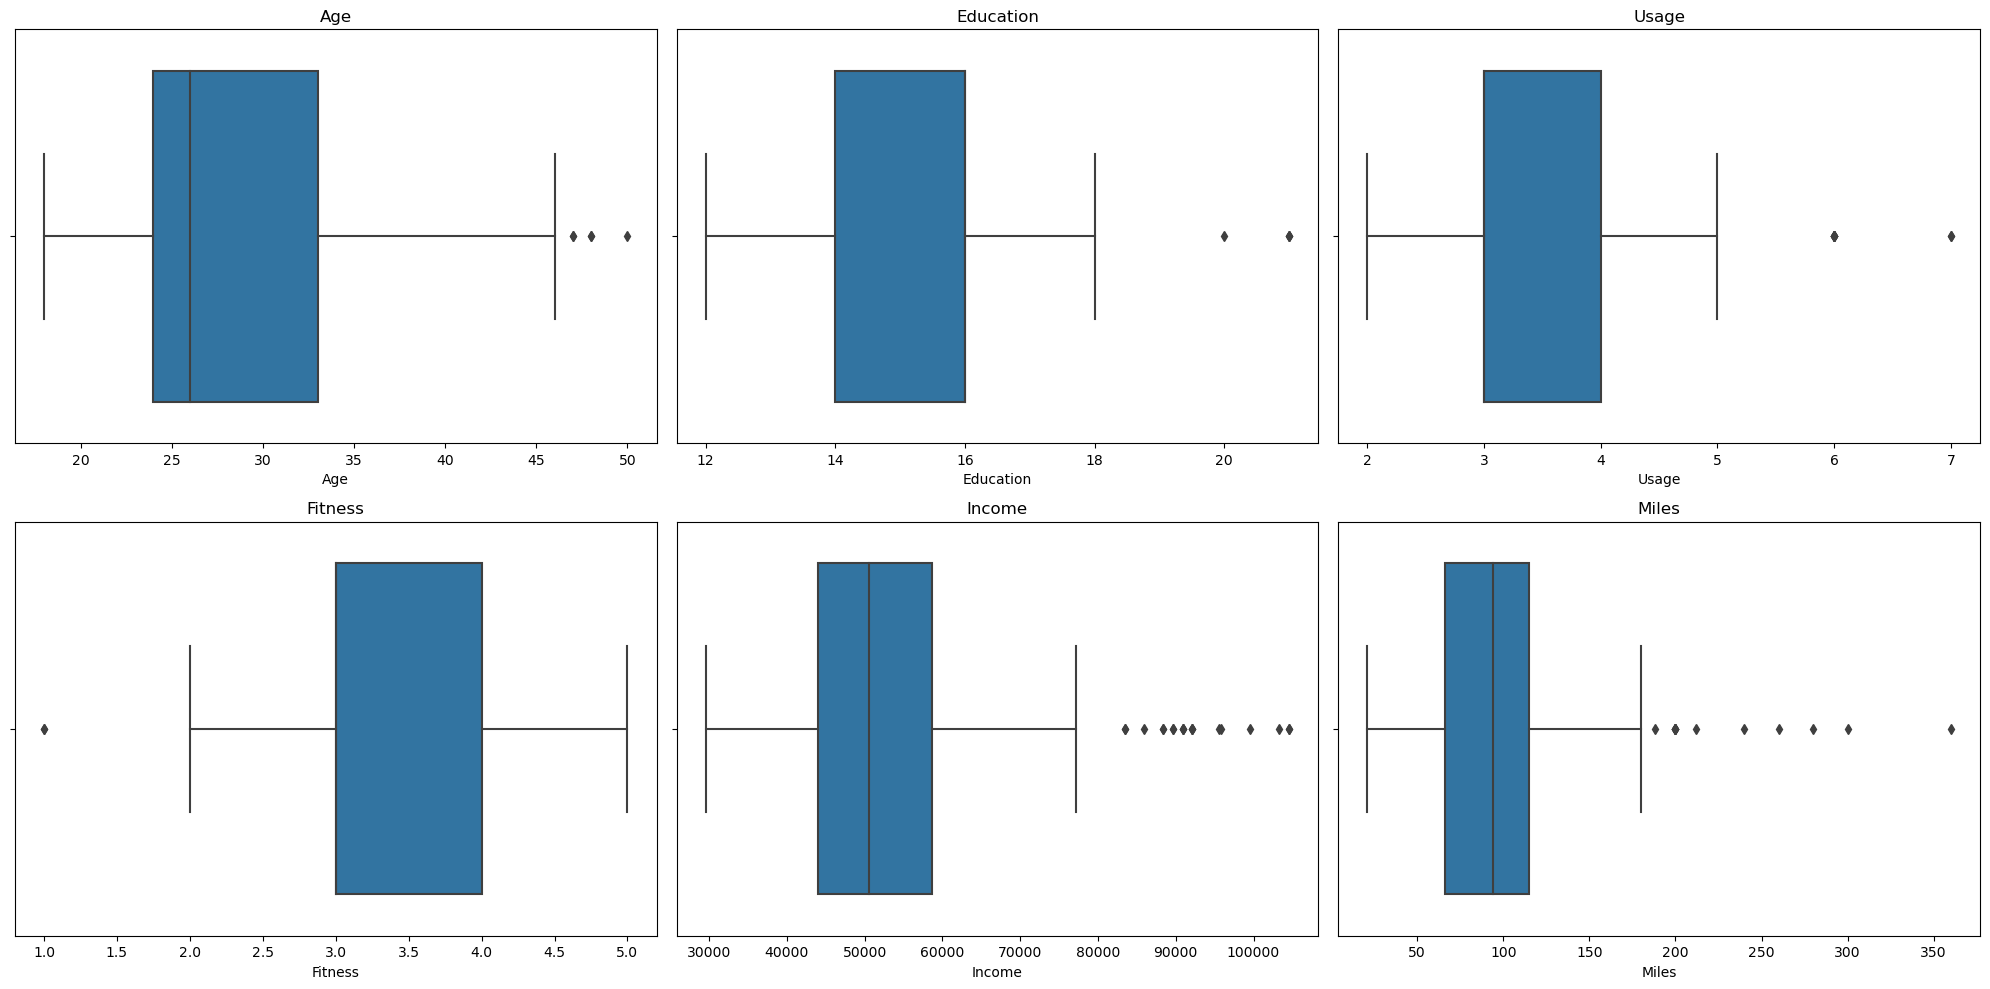

In [76]:
# Checking outliers for all the columns

columns_of_interest = ["Age", "Education", "Usage", "Fitness", "Income", "Miles"]

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
# Flattening the axes array for easier indexing
axes = axes.flatten()

for i, column in enumerate(columns_of_interest):
    sns.boxplot(data=df_aerofit_copy, x=column, orient='h', ax=axes[i])
    axes[i].set_title(f"{column}")

plt.tight_layout()

plt.show()

### Remarks: -
    1. There are lots of outliers for Income and Miles especially as compared to other columns

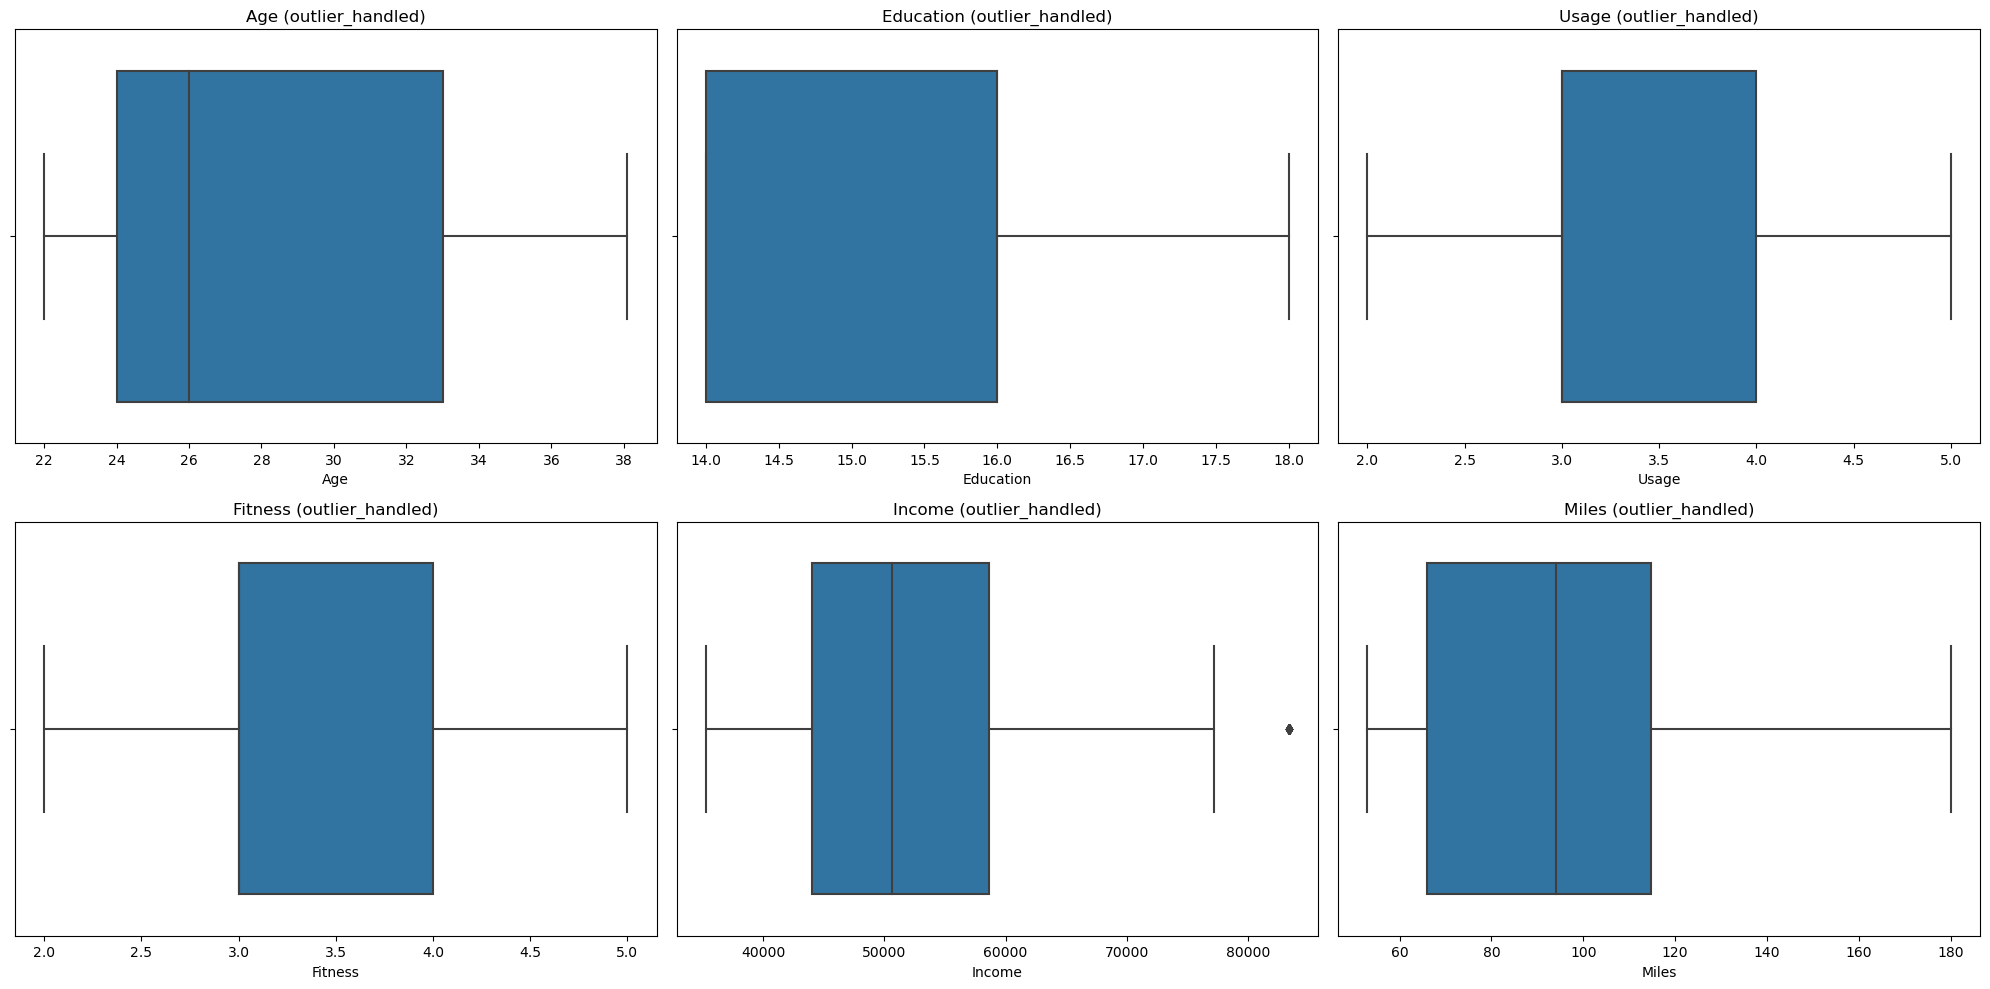

In [77]:
# Handling the outliers

columns_of_interest =["Age","Education","Usage","Fitness","Income", "Miles"]
# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(20,10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

for i, column in enumerate(columns_of_interest):
    # Calculating the 10th and 90th percentiles
    tenth_percentile = df_aerofit_copy[column].quantile(0.10)
    ninetieth_percentile = df_aerofit_copy[column].quantile(0.90)

    # Applying quantile-based flooring and capping
    df_aerofit_copy[column] = np.where(df_aerofit_copy[column] < tenth_percentile, tenth_percentile, df_aerofit_copy[column])
    df_aerofit_copy[column] = np.where(df_aerofit_copy[column] > ninetieth_percentile, ninetieth_percentile, df_aerofit_copy[column])

    # Creating a boxplot of winsorized data
    sns.boxplot(data=df_aerofit_copy, x=column, orient='h', ax=axes[i])
    axes[i].set_title(f"{column} (outlier_handled)")

plt.tight_layout()

plt.show()

### Remarks: -
    1. To handle the outliers, I have used a technique called "quantile-based flooring and capping"[Winsorization], where I am taking out the 10th and 90th percentile of the data margins and then whichever outliers are less than 10th percentile, those values are replaced with 10th percentile value and same goes for those which are above 90th percentile
    2. The outliers are handled to 98% as compared to the initial graphs

In [78]:
# Since bcz of above outlier handling, the dtype is getting converted to float, (10/90th percentile is float values). 
#Therefore need to convert them back to integer values for proper analysis

df_aerofit_copy = df_aerofit_copy.astype({"Age":"int","Education":"int","Education":"int","Usage":"int","Fitness":"int","Income":"int","Miles":"int"})

## Graphical analysis

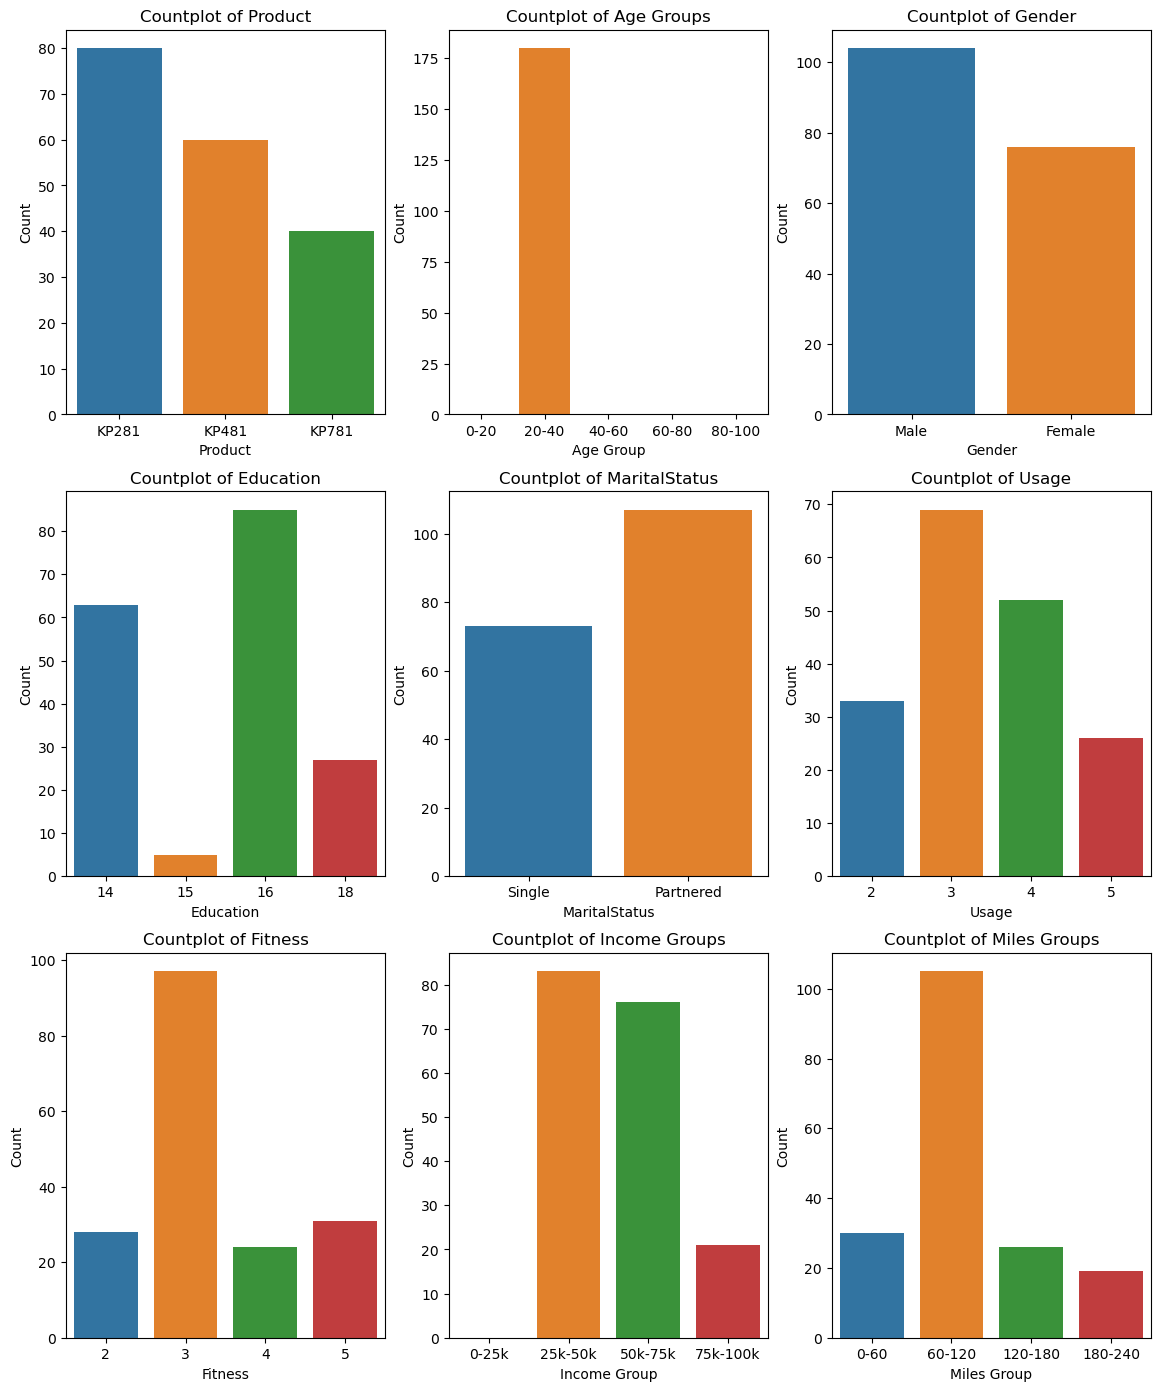

In [79]:
# Plotting counts of all the columns present in the dataset

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 12))
fig.subplots_adjust(top=1.2)

# Plot Product
plt1=sns.countplot(data=df_aerofit_copy, x="Product",ax=axes[0, 0])
plt1.set_title("Countplot of Product")
plt1.set_xlabel("Product")
plt1.set_ylabel("Count")

# Plot Age
bins = [0, 20, 40, 60, 80, 100]
df_aerofit_copy["AgeGroup"] = pd.cut(df_aerofit_copy["Age"], bins=bins, right=False)
plt2 = sns.countplot(data=df_aerofit_copy, x="AgeGroup", ax=axes[0, 1])
plt2.set_title("Countplot of Age Groups")
plt2.set_xlabel("Age Group")
plt2.set_ylabel("Count")
formatted_labels = ["0-20", "20-40", "40-60", "60-80", "80-100"]
plt2.set_xticklabels(formatted_labels)

# Plot Gender
plt3=sns.countplot(data=df_aerofit_copy, x="Gender",ax=axes[0, 2])
plt3.set_title("Countplot of Gender")
plt3.set_xlabel("Gender")
plt3.set_ylabel("Count")

# Plot Education
plt4=sns.countplot(data=df_aerofit_copy, x="Education",ax=axes[1, 0])
plt4.set_title("Countplot of Education")
plt4.set_xlabel("Education")
plt4.set_ylabel("Count")

# Plot MaritalStatus
plt5=sns.countplot(data=df_aerofit_copy, x="MaritalStatus",ax=axes[1, 1])
plt5.set_title("Countplot of MaritalStatus")
plt5.set_xlabel("MaritalStatus")
plt5.set_ylabel("Count")

# Plot Usage
plt6=sns.countplot(data=df_aerofit_copy, x="Usage",ax=axes[1, 2])
plt6.set_title("Countplot of Usage")
plt6.set_xlabel("Usage")
plt6.set_ylabel("Count")

# Plot Fitness
plt7=sns.countplot(data=df_aerofit_copy, x="Fitness",ax=axes[2, 0])
plt7.set_title("Countplot of Fitness")
plt7.set_xlabel("Fitness")
plt7.set_ylabel("Count")

# Plot Income  
bins = [0, 25000, 50000, 75000, 100000]
df_aerofit_copy["IncomeGroup"] = pd.cut(df_aerofit_copy["Income"], bins=bins, right=False)
plt8 = sns.countplot(data=df_aerofit_copy, x="IncomeGroup", ax=axes[2, 1])
plt8.set_title("Countplot of Income Groups")
plt8.set_xlabel("Income Group")
plt8.set_ylabel("Count")
formatted_labels = ["0-25k", "25k-50k", "50k-75k", "75k-100k"]
plt8.set_xticklabels(formatted_labels)

# Plot Miles
bins = [0, 60, 120, 180, 240]
df_aerofit_copy["MilesGroup"] = pd.cut(df_aerofit_copy["Miles"], bins=bins, right=False)
plt9 = sns.countplot(data=df_aerofit_copy, x="MilesGroup", ax=axes[2, 2])
plt9.set_title("Countplot of Miles Groups")
plt9.set_xlabel("Miles Group")
plt9.set_ylabel("Count")
formatted_labels = ["0-60", "60-120", "120-180", "180-240"]
plt9.set_xticklabels(formatted_labels)

plt.show()

### Observations: -

    Graph 1:- 1. The plot shows the count of individual products
              2. Customers who have purchased a particular treadmill--> KP281 : 80 ; KP481 : 60 ; 
                 KP781 : 40
              3. Most of customers prefer buying KP281 followed by KP481 & KP781
            
    Graph 2:- 1. The plot shows the count of individiual Age groups
              2. The age group of 20 to 40 years is range of customers who mostly purchased the 
                 products
                 
    Graph 3:- 1. The plot shows the count of individiual Gender categories
              2. Customers who have purchased--> More than 100 Male customers ; More than 75 
                 Female customers
              3. They have more Male Customers compared to Female Customers ; Ratio being (almost 
                 60:40)
        
    Graph 4:- 1. The plot shows the count of individiual Education groups
              2. Around 80 customers with 16 years of education ; 60 customers with 14 years ; 5 
                 customers with 15 years; 20 customers with 18 years.
              3. Most of customers have education of 16 years & 14 years
                
    Graph 5:- 1. The plot shows the count of individiual MaritalStatus groups
              2. There are 73 customers who are single ; 107 customers who are partnered.
              3. 59% of the customers are partnered
            
    Graph 6:- 1. The plot shows the count of individiual Usage groups
              2. More than 30 customers who plan to use the treadmill twice a week on an average ;   
                 around 70 customers who plan to use the treadmill thrice a week on average,etc.
              3. Customers on an average plan to use the treadmill 3 to 4 times a week
            
    Graph 7:- 1. The plot shows the count of individiual Fitness groups
              2. Around 26 customers given a score of 2 ; more than 90 gave score of 3, etc.
              3. Almost 50% of the customers have given a self-rated fitness scale of 3
            
    Graph 8:- 1. The plot shows the count of individiual Income groups
              2. More than 80 customers fall in the range of 24k to 50k ; ~75 fall under 51k-75k
                 ,etc.
              3. Most customers are earning between 25k and 50K
                
    Graph 9:- 1. The plot shows the count of individiual Miles groups
              2. More than 100 customers expect to walk/run upto 100 miles each week on an 
                 average, etc.
              3. Most Customers expect to walk/run 60 to 100 miles per week on an average

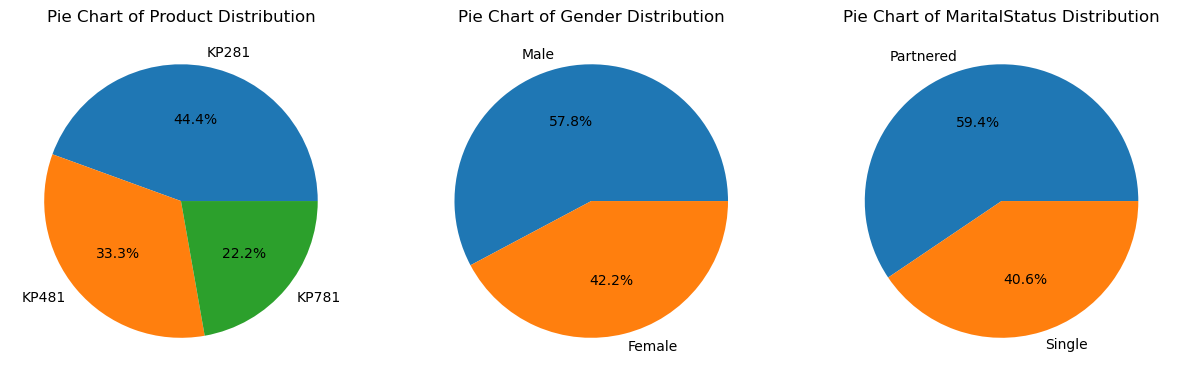

In [80]:
# Plotting the % distributions of only the categorical columns

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.subplots_adjust(top=1.2)

# Plotting Product
product_counts = df_aerofit_copy["Product"].value_counts()
axes[0].pie(product_counts, labels=product_counts.index, autopct='%1.1f%%')
axes[0].set_title("Pie Chart of Product Distribution")

# Plotting Gender
gender_counts = df_aerofit_copy["Gender"].value_counts()
axes[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
axes[1].set_title("Pie Chart of Gender Distribution")

# Plotting MaritalStatus
marital_counts = df_aerofit_copy["MaritalStatus"].value_counts()
axes[2].pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%')
axes[2].set_title("Pie Chart of MaritalStatus Distribution")

plt.show()

### Observations: -

    Graph 1:- 1. The plot shows the % distribution of individual products
              2. 44.4% of customers purchased KP281 ; 33.3% of customers purchased KP481 ;
                 22.2% of customers purchased KP781
              3. KP281 is most sold product with 44.45% in overall.
           
    Graph 2:- 1. The plot shows % distribution of individiual Age groups
              2. 57.8% Male customers ; 42.2% female customers
              3. Almost 59% of the total customers are Male.
   
    Graph 3:- 1. The plot shows % distribution of individiual Gender categories
              2. 59.4% of the customers are single ; 40.6% of the customers are partnered
              3. Almost 60% of customers are partnered.

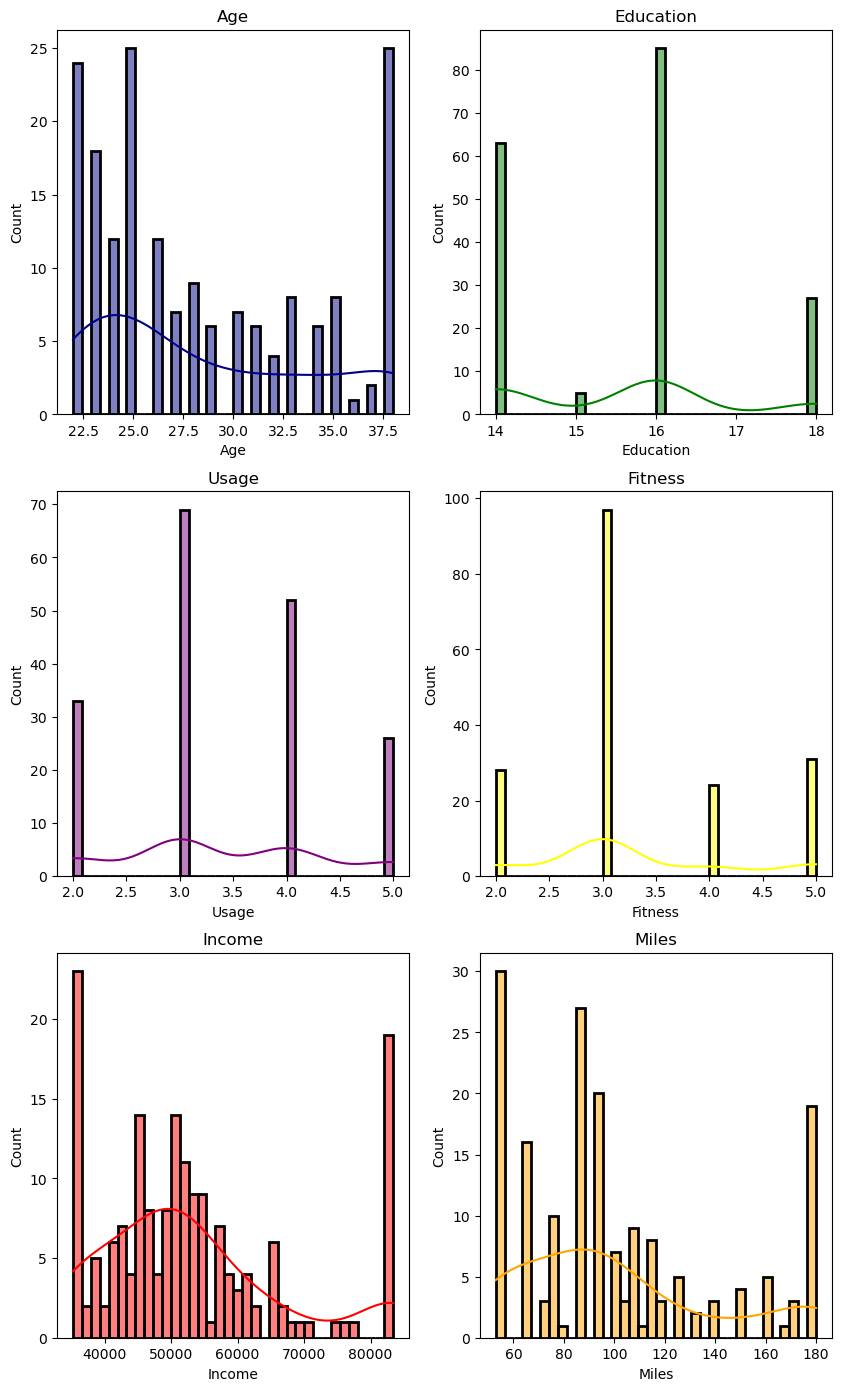

In [81]:
# Plotting KDE plots to see the distribution of values for non-categorical columns

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))
fig.subplots_adjust(top=1.2)

# Defining colors for each plot
hist_colors = ['darkblue', 'green', 'purple', 'yellow', 'red', 'orange']

# Plotting Age
sns.histplot(data=df_aerofit_copy, x='Age', bins=36, color=hist_colors[0],
             ax=axes[0, 0], edgecolor='black', kde=True, linewidth=2)
axes[0, 0].set_title("Age")

# Plotting Education
sns.histplot(data=df_aerofit_copy, x='Education', bins=36, color=hist_colors[1],
             ax=axes[0, 1], edgecolor='black', kde=True, linewidth=2)
axes[0, 1].set_title("Education")

# Plotting Usage
sns.histplot(data=df_aerofit_copy, x='Usage', bins=36, color=hist_colors[2],
             ax=axes[1, 0], edgecolor='black', kde=True, linewidth=2)
axes[1, 0].set_title("Usage")

# Plotting Fitness
sns.histplot(data=df_aerofit_copy, x='Fitness', bins=36, color=hist_colors[3],
             ax=axes[1, 1], edgecolor='black', kde=True, linewidth=2)
axes[1, 1].set_title("Fitness")

# Plotting Income
sns.histplot(data=df_aerofit_copy, x='Income', bins=36, color=hist_colors[4],
             ax=axes[2, 0], edgecolor='black', kde=True, linewidth=2)
axes[2, 0].set_title("Income")

# Plotting Miles
sns.histplot(data=df_aerofit_copy, x='Miles', bins=36, color=hist_colors[5],
             ax=axes[2, 1], edgecolor='black', kde=True, linewidth=2)
axes[2, 1].set_title("Miles")

plt.show()

### Observations: -

    Graph 1:- 1. The plot shows the distribution of individual Age groups
              2. Inferences from this graph is same as stated in countplots graph analysis
           
    Graph 2:- 1. The plot shows % distribution of individiual Education groups
              2  Inferences from this graph is same as stated in countplots graph analysis
   
    Graph 3:- 1. The plot shows % distribution of individiual Usage categories
              2. Inferences from this graph is same as stated in countplots graph analysis
            
    Graph 4:- 1. The plot shows % distribution of individiual Fitness categories
              2. Inferences from this graph is same as stated in countplots graph analysis
            
    Graph 5:- 1. The plot shows % distribution of individiual Income categories
              2. Inferences from this graph is same as stated in countplots graph analysis
            
    Graph 6:- 1. The plot shows % distribution of individiual Miles categories
              2. Inferences from this graph is same as stated in countplots graph analysis

## Bivariate Analysis

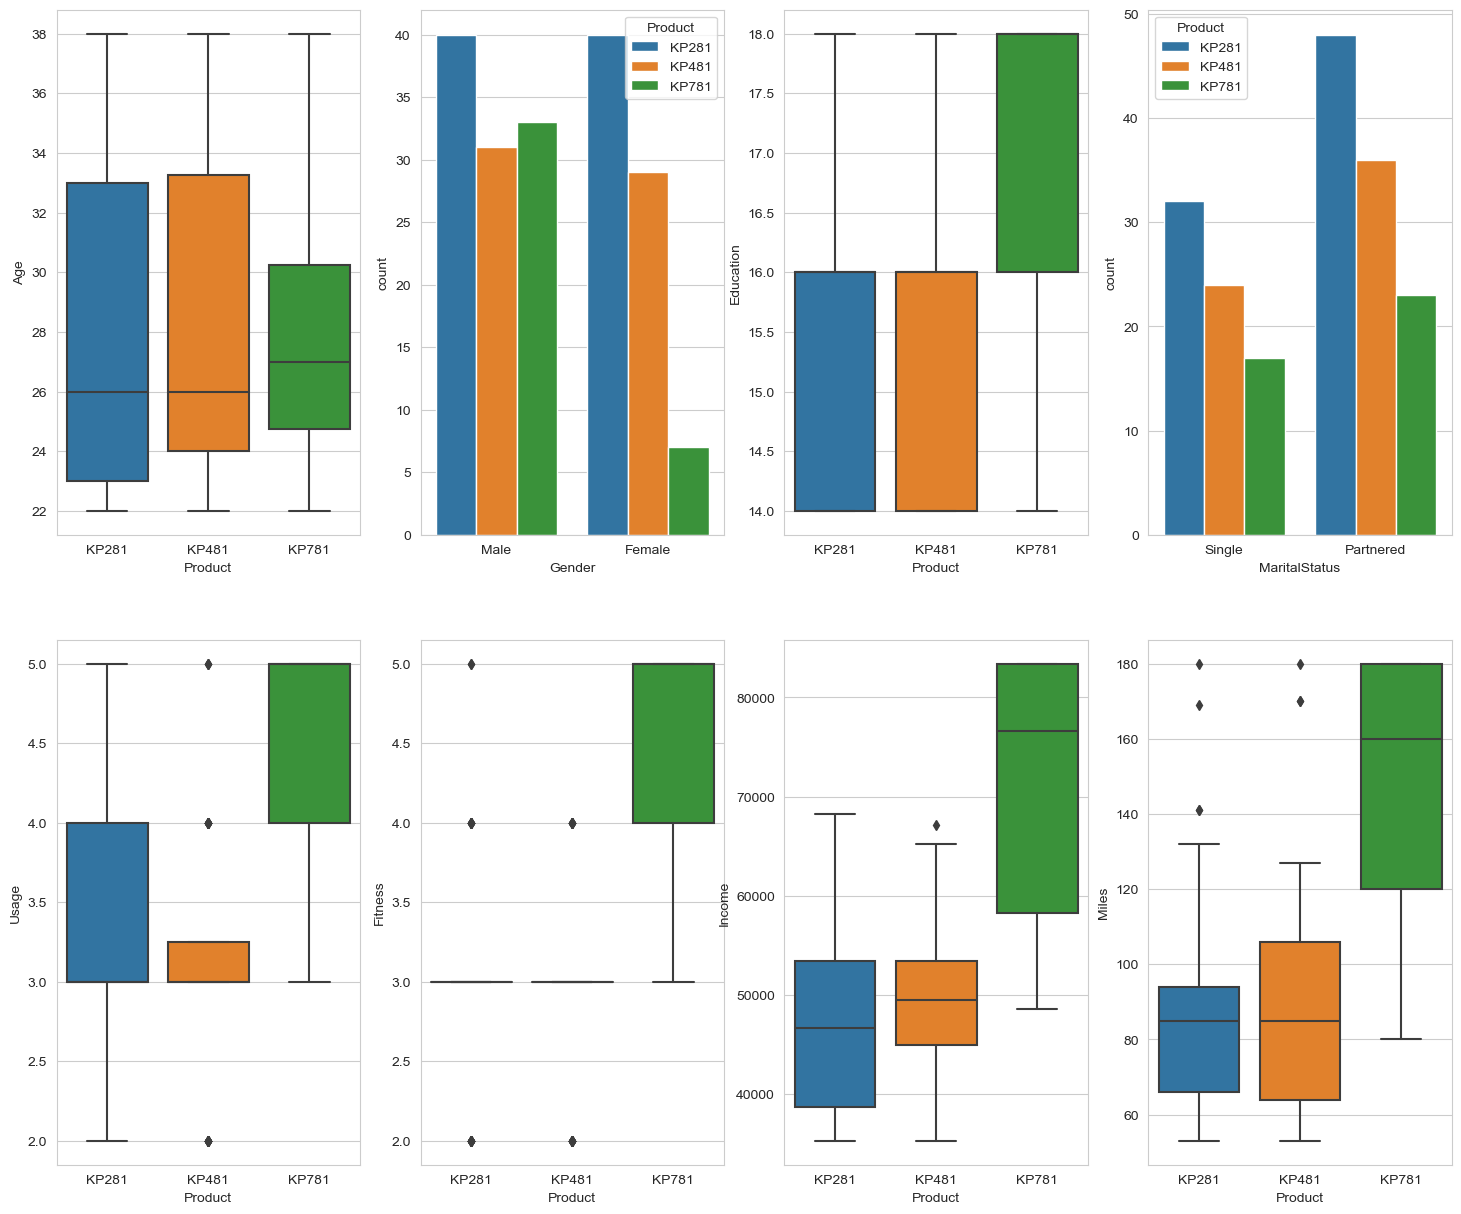

In [82]:
# comparison of Product with various other factors

sns.set_style(style='whitegrid')
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(18, 15))

#Plotting of Product vs Age
sns.boxplot(data=df_aerofit_copy, x='Product', y='Age', ax=axs[0][0])
#Plotting of Product vs Gender
sns.countplot(data=df_aerofit_copy, x='Gender', hue='Product', ax=axs[0][1])
#Plotting of Product vs Education
sns.boxplot(data=df_aerofit_copy, x='Product', y='Education', ax=axs[0][2])
#Plotting of Product vs Maritalstatus
sns.countplot(data=df_aerofit_copy, x='MaritalStatus', hue='Product', ax=axs[0][3])
#Plotting of Product vs Usage
sns.boxplot(data=df_aerofit_copy, x='Product', y='Usage', ax=axs[1][0])
#Plotting of Product vs Fitness
sns.boxplot(data=df_aerofit_copy, x='Product', y='Fitness', ax=axs[1][1])
#Plotting of Product vs Income
sns.boxplot(data=df_aerofit_copy, x='Product', y='Income', ax=axs[1][2])
#Plotting of Product vs Miles
sns.boxplot(data=df_aerofit_copy, x='Product', y='Miles', ax=axs[1][3])
plt.show()

### Observations: -

    Graph 1:- 1. The plot shows comparison between Product and Age
              2. For KP281  & KP481 : Average age around  26 years ; With Customers age range 
                 between ~(23 to 33 years) & (24 to 33 years ) respectively
                 For KP781 : Average age around  27 years ; With Customers age range between 
                 ~(25 to 31 years)
           
    Graph 2:- 1. The plot shows comparison between Product and Gender
              2  For KP281 : Male - 40, Female  40 ; For KP481 : Male - 31, Female  29
                 For KP781 : Male - 33, Female  7
   
    Graph 3:- 1. The plot shows comparison between Product and Education
              2. For KP281  & KP481 : range between 14 to 16 years of Education 
                 For KP781 : more than 16 years of Education
            
    Graph 4:- 1  The plot shows comparison between Product and MaritalStatus 
              2. For KP281 : Partnered  48, Single  32 ; For KP481 : Partnered  36, Single  33
                 For KP781 : Partnered  23, Single  17
                    
    Graph 5:- 1. The plot shows comparison between Product and Usage
              2. For KP281 : 3 to 4 times avg each week ; For KP481 : 3 times avg each week
                 For KP781 : 4 to 5 avg times each week
            
    Graph 6:- 1. The plot shows comparison between Product and Fitness
              2. For KP281 & KP481  : 3 indicating a moderate level of fitness 
                 For KP781 : 5 indicating a High level of fitness 
            
    Graph 7:- 1. The plot shows comparison between Product and Income
              2. For KP281 : range between 38K to 55K; with median around 46K ; For KP481  : range 
                 between 46K to 54K; with median around 50K
                 For KP781 : range between 57K to 85K; with median around 76K
         
    Graph 8:- 1. The plot shows comparison between Product and Miles
              2. For KP281 & KP481 : 86K miles each week; range being between (around 68K to 93K) 
                 & (around 63 K to 104 K) respectively
                 For KP781 : 160K miles each week; range being between 120K to 18K
                 
Conclusion:-

KP281 & KP481 products are purchased by 30k to 70k earning customers.

KP781 product purchased by customers who earning more than 50k.

KP281 & KP481 product customers mostly used to run 50 to 120 miles per week, but KP781 product used to run more than 100 miles per week.

Upto 4 days per week usage can prefer to KP281 & KP481.

More than 4 days per week usage is preferable to use KP781.

Beginner and Intermediate fitness people prefer KP281 and KP481.

Advance Fitness people prefer KP781.

More than 16 years of Educated customer prefer KP781.

More Earning customer prefer KP781. And in another hand less to medium earning customer prefer KP281 & KP481.

More Fitness and more usage customers prefer KP781.

When Male is Partnered, it's higher chances to buy KP481 and KP781.

When Female is Partnered, it's higher chances to buy KP281.

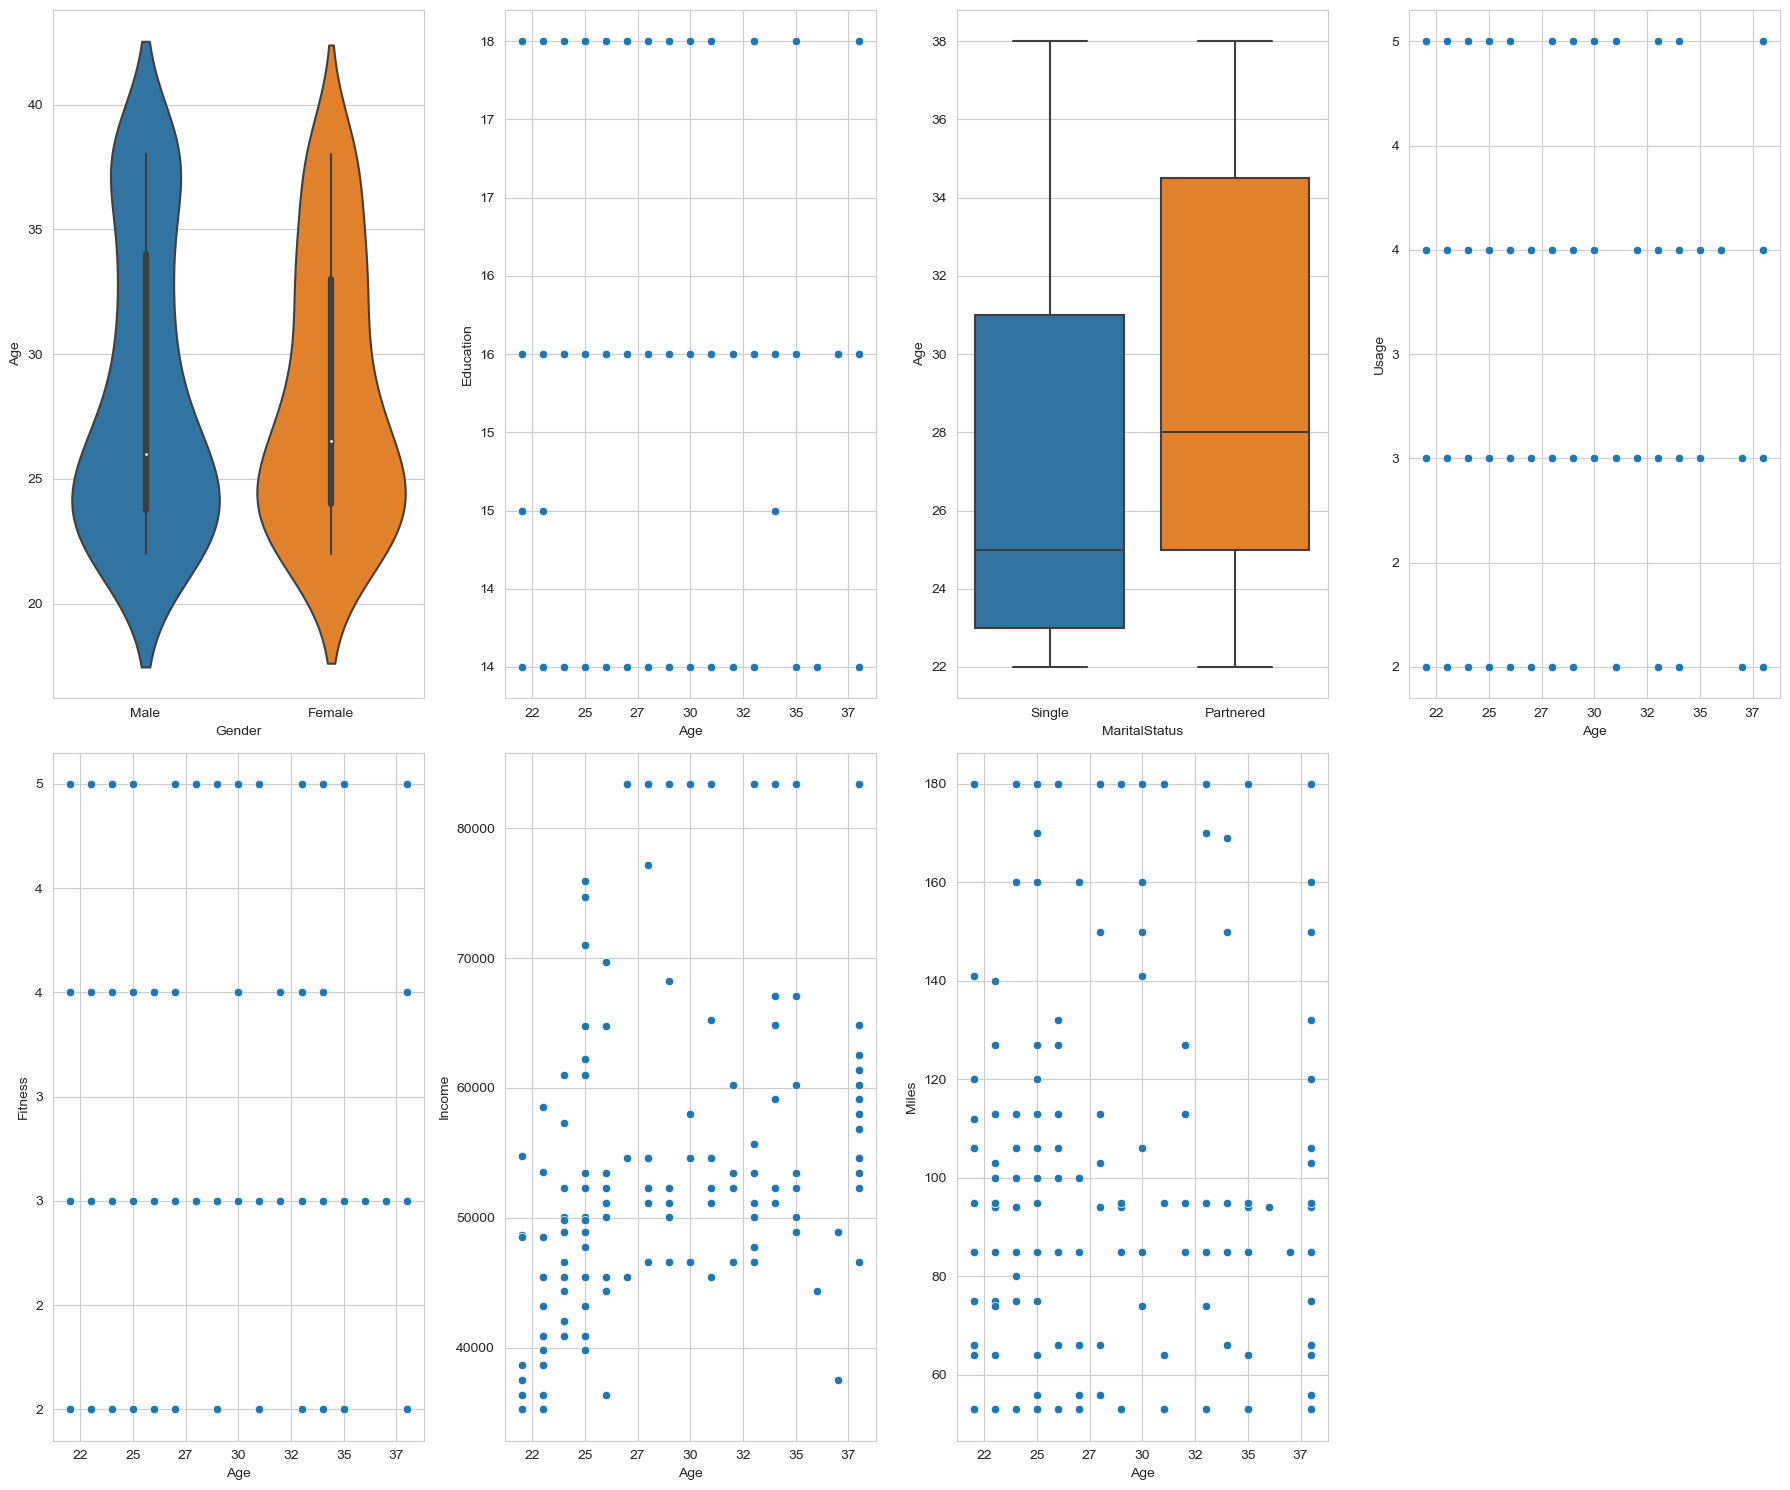

In [83]:
# comparison of Age with various other factors

sns.set_style(style='whitegrid')
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(18, 15))

# Plotting of Age vs Gender (Categorical vs. Numerical)
sns.violinplot(data=df_aerofit_copy, x='Gender', y='Age', ax=axs[0][0])

# Plotting of Age vs Education (Numerical vs. Numerical)
a=sns.scatterplot(data=df_aerofit_copy, x='Age', y='Education', ax=axs[0][1])
a.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))
a.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: int(y)))

# Plotting of Age vs MaritalStatus (Categorical vs. Numerical)
sns.boxplot(data=df_aerofit_copy, x='MaritalStatus', y='Age', ax=axs[0][2])

# Plotting of Age vs Usage (Numerical vs. Numerical)
a=sns.scatterplot(data=df_aerofit_copy, x='Age', y='Usage', ax=axs[0][3])
a.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))
a.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: int(y)))

# Plotting of Age vs Fitness (Numerical vs. Numerical)
a=sns.scatterplot(data=df_aerofit_copy, x='Age', y='Fitness', ax=axs[1][0])
a.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))
a.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: int(y)))

# Plotting of Age vs Income (Numerical vs. Numerical)
a=sns.scatterplot(data=df_aerofit_copy, x='Age', y='Income', ax=axs[1][1])
a.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))
a.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: int(y)))

# Plotting of Age vs Miles (Numerical vs. Numerical)
a=sns.scatterplot(data=df_aerofit_copy, x='Age', y='Miles', ax=axs[1][2])
a.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))
a.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: int(y)))

# Removing the last subplot (axs[1][3]) by not plotting anything in it
fig.delaxes(axs[1][3])

plt.tight_layout()

plt.show()

### Observations: -

    Graph 1:- 1. The plot shows comparison between Gender and Age
              2. Mostly Males lie in the range of >20 and <36 years of age with the median being
                 somewhere around 25-35 ; Similarly for Female, it lies somewhat similar to male
                 but less than male.
           
    Graph 2:- 1. The plot shows comparison between Age and Education
              2  Person who have age of 25, have education of 14,16,18 respectively ; Similarly
                 the reading goes for rest of the plots.
              3. Also education of 14, 16 and 18 years have more strong correlation with age ;
                 Segment of customers in the age group between 32 to 37 years & having education
                 of 16 years; This cluster is more dense compared to the other 2 in this age group
   
    Graph 3:- 1. The plot shows comparison between Age and MaritalStatus
              2. Single Customers falling in the age  group range of 23 to 31 years represent 50% 
                 of the customers in the 'Single Customers' category. (Median age being 25 years)
              3. Partnered Customers falling in the age  group range of 25 to 35 years represent  
                 50% of the customers in the 'Partnered Customers' category.
                 (Median age being 26 years)
            
    Graph 4:- 1. The plot shows comparison between Age and Usage
              2. Segment of customers with age between 20 to 30 years vary in their plan to use each 
                 week (i.e. 2,3,4,5 times). 
              3. Segment of customers with age beyond 37 years vary in their plan to use the treadmill 
                 each week(i.e. 2,3,4,5 times).
              4. Segment of customers with age between 31 to 37 years mostly prefer to use the 
                 treadmill 3 to 4 times each week.
              5. Segment of customers with age 36 prefer to use the treadmill 4 times each week.
              6. Majority of the customers prefer to use the treadmill 3 to 4 times each week
         
    Graph 5:- 1. The plot shows comparison between Age and Fitness
              2. Segment of customers with age group range from 20 to 40 years have self-rated fitness 
                 score of 3
              3. Segment of customers leaving the age group range from 25 to 27 years, 31 years, 32 
                 years, 36 years 
                 have self-rated fitness score of 5
              4. Segment of customers with age group range from 35 to 37 years have self-rated fitness 
                 score of 3 
              5. Customers with self-rated fitness score of 3 more likely to purchase the product
            
    Graph 6:- 1. The plot shows comparison between Age and Income
              2. Customers having annual income in the range between 46K to 56K represent a cluster 
                 which is most likely 
                 to purchase product in a wider age group.
              3. Customers having annual income upto 45K & limited age group range of 20 to 26 years  
                 represent another data point cluster.
              4. Customers having annual income upto 51K to 65K & age 37 years represent another data 
                 point cluster.
              5. Customers having annual income of 85K & age group range of 27 to 37 years represent 
                 another data point cluster.
              6. Overall there are 3 clusters(pt. 2,3,4) which showcase an upward trend – depicting a 
                 positive correlation 
           
    Graph 7:- 1. The plot shows comparison between Age and Miles
              2. Customers who expect to walk/run upto 120 miles fall in age group of 20 to 28 years 
                 form 1st data point cluster.
              3. Customers expecting to walk/run avg no. of mile i.e.[ 50, range 80 to 100, 180 ]miles 
                 form another set of clusters spread across age group 20 to 40 years 


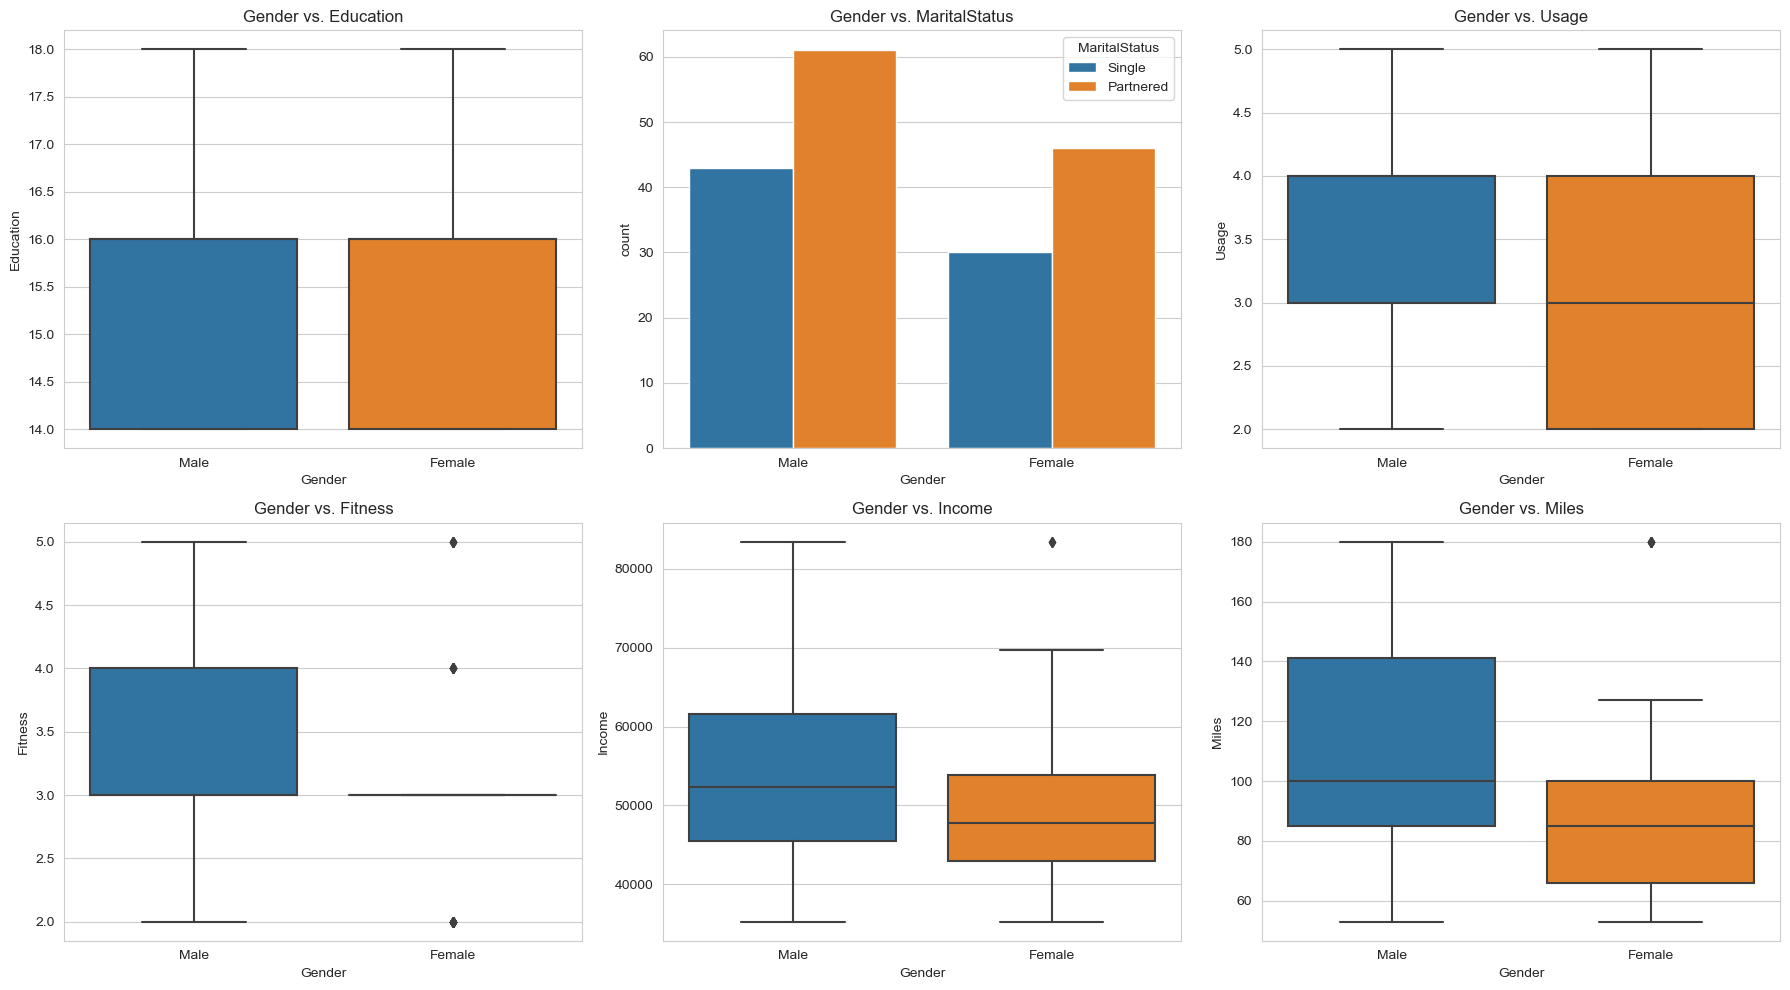

In [84]:
# comparison of Gender with various other factors

# Creating a single figure with a 2x3 grid
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Plot 1: Gender vs. Education
sns.boxplot(data=df_aerofit_copy, x='Gender', y='Education', ax=axs[0][0])
axs[0][0].set_title("Gender vs. Education")

# Plot 2: Gender vs. MaritalStatus
sns.countplot(data=df_aerofit_copy, x='Gender', hue='MaritalStatus', ax=axs[0][1])
axs[0][1].set_title("Gender vs. MaritalStatus")

# Plot 3: Gender vs. Usage
sns.boxplot(data=df_aerofit_copy, x='Gender', y='Usage', ax=axs[0][2])
axs[0][2].set_title("Gender vs. Usage")

# Plot 4: Gender vs. Fitness
sns.boxplot(data=df_aerofit_copy, x='Gender', y='Fitness', ax=axs[1][0])
axs[1][0].set_title("Gender vs. Fitness")

# Plot 5: Gender vs. Income
sns.boxplot(data=df_aerofit_copy, x='Gender', y='Income', ax=axs[1][1])
axs[1][1].set_title("Gender vs. Income")

# Plot 6: Gender vs. Miles
sns.boxplot(data=df_aerofit_copy, x='Gender', y='Miles', ax=axs[1][2])
axs[1][2].set_title("Gender vs. Miles")

plt.tight_layout()

# Show the combined subplot
plt.show()


### Observations: -

    Graph 1:- 1. The plot shows comparison between Gender and Education
              2. Male & Female customers both having 14 to 16 years of education 
           
    Graph 2:- 1. The plot shows comparison between Gender and MaritalStatus
              2  In both categories Male & Female – the count of Partnered male customers & partnered Female customers 
                 is more than count of single male & single female customers respectively.
              3. Within male customers, the count of partnered customers is more than the single customers. 
                 And same can be said about Female customers as well.
  
    Graph 3:- 1. The plot shows comparison between Gender and Usage
              2. The average number of times the male customer plans to use the product each week is 3 to 4.
              3. The average number of times the female customer plans to use the treadmill each week range between 2 to 4; 
                 The median being 3 times.
              4. Female customers showcase a wider range of usage levels (2-3-4)
            
    Graph 4:- 1. The plot shows comparison between Gender and Fitness
              2. Male customers have wider range of Fitness level compared to female customers.
              3. Male customers have fitness starting from 3 till 4 (and median fitness level of 3.5)
              4. Female customers are having fitness level of 3 (i.e. median fitness level of 3)
            
    Graph 5:- 1. The plot shows comparison between Gender and Income (in $)
              2. Male Customers having Annual Income ranging from 32K to 85K – where 50% of the customers lie in the 
                 range of 45K to 62K (Median Annual Income being around 52K)
              3. Female Customers having Annual Income ranging from 32K to 70K– where 50% of the customers lie in the range 
                 around 43K to 57K (Median Annual Income being around  48K)
              4. Male customers showcase a wider range of Income levels compared to female customers.
              5. Male Target Audience which contribute most to business have Annual Income around 52K
                 Female Target Audience which contribute most to business have Annual Income around 48K
                    
    Graph 6:- 1. The plot shows comparison between Gender and Miles
              2. Male Customers are expected to walk/run on average no. of miles ranging from 50 to 180 each week – where 
                 50% of the customers lie in the range of 85 to 141 (expected median level being 100 miles)
              3. Female Customers are expected to walk/run on average no. of miles ranging from 50 to 130 each week – where  
                 50% of the customers lie in the range of 65 to 100 (expected median level being around 85 miles)
              4. Male customers showcase a wider range of expected miles covered as compared to female customers.


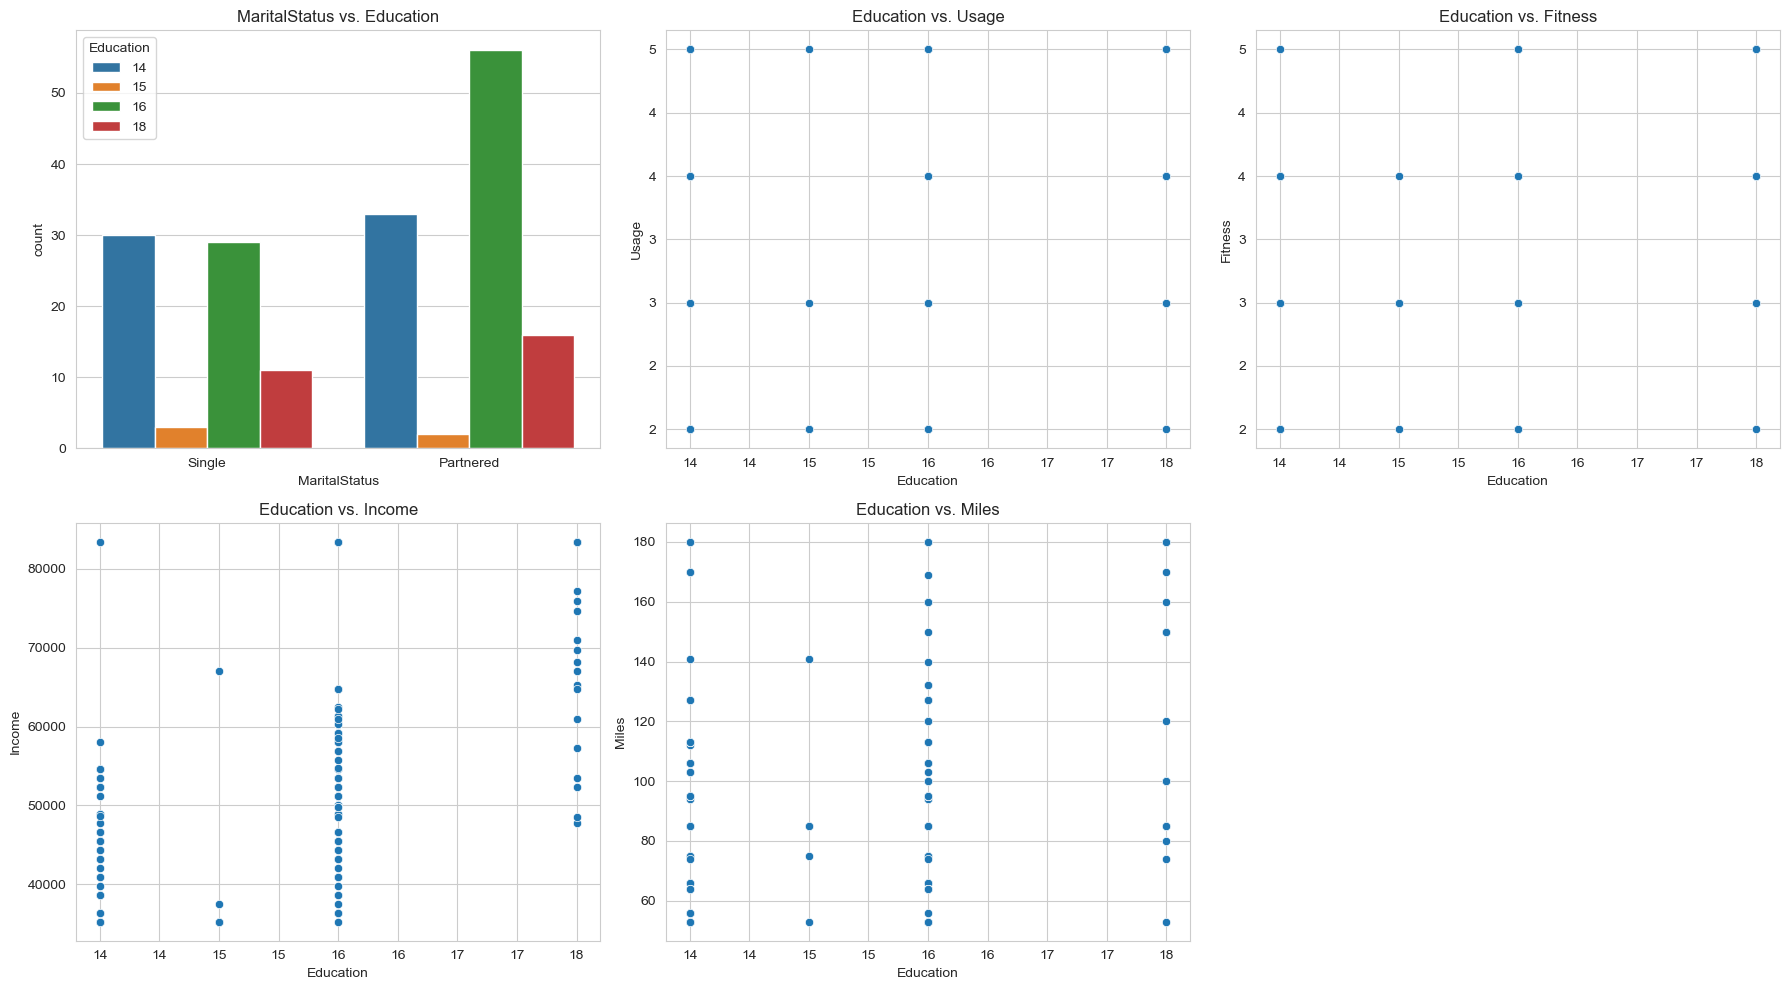

In [85]:
# comparison of Education with various other factors

# Creating a single figure with a 2x3 grid
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Plot 2: Education vs. MaritalStatus (Categorical vs. Categorical)
sns.countplot(data=df_aerofit_copy, x='MaritalStatus', hue='Education', ax=axs[0][0])
axs[0][0].set_title("MaritalStatus vs. Education")

# Plot 3: Education vs. Usage (Numerical vs. Numerical)
a=sns.scatterplot(data=df_aerofit_copy, x='Education', y='Usage', ax=axs[0][1])
axs[0][1].set_title("Education vs. Usage")
a.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))
a.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: int(y)))

# Plot 4: Education vs. Fitness (Numerical vs. Numerical)
a=sns.scatterplot(data=df_aerofit_copy, x='Education', y='Fitness', ax=axs[0][2])
axs[0][2].set_title("Education vs. Fitness")
a.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))
a.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: int(y)))

# Plot 5: Education vs. Income (Numerical vs. Numerical)
a=sns.scatterplot(data=df_aerofit_copy, x='Education', y='Income', ax=axs[1][0])
axs[1][0].set_title("Education vs. Income")
a.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))
a.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: int(y)))

# Plot 6: Education vs. Miles (Numerical vs. Numerical)
a=sns.scatterplot(data=df_aerofit_copy, x='Education', y='Miles', ax=axs[1][1])
axs[1][1].set_title("Education vs. Miles")
a.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))
a.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: int(y)))

# Removing empty subplot
fig.delaxes(axs[1][2])

plt.tight_layout()

# Show the combined subplot
plt.show()


### Observations: -

    Graph 1:- 1. The plot shows comparison between Education and MaritalStatus
              2. The count of partnered customers with 14 yrs,16 yrs is more than count of single customers with same  
                 education years
              3. The count of partnered customers with 18 yrs is more than count of single customers with same 
                 education years
              4. The count of partnered customers with 15 yrs is less than count of single customers with same 
                 education years
              5. The count of  partnered customers with 16 yrs is the max amongst both the categories
       
    Graph 2:- 1. The plot shows comparison between Education and Usage
              2  4 clusters can be seen – with 180 datapoints concentrated over education years of 14,15,16 & 18 years & 
                 planned useage of 2,3,4,& 5 times on an average each week.
              3. The cluster is spread across the complete range & not moving much in upward or downward direction from 
                 Left to right
              4. Above observations suggests that education may not have that much significant impact on planned 
                 weekly usage
   
    Graph 3:- 1. The plot shows comparison between Education and Fitness
              2. 4 clusters can be seen – with 180 datapoints concentrated over education years of 14,15,16 & 18 years &
                 self-rated fitness score of 1,2,3,4,5 
              3. The cluster is spread across the range & not moving much in upward or downward direction from Left to right
              4. Above observations suggests there is a correlation but education not have most significant impact on  
                 fitness score  
            
    Graph 4:- 1. The plot shows comparison between Education and Income(in $)
              2. There is one segment of customers with education years of 14 & 16 years & having  annual income in the   
                 range upto 65K
                 These set of customers may lean towards purchasing more cost-effective options. (i.e. KP281,KP481)
              3. There is another segment of premium customers with more than 18 years of education having annual income 
                 ranging from 48K upto 85K
                 These customers with higher education and income levels may prefer treadmill like KP781
              4. 4 clusters can be clearly seen for 4 duff education years (i.e. 14,15,16 & 18 years)
                 Cluster for 16 years is densely populated.
              5. We can see an upward trend in the clusters – as the education years increase – showcasing a positive 
                 correlation
            
    Graph 5:- 1. The plot shows comparison between Education and Miles
              2. Customers with 14, 16 & 18 education years – have their expected avg no of miles each week spread across  
                 upto 180 miles ; For 15 education years = it is spread till 140 miles though
                 These represent 4 clusters individually. 
              3. Cluster for 16 education years is densely populated signifing a major count of customers purchasing this 
                 treadmill.
              4. Also datapoints near 105 miles across 3 clusters – of 14,16 & 18 education years are close.
              5. The cluster is spread across the complete range & not moving much in upward or downward direction from
                 Left to right
                 Above observations suggests that education may not have that much significant impact on expected weekly 
                 mileage. 

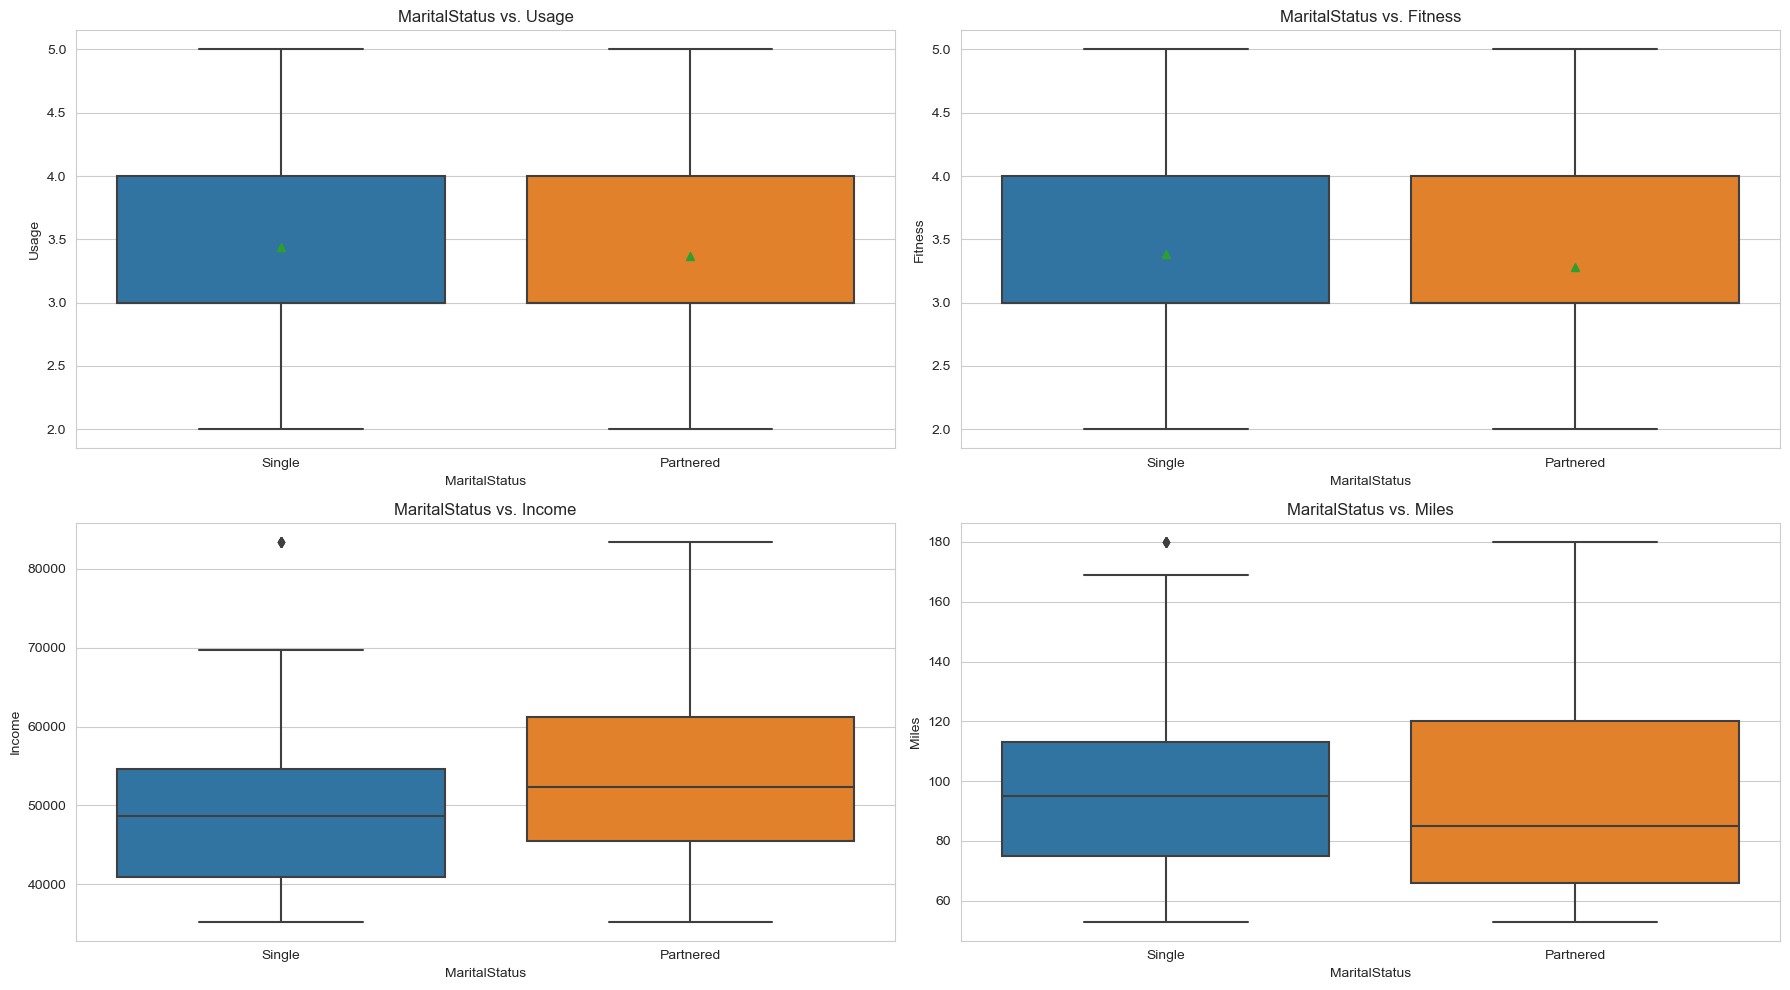

In [86]:
# comparison of MaritalStatus with various other factors

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))

# Plot 1: MaritalStatus vs. Usage (Categorical vs. Numerical)
sns.boxplot(data=df_aerofit_copy, x='MaritalStatus', y='Usage', showmeans=True, ax=axs[0][0])
axs[0][0].set_title("MaritalStatus vs. Usage")

# Plot 2: MaritalStatus vs. Fitness (Categorical vs. Numerical)
sns.boxplot(data=df_aerofit_copy, x='MaritalStatus', y='Fitness', showmeans=True,  ax=axs[0][1])
axs[0][1].set_title("MaritalStatus vs. Fitness")

# Plot 3: MaritalStatus vs. Income (Categorical vs. Numerical)
sns.boxplot(data=df_aerofit_copy, x='MaritalStatus', y='Income', ax=axs[1][0])
axs[1][0].set_title("MaritalStatus vs. Income")

# Plot 4: MaritalStatus vs. Miles (Categorical vs. Numerical)
sns.boxplot(data=df_aerofit_copy, x='MaritalStatus', y='Miles', ax=axs[1][1])
axs[1][1].set_title("MaritalStatus vs. Miles")

plt.tight_layout()

# Show the combined subplot
plt.show()

### Observations: -

    Graph 1:- 1. The plot shows comparison between MaritalStatus and Usage
              2. The range of usage for Single is between 3-4 miles per week
              3. The range of usage for Partnered is between 3-4 miles per week
              4. The median is same for both (refer small green triangle)
           
    Graph 2:- 1. The plot shows comparison between MaritalStatus and Fitness
              2  The range of Fitness for Single is between 3-4
              3. The range of Fitness for Partnered is between 3-4
              4. The median for Partnered is less than Single (refer small green triangle)
   
    Graph 3:- 1. The plot shows comparison between MaritalStatus and Income
              2. There are Single Cutomers – having Annual Income range upto 70K – where 50% of the customers lie in the  
                 range of 40K to 55K (Median Annual Income being around 48K)
              3. There are partnered  Cutomers – having Annual Income range above 80K – where 50% of the customers lie in  
                 the range around 45K to 61K (Median Annual Income being around 52K)
              4. Partnered customers have a higher Annual Income median value than the Single customers
              5. For instance, partnered customers might prioritize different features or price points compared to single  
                 customers. 
         
    Graph 4:- 1. The plot shows comparison between MaritalStatus and Miles
              2. Single Customers expects to walk/run on average no of miles ranging from 50 to 170 each week – where 50% of 
                 the customers lie in the range of 75 to 110 (expected median level being 95 miles)
              3. Partnered Customers expects to walk/run on average no of miles ranging from 50 to 180 each week – where  
                 50% of the customers lie in the range of 65 to 120 (expected median level being around 85 miles)
              4. Partnered customers showcase a wider range of expected mileage compared to Single customers

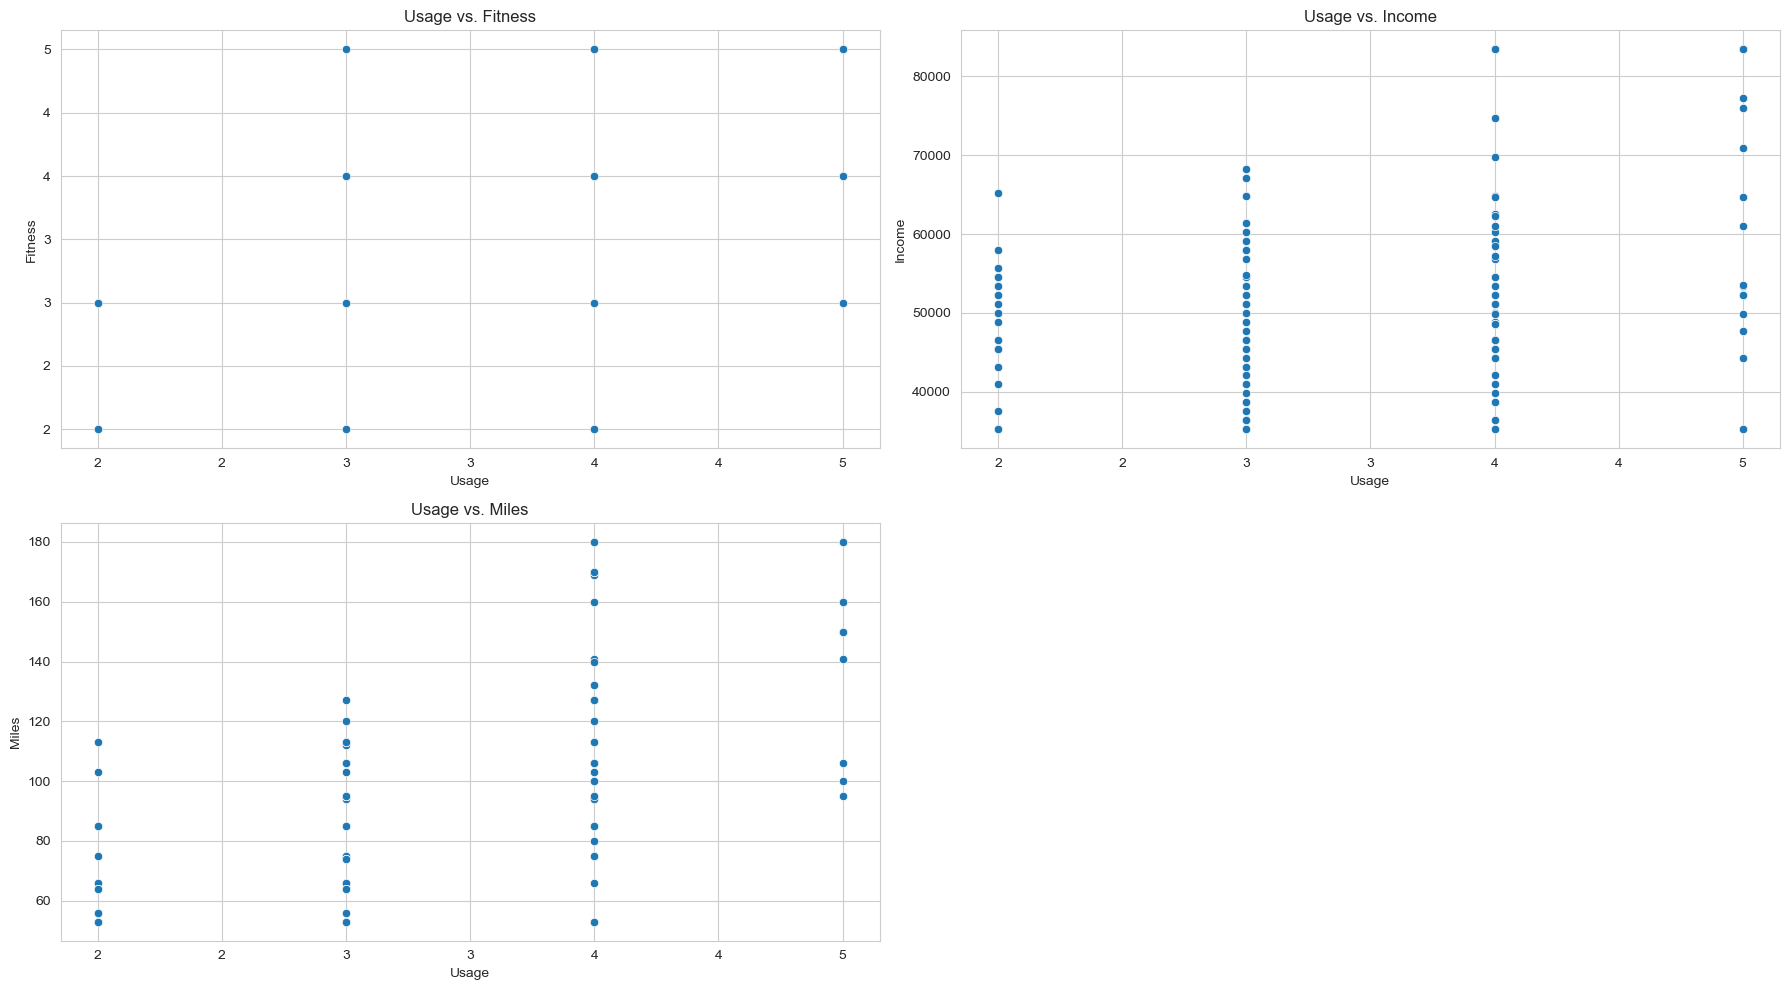

In [87]:
# comparison of Usage with various other factors

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))

# Plot 1: Usage vs. Fitness (Numerical vs. Numerical)
a=sns.scatterplot(data=df_aerofit_copy, x='Usage', y='Fitness', ax=axs[0][0])
axs[0][0].set_title("Usage vs. Fitness")
a.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))
a.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: int(y)))

# Plot 2: Usage vs. Income (Numerical vs. Numerical)
a=sns.scatterplot(data=df_aerofit_copy, x='Usage', y='Income', ax=axs[0][1])
axs[0][1].set_title("Usage vs. Income")
a.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))
a.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: int(y)))

# Plot 3: Usage vs. Miles (Numerical vs. Numerical)
a=sns.scatterplot(data=df_aerofit_copy, x='Usage', y='Miles', ax=axs[1][0])
axs[1][0].set_title("Usage vs. Miles")
a.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))
a.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: int(y)))

# Removing empty subplot
fig.delaxes(axs[1][1])

plt.tight_layout()

# Show the combined subplot
plt.show()

### Observations: -

    Graph 1:- 1. The plot shows comparison between Usage and Fitness
              2. Customers who plans usage twice a week on an avg – have self-rated fitness on a scale of 2 & 3; These form 
                 1 cluster.
              3. Customers who plans usage 3 times or 4 times a week on an avg – have self-rated fitness across the scale
                 1 to 5; These form 2nd cluster & 3rd cluster respectively.
              4. Customers who plans usage 5 times a week on an avg – have self-rated fitness on a scale  of 3, 4, 5; These 
                 form 4th cluster.
              5. The more the self-rated fitness score – more the planned useage each week. 
              6. There is strong positive correlation between customer’s planned Usage of product & the self-rated fitness 
                 score.
           
    Graph 2:- 1. The plot shows comparison between Usage and Miles
              2  Customers who plans usage twice a week on an avg - expect to walk/run max upto 110 miles; These form 1 
                 cluster.
              3. Customers who plans usage thrice a week on an avg - expect to walk/run max upto 130 miles; These form 2nd 
                 cluster.
              4. Customers who plans usage four times a week on an avg - expect to walk/run max upto 180 miles; These form 
                 3rd cluster.
              5. Customers who plans usage four times a week on an avg - expect to walk/run starting from 90 miles & max  
                 upto 180 miles; These form 4th cluster.
              6. The more the planned usage of product – related to  the upward trend in  the expected avg no of miles each  
                 week; 
              7. There is strong positive correlation between planned Usage of product & the expected avg no of miles to 
                 walk/run each week.
   
    Graph 3:- 1. The plot shows comparison between Usage and Income
              2. There is one segment of customers with usage of product of 2 to 3 times each week & having  annual income   
                 in the range upto 65K
              3. These set of customers with less frequent usage plans may prioritize a more cost-effective product options 
                 (i.e. KP281,481)
              4  There is one segment of customers with usage of product of 4 to 5 times each week & having  annual income  
                 in the range spread across 
              5. These customers who plan for more frequent usage and have income levels may prefer product like KP 781
              6. The planned usage of product – related to  the range of the annual income of the customers 
              7. There is correlation between planned Usage of product & annual income of the customers 

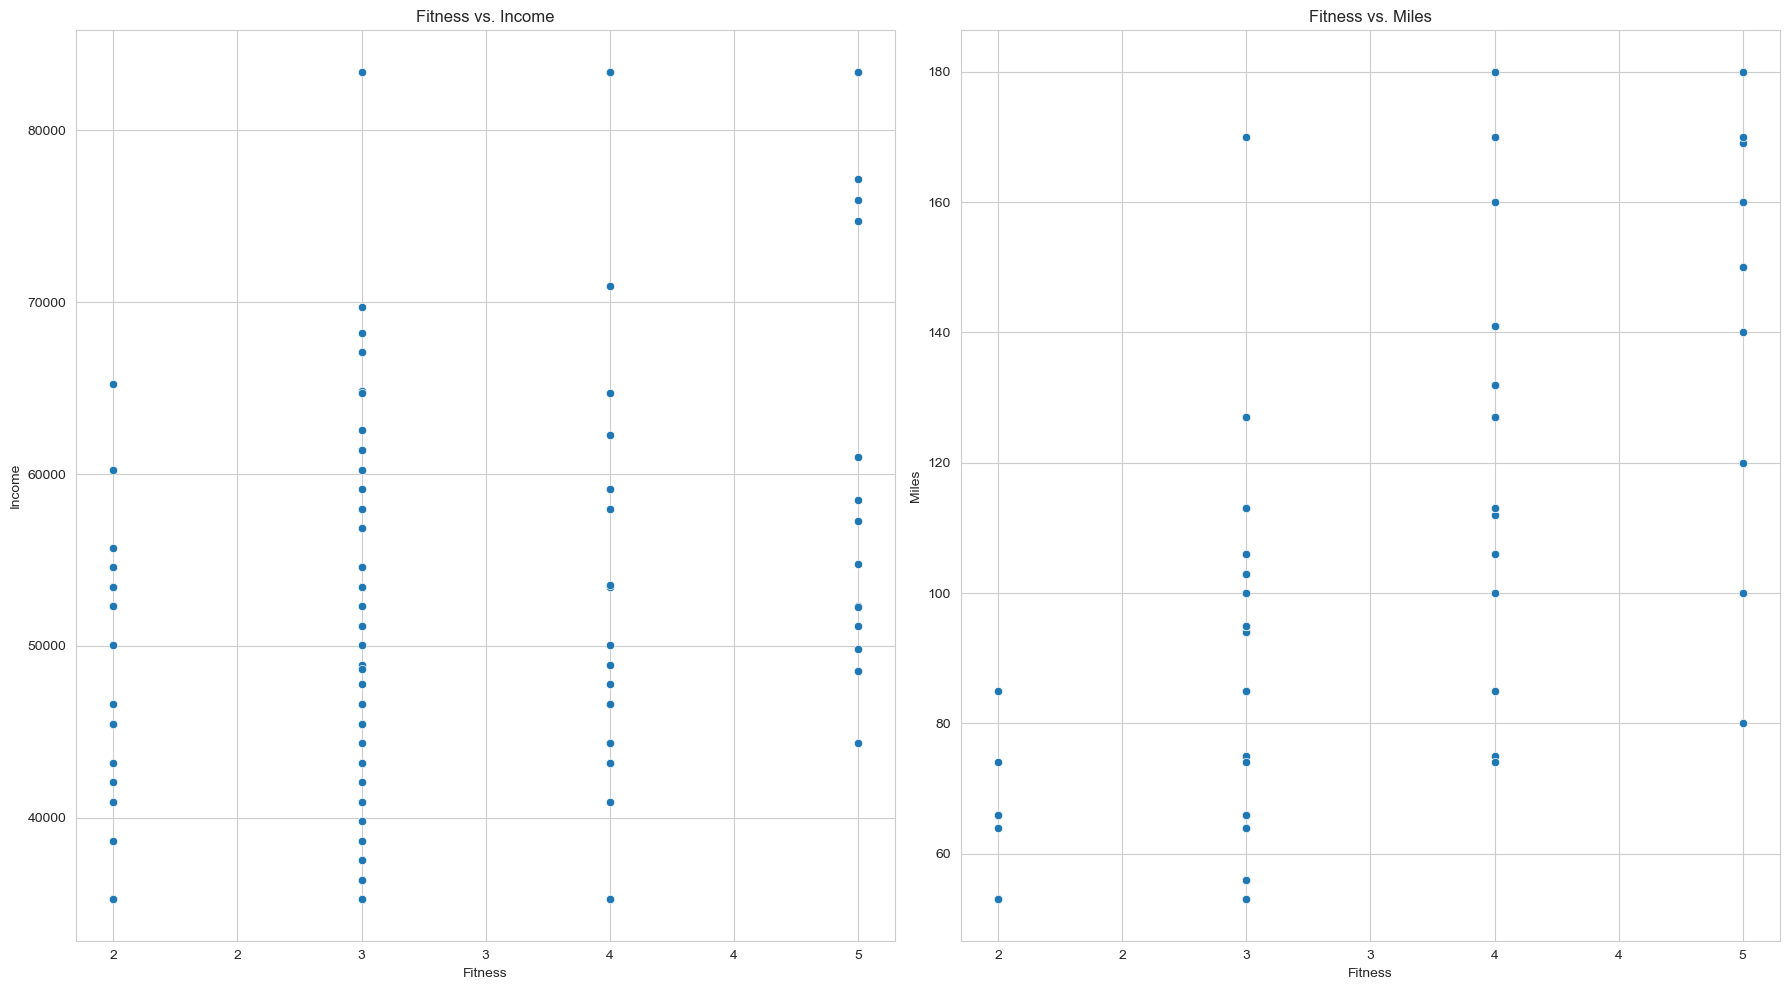

In [88]:
# comparison of Fitness with various other factors

# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 10))

# Plot 1: Fitness vs. Income (Numerical vs. Numerical)
a=sns.scatterplot(data=df_aerofit_copy, x='Fitness', y='Income', ax=axs[0])
axs[0].set_title("Fitness vs. Income")
a.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))
a.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: int(y)))

# Plot 2: Fitness vs. Miles (Numerical vs. Numerical)
a=sns.scatterplot(data=df_aerofit_copy, x='Fitness', y='Miles', ax=axs[1])
axs[1].set_title("Fitness vs. Miles")

a.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))
a.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: int(y)))

plt.tight_layout()

plt.show()

### Observations: -

    Graph 1:- 1. The plot shows comparison between Fitness and Income
              2. Segment of customers with self-rated fitness core of 3 & having  annual income in the range upto 70K
              3. These set of customers  essential showing a max count of customers above 90 & they may prioritize a more 
                 cost-effective treadmill options (i.e. KP281,KP481)
              4. Segment of customers with self-rated fitness core of 2 are having annual income in the range upto 65K
              5. Segment of customers with self-rated fitness core of 4 are having annual income range spread majorly   
                 between 40K to 60K
              6. Segment of customers with self-rated fitness core of 5 are having annual income range spread across  
                 starting from 45 K to 80K
              8. These customers rate themselves as being in excellent shape and have mid to High income levels 
              7. They may prefer treadmill like KP781. The more the annual Income, more the  self-rated fitness score.
                 There is positive correlation between customer’s annual Income & the self-rated fitness score.
         
    Graph 2:- 1. The plot shows comparison between Fitness and Miles
              2  Customers  who expect to walk/run in range starting 50 miles upto 85 miles have self-rated  
                 fitness score of 2; This form 1 cluster.
              3. Customers who expect to walk/run in range starting 50 miles upto 170 miles have self-rated 
                 fitness score of 3; This form 2nd cluster.
              4. Customers who expect to walk/run in range starting 70 miles upto 180 miles have self-rated  
                 fitness score of 4; This form 3rd cluster.
              5. Customers with who expect to walk/run in range starting 80 miles upto 180 miles have self-rated  
                 fitness score of 5; This form 4th cluster.
              6. The more the expected avg no of miles each week, more the self-rated fitness score.
              7. There is strong positive correlation between customer’s annual Income & the self-rated fitness score. 

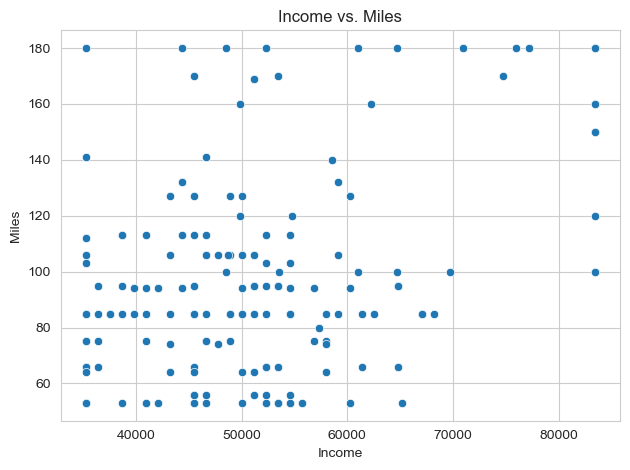

In [89]:
# comparison of Income with various other factors


# Plot: Fitness vs. Miles (Numerical vs. Numerical)
plt1=sns.scatterplot(data=df_aerofit_copy, x='Income', y='Miles')
plt1.set_title("Income vs. Miles")

plt.tight_layout()

plt.show()

### Observations: -

    Graph 1:- 1. The plot shows comparison between Income and Miles
              2. Segment of customers with Annual Income in the range from 35K to 65K have expect walk/run each week from 59 
                 to 135 miles. These resemble 1 cluster which is densely populated.
              3. These set of customers may prioritize purchase for treadmill options (i.e. KP281,481) [check for miles  
                 factor in the KP281 & KP481 product]
              4. There is 1 more cluster of customers with Income above 80K & having expected walk/run each week in range 
                 starting 100 miles upto 180 miles.
              5. This showcase an upward trend [for customers with higher Annual income range]
              6. There is correlation between Annual Income & expected avg no of miles each week

## Multivariate Analysis

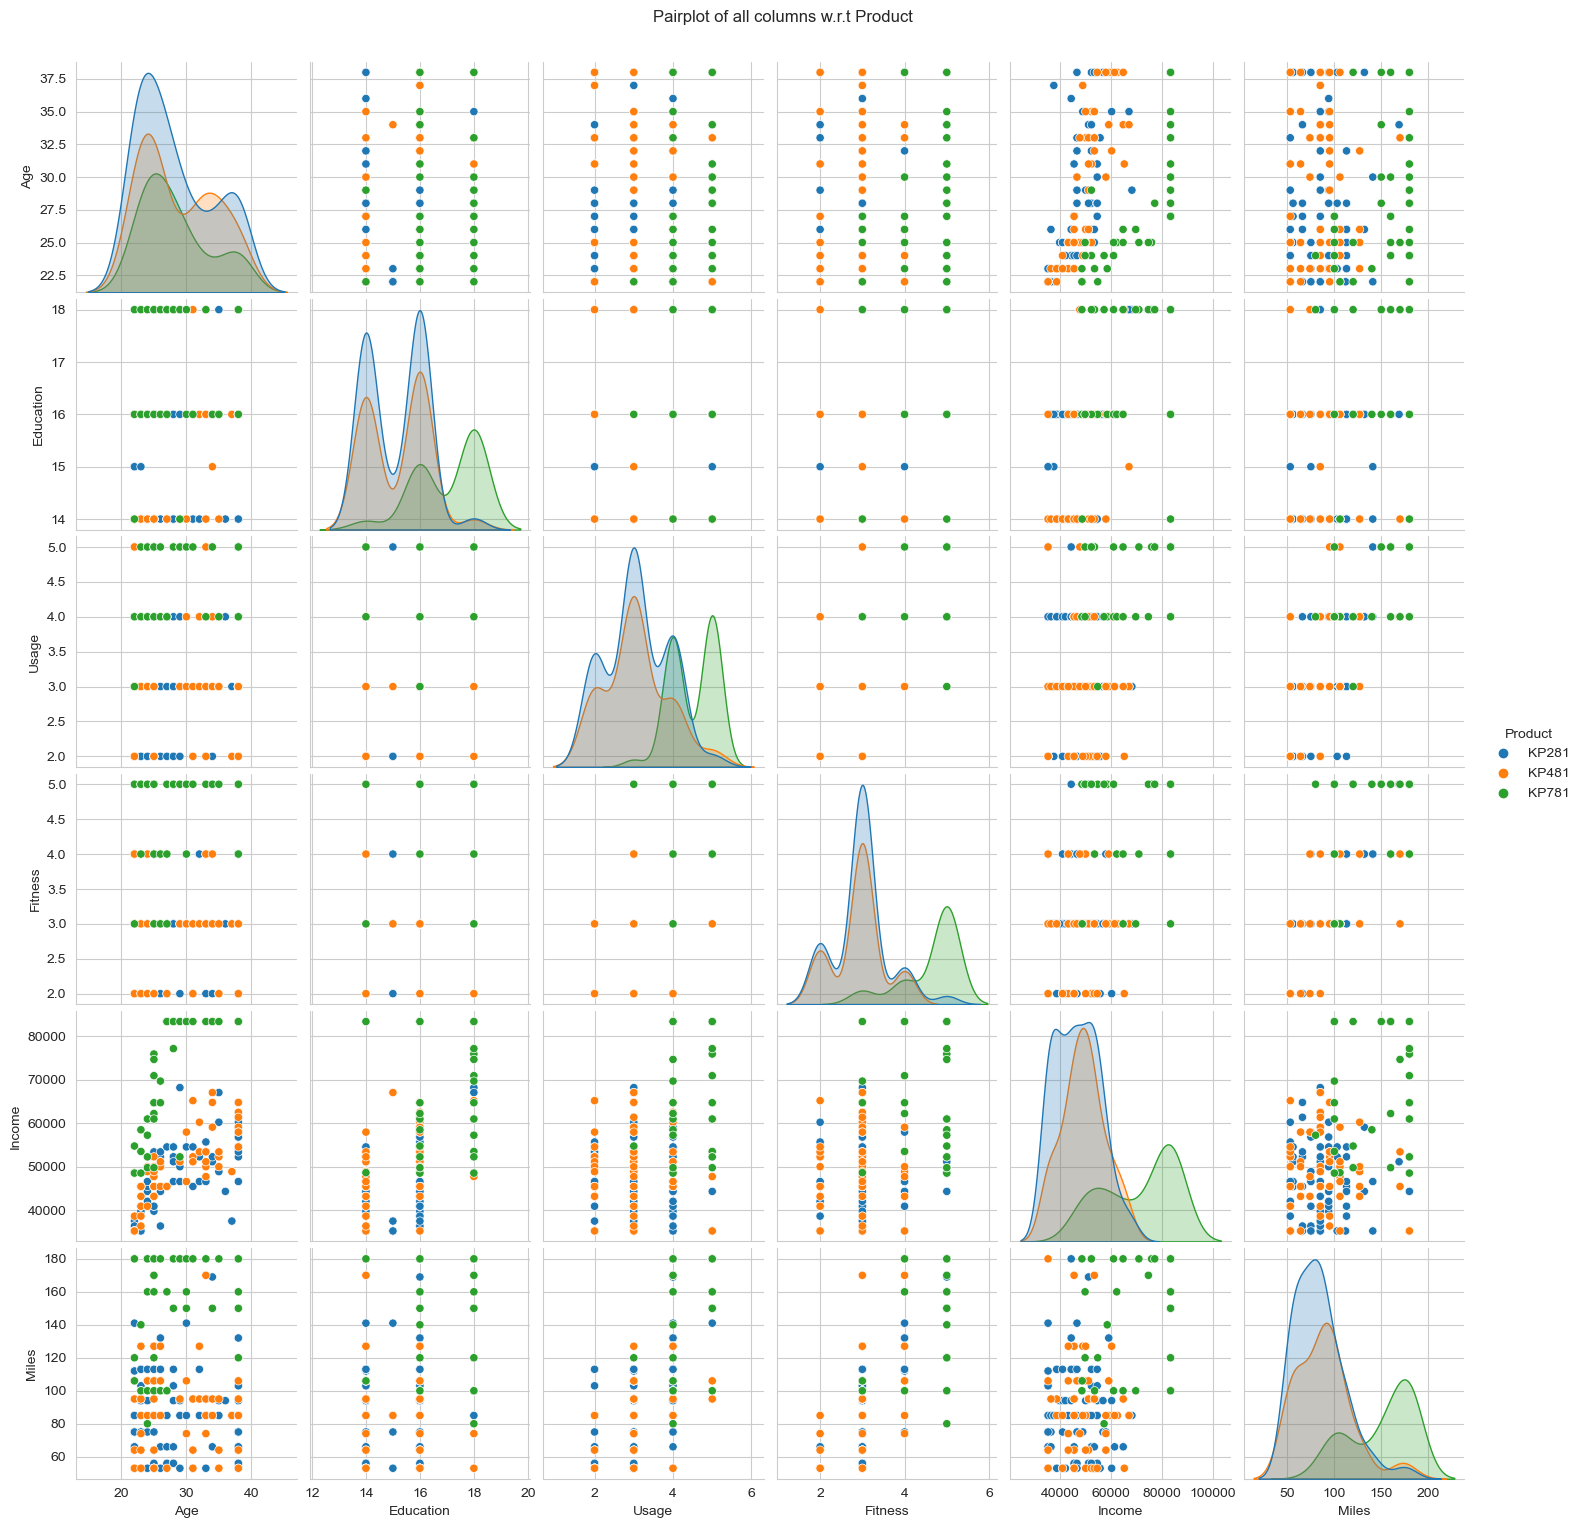

In [90]:
# PairPlots for Product

pairplot = sns.pairplot(data=df_aerofit_copy, hue='Product')
pairplot.fig.suptitle("Pairplot of all columns w.r.t Product", y=1.02)
plt.show()

### Observations: -

In the above pair plot the correlation with other attributes are pivotted around the product purchased

1. The age group between 20-30 and have purchased KP781 usually covered 150-180 miles on average as compared to rest.
2. The age group between 20-35 and have purchased KP281 usually covered 50-110 miles on average as compared to rest.
3. The age group between 25-35 and have income range of 35k-55k, purchased KP281 ; same goes for rest.
4. KP781 have more people(age between 20-40) with education level 16 and 18.
5. People having education of 16 and income range between 35k-65k, have a diversified product purchasing.
6. People covering 50-100 miles and covering 25-40 have purchased KP481.

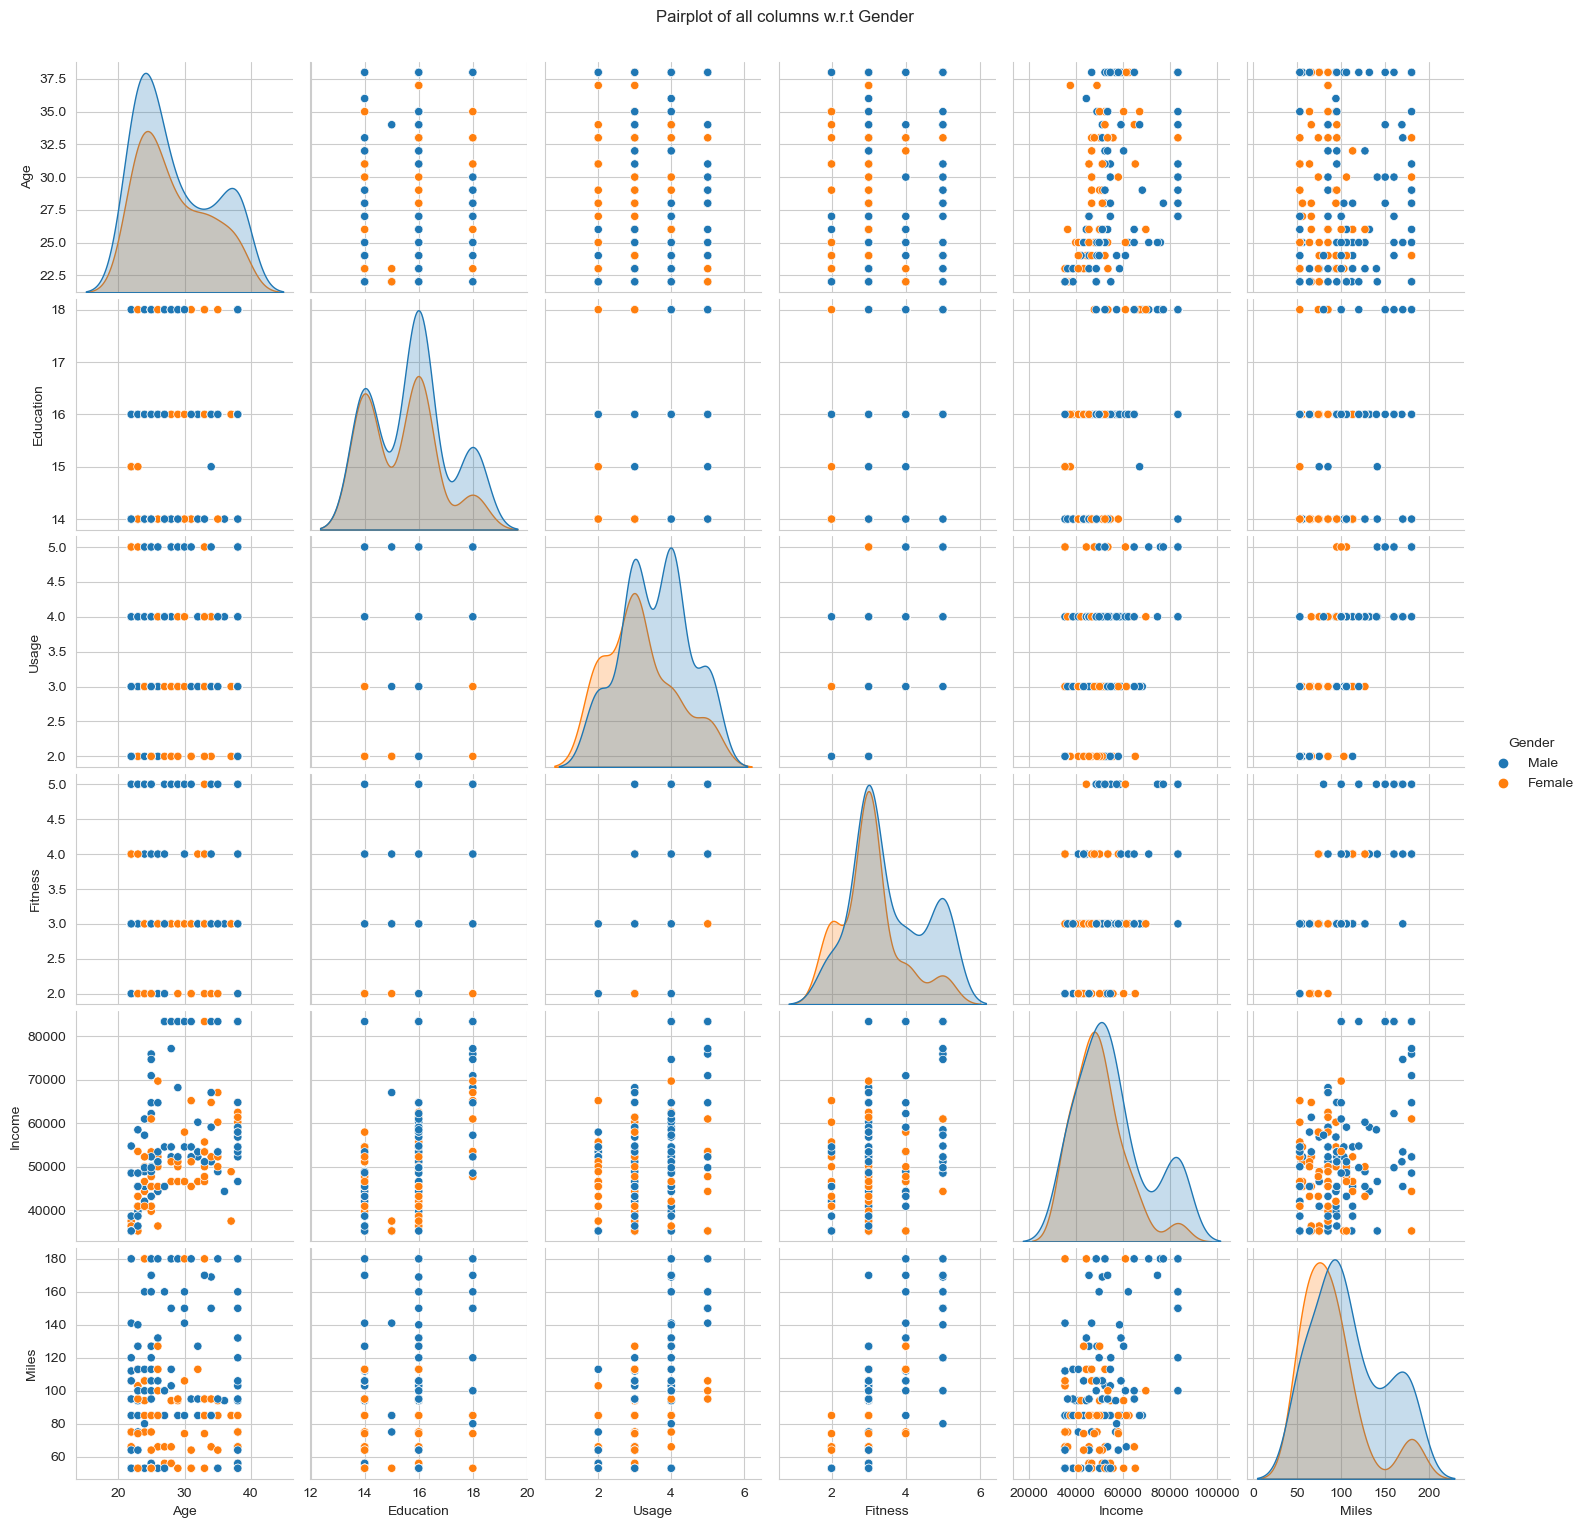

In [91]:
# PairPlots for Gender

pairplot = sns.pairplot(data=df_aerofit_copy, hue='Gender')
pairplot.fig.suptitle("Pairplot of all columns w.r.t Gender", y=1.02)
plt.show()

### Observations: -

In the above pair plot the correlation with other attributes are pivotted around the gender of the person
1. More people who are male lie in age range between 20-30 and they have covered miles between 80-120
2. Males having fitness level of 3 mostly have income range between 40k-70k
3. Females with usage level of 2, have income range between 25k-50k
4. Females with age range of 27-30, have fitness level of 3

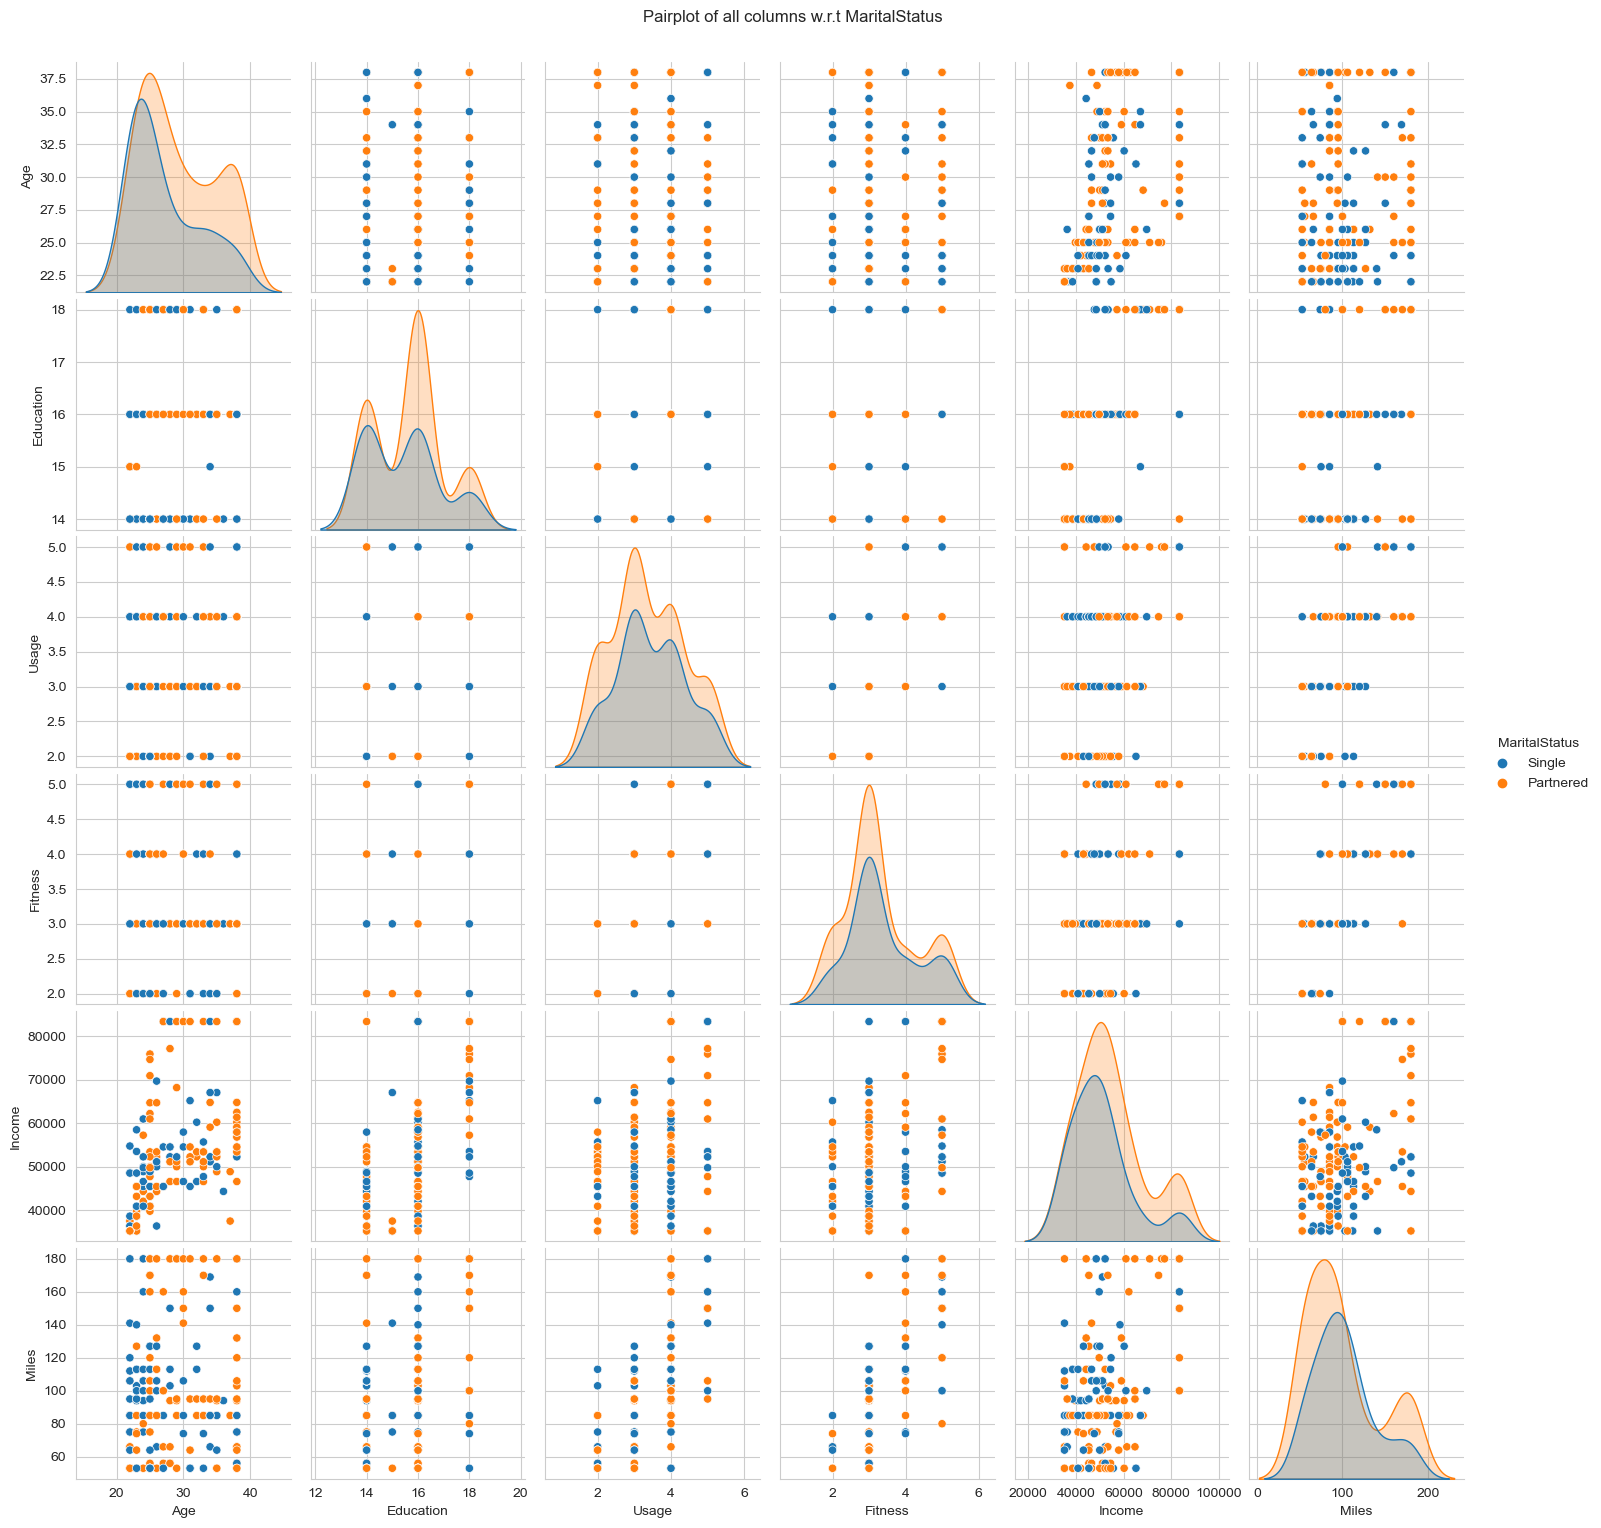

In [92]:
# PairPlots for MaritalStatus

pairplot = sns.pairplot(data=df_aerofit_copy, hue='MaritalStatus')
pairplot.fig.suptitle("Pairplot of all columns w.r.t MaritalStatus", y=1.02)
plt.show()

### Observations: -

In the above pair plot the correlation with other attributes are pivotted around the marital status of the person
1. Age range between 22-25 who are single, have covered miles in range of 80-110 as compared to partnered who have age between
   25-25 and have covered 180 miles.
2. Persons who are partnered and have fitness level of 3, mostly have income range between 50k-60k.
3. The persons (both marital status) who lie around age of 25 and have income of 40k-60k, are more active (refer to clusters)
4. Married people with education of 16 have covered ~50-120 miles on average

In [93]:
# Making a copy of dataset to tackle corr between all integer based values

df_aerofit_copy1=df_aerofit_copy[['Age','Education','Usage','Fitness','Income','Miles']].corr()
df_aerofit_copy1

Age  Education     Usage   Fitness    Income     Miles
Age        1.000000   0.280203  0.003003  0.044482  0.515780  0.017828
Education  0.280203   1.000000  0.412484  0.441082  0.636355  0.381117
Usage      0.003003   0.412484  1.000000  0.660556  0.469009  0.773487
Fitness    0.044482   0.441082  0.660556  1.000000  0.537574  0.825967
Income     0.515780   0.636355  0.469009  0.537574  1.000000  0.528245
Miles      0.017828   0.381117  0.773487  0.825967  0.528245  1.000000

### Observations: -

The above table shows the correlation between all integer based columns and there is a very strong correlation between
Fitness and miles (0.825) and the least correlation is between Age and miles (0.017)

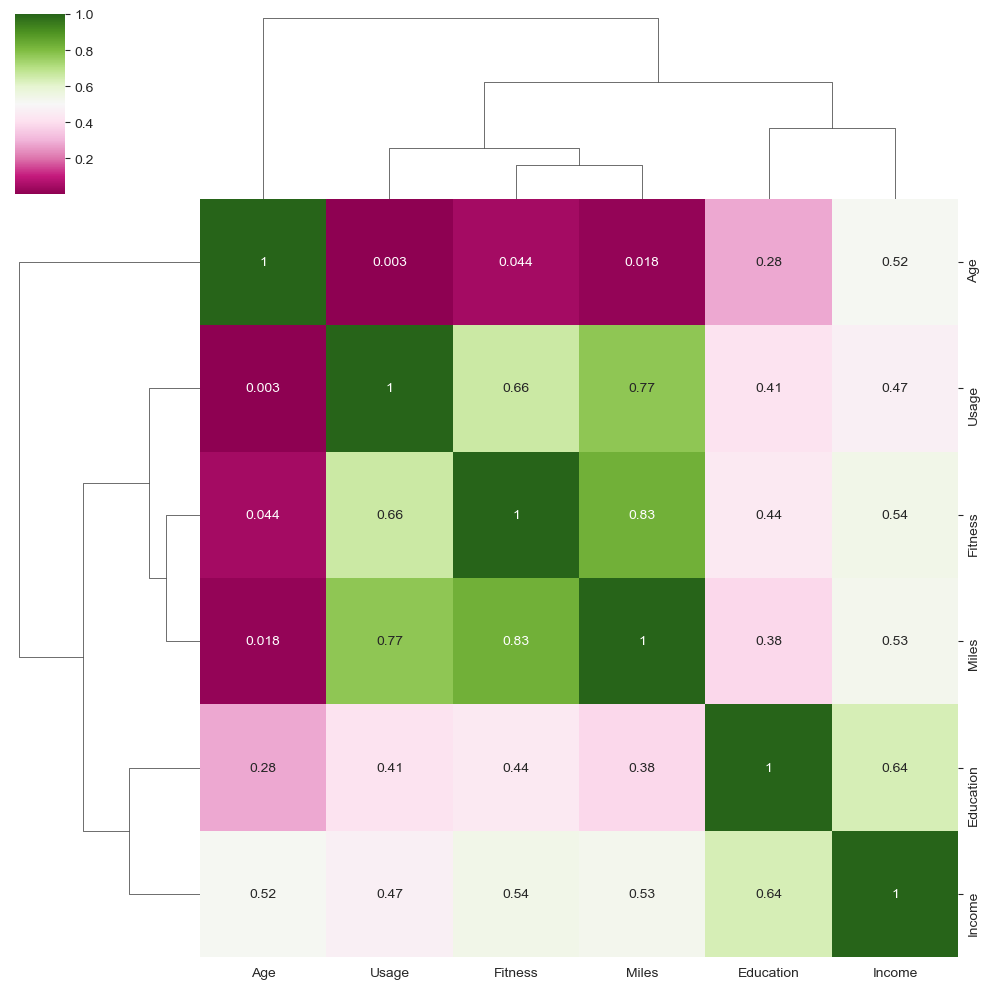

In [94]:
sns.clustermap(data=df_aerofit_copy1, annot=True, cmap='PiYG')
plt.show()

### Observations: -

1. There is strong correlation between Age and Miles ; Age and Usage
2. Similarly there is a strong correlation between Miles and Fitness
3. Least correlation exists between Miles and Income
4. Education high correlation with Income and sufficiently correlated to Usage, Fitness too
5. Also correlation between Fitness, Usage and Miles is seen which depicts, more the usage of product=>more miles run and 
   therefore more fitness achieved

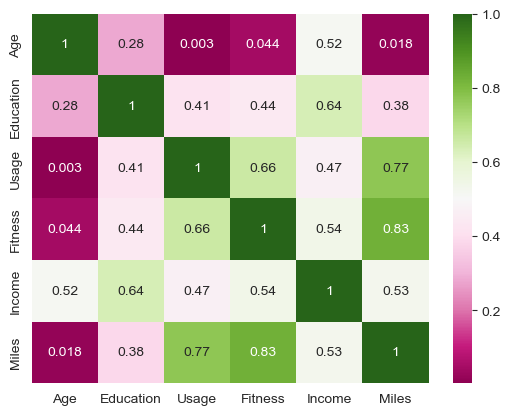

In [95]:
sns.heatmap(data=df_aerofit_copy1, annot=True, cmap='PiYG')
plt.show()

### Observations: -

1. Miles and Fitness and Miles and Usage are highly correlated, which means if a person fitness level is high their usage is more
2. Income and education show a strong correlation. High-income and highly educated people prefer high-end models (KP781) (also mentioned during analysis of Categorical variables)
3. There is no corelation between Usage & Age or Fitness & Age which means, Age should not be barrier to use the any model of the product
4. Correlation between Age and Miles is 0.018
5. Correlation between Education and Income is 0.64
6. Correlation between Usage and Fitness is 0.66
7. Correlation between Fitness and Age is 0.044
8. Correlation between Income and Usage is 0.47

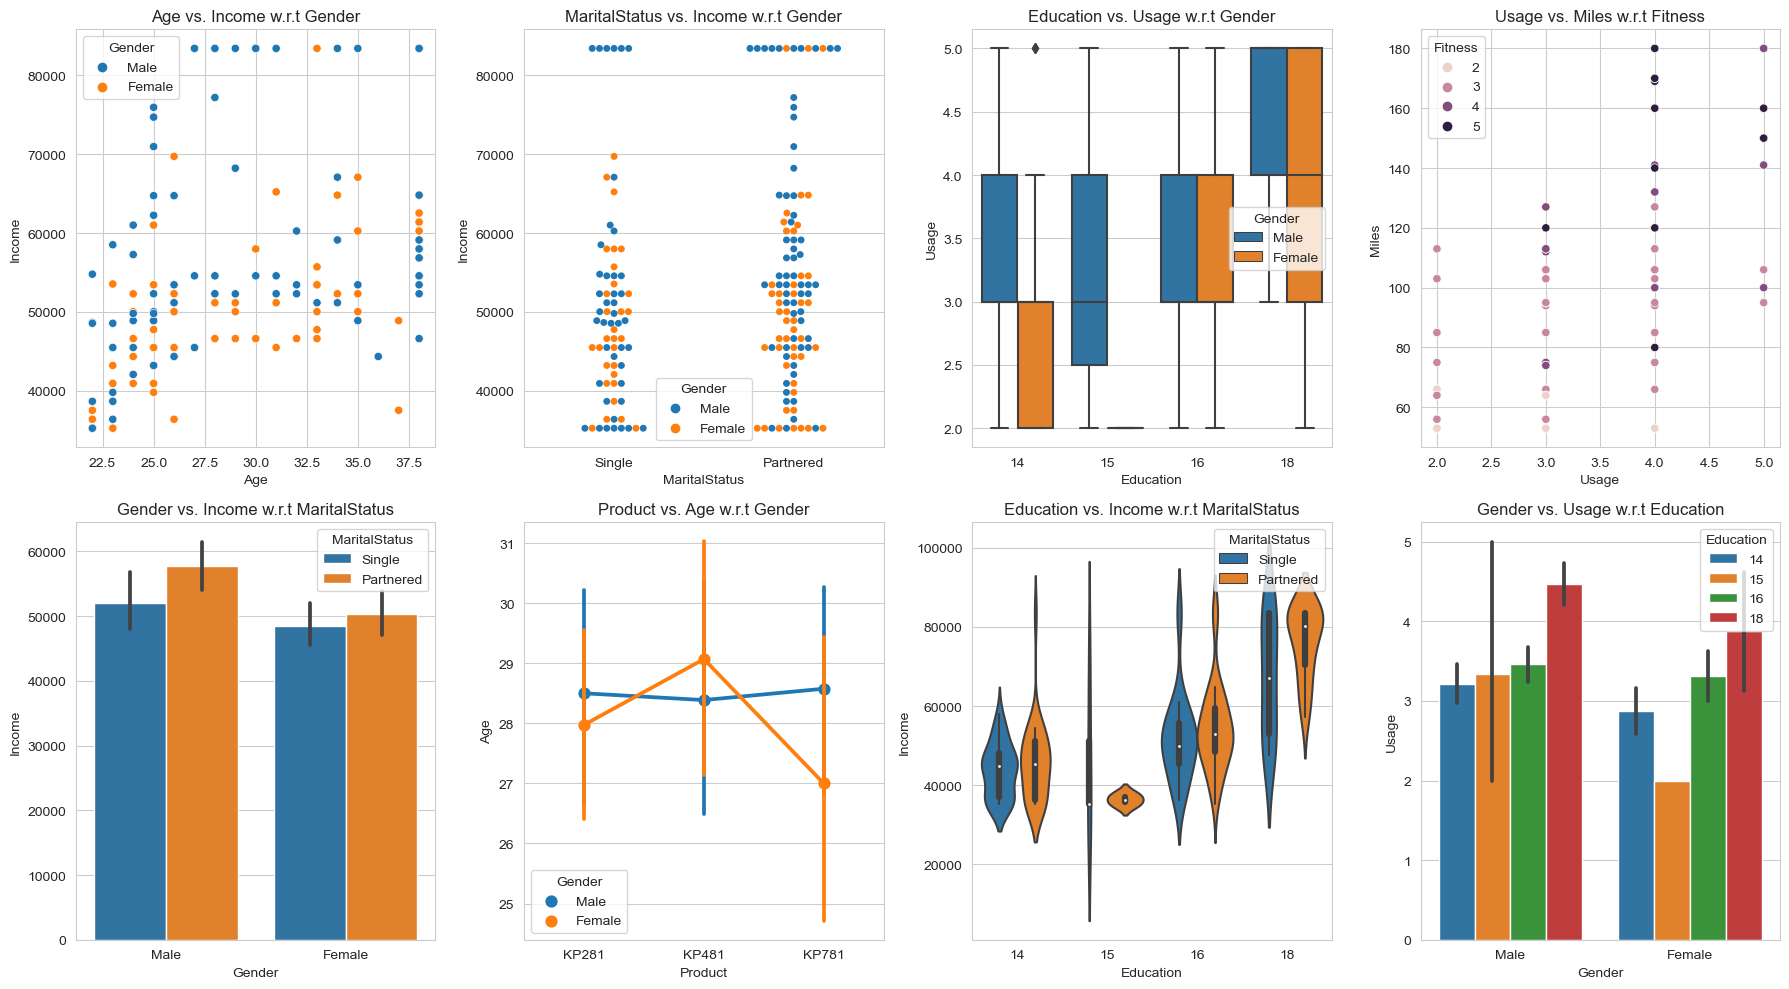

In [96]:
# comparison of Usage with various other factors

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))

# Plot 1
sns.scatterplot(data=df_aerofit_copy, x='Age', y='Income', hue='Gender', ax=axs[0][0])
axs[0][0].set_title("Age vs. Income w.r.t Gender")

# Plot 2
sns.swarmplot(data=df_aerofit_copy, x='MaritalStatus', y='Income', hue='Gender', ax=axs[0][1])
axs[0][1].set_title("MaritalStatus vs. Income w.r.t Gender")

# Plot 3
sns.boxplot(data=df_aerofit_copy, x='Education', y='Usage', hue='Gender', ax=axs[0][2])
axs[0][2].set_title("Education vs. Usage w.r.t Gender")

# Plot 4
sns.scatterplot(data=df_aerofit_copy, x='Usage', y='Miles', hue='Fitness', ax=axs[0][3])
axs[0][3].set_title("Usage vs. Miles w.r.t Fitness")

# Plot 5
sns.barplot(data=df_aerofit_copy, x='Gender', y='Income', hue='MaritalStatus', ax=axs[1][0])
axs[1][0].set_title("Gender vs. Income w.r.t MaritalStatus")

# Plot 6
sns.pointplot(data=df_aerofit_copy, x='Product', y='Age', hue='Gender', ax=axs[1][1])
axs[1][1].set_title("Product vs. Age w.r.t Gender")

# Plot 7
sns.violinplot(data=df_aerofit_copy, x='Education', y='Income', hue='MaritalStatus', ax=axs[1][2])
axs[1][2].set_title("Education vs. Income w.r.t MaritalStatus")

# Plot 8
sns.barplot(data=df_aerofit_copy, x='Gender', y='Usage', hue='Education', ax=axs[1][3])
axs[1][3].set_title("Gender vs. Usage w.r.t Education")
 
plt.tight_layout()

plt.show()

### Observations: -

The observation for these plots are already descirbed in above pairplots/other comparison plots and these plots are made, just to increase the visualisation angles so as to understand each relation more closely as compared to a general pairplot.

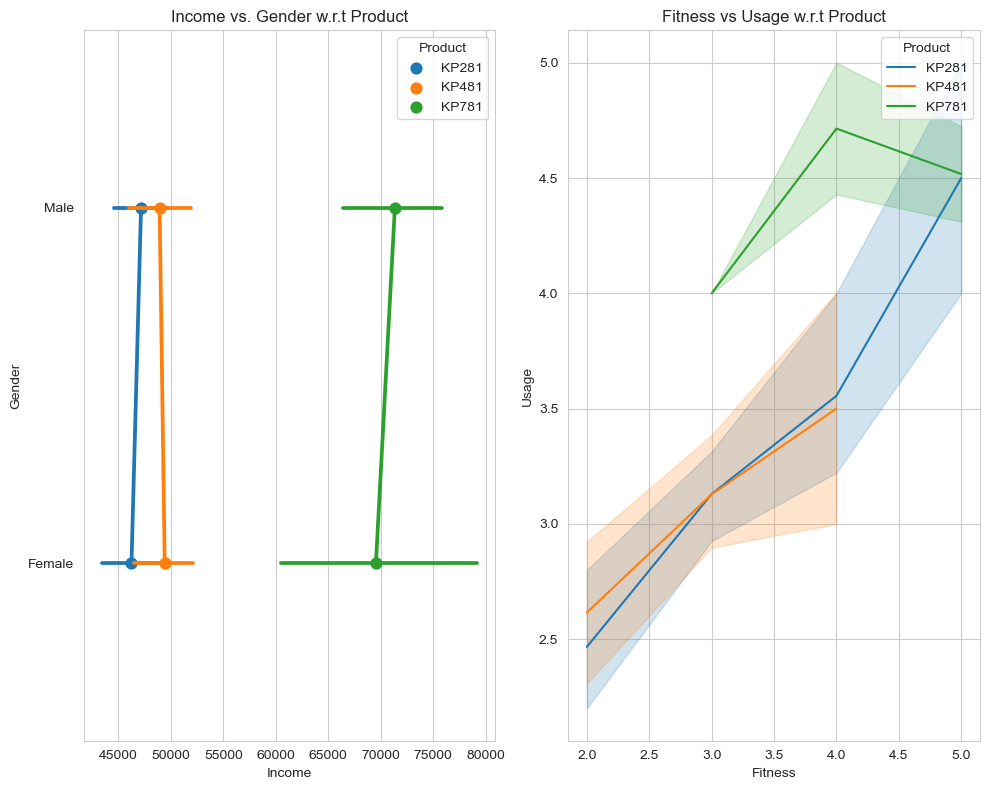

In [97]:
# Comparison of Usage with various other factors

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

# Plot 1
sns.pointplot(data=df_aerofit_copy, x='Income', y='Gender', hue='Product', ax=axs[0])
axs[0].set_title("Income vs. Gender w.r.t Product")

# Plot 2
sns.lineplot(data=df_aerofit_copy, x='Fitness', y='Usage', hue='Product', ax=axs[1])
axs[1].set_title("Fitness vs Usage w.r.t Product")

plt.tight_layout()

plt.show()

### Observations: -

The observation for these plots are already descirbed in above pairplots/other comparison plots and these plots are made, just to increase the visualisation angles so as to understand each relation more closely as compared to a general pairplot.

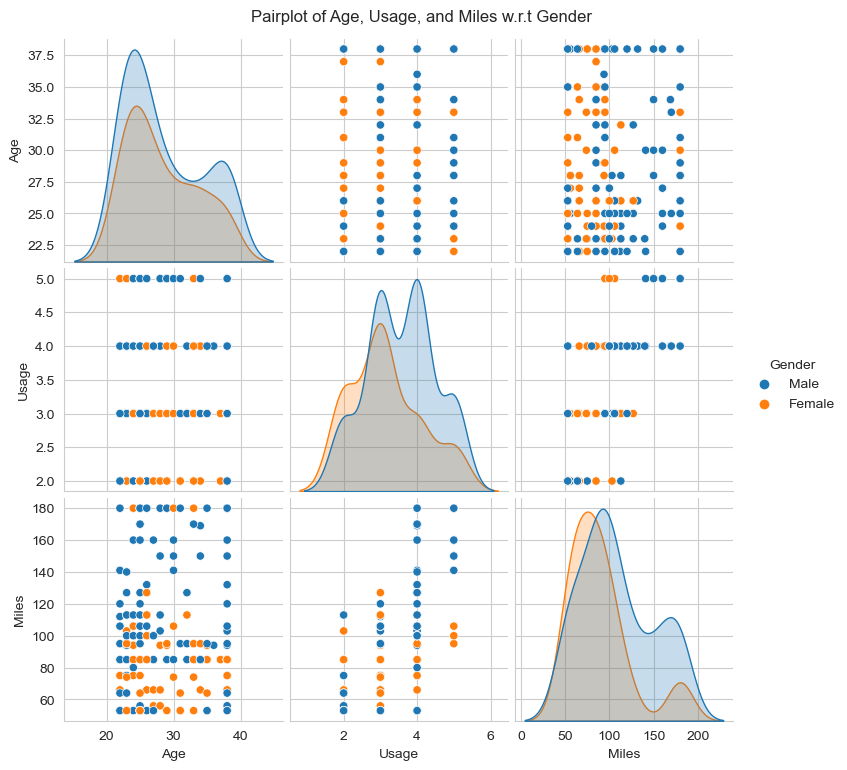

In [98]:
# Plotting for age,usage and miles basing Gender as point of comparison

pairplot = sns.pairplot(data=df_aerofit_copy, vars=['Age', 'Usage', 'Miles'], hue='Gender')
pairplot.fig.suptitle("Pairplot of Age, Usage, and Miles w.r.t Gender", y=1.02)
plt.show()

### Observations: -

The observation for these plots are already descirbed in above pairplots/other comparison plots and these plots are made, just to increase the visualisation angles so as to understand each relation more closely as compared to a general pairplot.

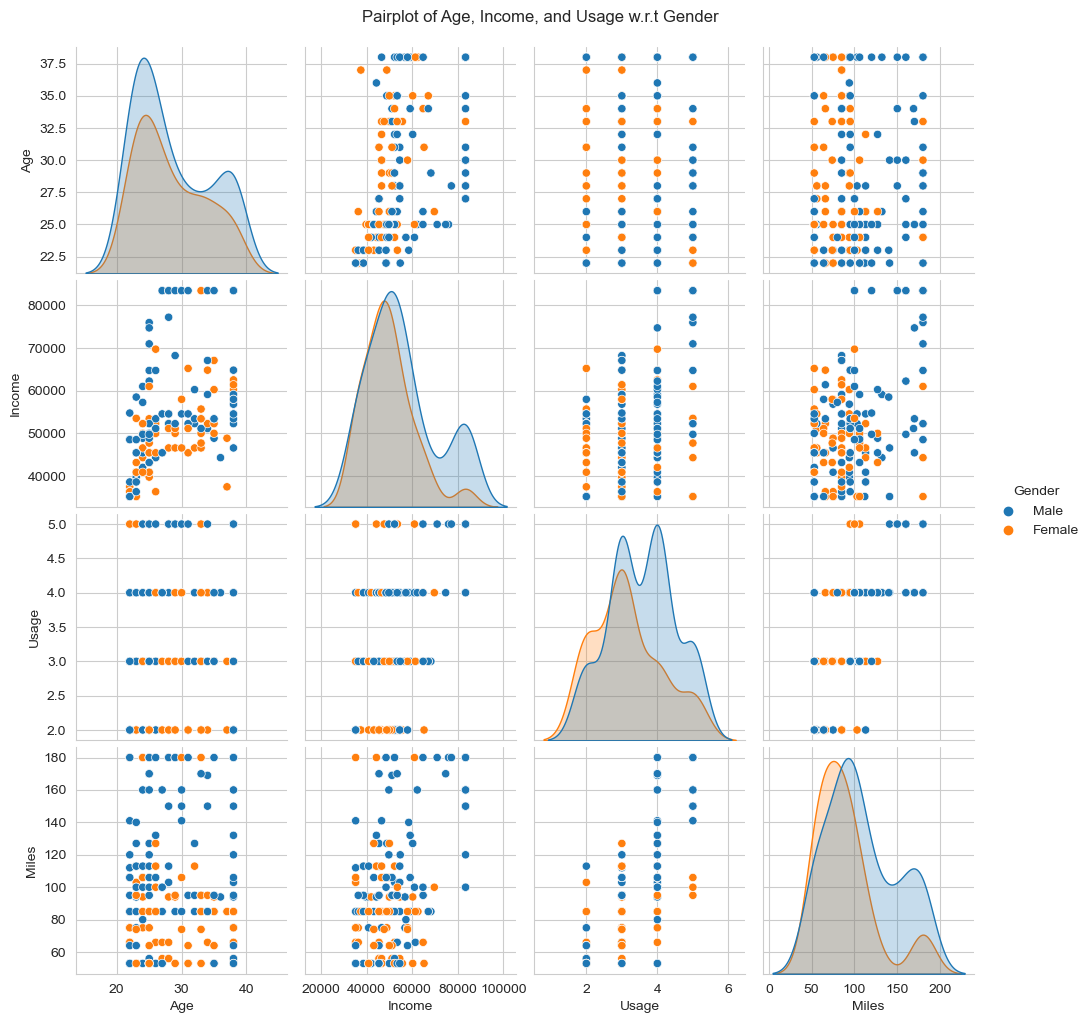

In [99]:
# Plotting for age,income and usage basing Gender as point of comparison

pairplot = sns.pairplot(data=df_aerofit_copy, hue='Gender', vars=['Age', 'Income', 'Usage', 'Miles'])
pairplot.fig.suptitle("Pairplot of Age, Income, and Usage w.r.t Gender", y=1.02)
plt.show()

### Observations: -

The observation for these plots are already descirbed in above pairplots/other comparison plots and these plots are made, just to increase the visualisation angles so as to understand each relation more closely as compared to a general pairplot.

# Customer Profiling

### For KP281

1.  Easily affordable entry level product, which is also the maximum selling product
2.  KP281 is the most popular product among the entry level customers
3.  This product is easily afforded by both Male and Female customers
4.  Average distance covered in this model is around 70 to 90 miles
5.  Product is used 3 to 4 times a week
6.  Most of the customer who have purchased the product have rated Average shape as the fitness rating (under 3)
7.  Younger to Elder age group, i.e., beginner level customers prefer this product
8.  Females who are Partnered prefer more than Female who is single
9.  Income range between 39K to 53K have preferred this product (Less to medium earning)
10. People between age of 25-30 have usages of 2
11. Female with income 35k, have miles covered < 105
12. People with education level as 16  and age>32 have income around 45k-50k
13. People having incomes range between 35k-45k and 50k-60k have usage as 4
14. People having incomes range between 45k-50k have usage as 2 whereas 60k-70k have 3
15. People with education level as 16  and age>45 have income around 60k-70k

### For KP481

1.  This is an Intermediate level Product
2.  KP481 is the second most popular product among the population
3.  People prefer this product mostly to cover more miles than fitness
4.  Average distance covered in this product is from 70 to 130 miles per week
5.  Fitness Level of this product users varies from Bad to Average Shape depending on their usage
6.  Probability of Male buying KP481 is significantly higher than Female
7.  KP481 product is specifically recommended for Female who are intermediate users
8.  Average Income of the person who buys KP481 is ~45K
9.  Average Usage of this product is 3-4 days per week
10. More Partnered people prefer this product than Single
11. The age range of people buying KP481, is roughly between 24-34 years
12. People who are under 40 years of age have an usage of 2
13. People with education as 13 have income around 45k-60k
14. People with age 35-40, have income around 60k-70k and education level =16 and age<22 have income between 45k-50k
15. Male with income range between 60k-70k, cover 100-150 miles on an average per week

### For KP781

1.  Due to High Price & being the advanced type, people prefers less of this product
2.  People use this product mainly to cover more distance
3.  People who use this product have rated excelled shape as fitness rating
4.  People walk/run average 120 to 200 or more miles per week on his product
5.  People use 4 to 5 times a week at least
6.  Female who are running average 180 miles (extensive exercise) , are using product KP781, which is higher than Male average using same product
7.  Average Income of KP781 buyers are over 75K per annum
8.  Partnered Female bought KP781 treadmill compared to Partnered Male
9.  This product is preferred by the people where the correlation between Education and Income is High
10. People who are educated more than 16 years prefered to buy this
11. Fitness level more than 4 for people who bought this
12. Mostly preferred by Male peoples as compared to Females
13. People with age range of 22-38 and having fitness level as 5, purchased this product
14. Middle aged to higher age peoples tend to use this model to cover more distance.
15. These people(having usage >=4) have fitness level of around >5

# Business Insights

1.  Product KP281 brings in the highest revenue, KP481 and KP781 come next in line respectively
2.  ~60-40% distribution are of the (single and partnered) & (male and female) product buyers
3.  Majority of the buyers spend 14, 16, 18 years on their education
4.  Majority of the people are in their early age groups of 22-33 years
5.  Most of the users use the treadmill 3-4 times a week
6.  Most of the users rate themselves average in terms of their fitness levels
7.  Majority of the users earn between 35k-60k annually
8.  Majority of the users set target miles expected to be walked/ran between 53 and 132 miles on am average
9.  KP281, KP481 products have almost similar buyers profile, except Male Partnered who preferred KP481 & Female Partnered for KP281
10. 75% of people are earning less than 60k, and people who earning more than 60k prefer KP781
11. KP781 had unique observations among other products when it comes to more usage or high fitness profiles
12. Probability of Buying KP281 increased from 44.44% to 58.7%, if person is Female and Partnered
13. Probability of Buying KP781 increased from 22.22% to 32.56%, if person is Male and Single
14. Probability of Buying KP781 decreased from 22.22% to 8.7%, if people is Female and Partnered
15. Highly educated peoples prefer product KP781 as they could be more aware of the products typical features and its usage
16. Since KP781 more popular amongst high education/income group, so highly-educated/income peoples tend to exercise more with fitness levels
17. With Fitness level 4 and 5, the peoples tend to use high-end models (KP781/KP481) and the average number of miles is above 150 per week
18. Majority are from the age group of 20-35, most of them tend to buy KP281, followed by KP481 and KP781. It is found that people of age greater than 30 are not very keen on buying KP781 and the most probable reason is not kepping up the fitness level and under-usage of treadmills. Customers, who knows their fitness level, tend not to invest in expensive treadmills. According to probabilites, people of age between 45-35, go for KP281 more than any other age group, but for other variants it is the consumers falling age group of 25-35.

# Recommendations

1.  As KP781 premium product preferred by Males, more usage and high salaried people, we can promote this product with similar characteristics and also we can promote upcoming premium products to them
2.  KP281 & KP481 products preferred by almost similar Characteristics and KP281 is most sold product, we can promote KP481 products more and can make some no cost EMI support to increase sales
3.  Provide personalized Ads in E-commerce sites and in Social Media for better reach to similar characteristics of people with respective preferred products
4.  Come up with better, high-end, premium product for highly-educated, high income and active customers to increase revenue
5.  Campaigns to promote KP781 product for females specially since their purchase count is low compared to males
6.  Since KP281 and KP481 also brings in significant revenue and is prefered by young & less education individuals, added features and specialized discounts could help boost sales for these
7.  Aerofit should conduct market research to determine if it can attract customers with income under USD 35k to expand its customer base
8.  Female who prefer exercising equipments are very low here. Hence, we should run a marketing campaign on to encourage women to exercise more
9.  KP281 & KP481 products are preferred by the customers whose annual income lies in the range of USD 39K-53K. These models should promoted as budget-friendly products
10. As KP781 provides more features and functionalities, the product should be marketed for professionals and athletes
11. To target normal customers w.r.t KP781, it should be promotted using influencers and other international atheletes
12. Research required for expanding market beyond 50 years of age considering health pros and cons
13. Provide customer support and recommend users to upgrade from lower versions to next level versions of product after consistent usages for better fitness
14. Targetting the Age group above 40 years to recommend Product KP781 since they have more income in USD
15. Analyze user engagement data by feedback, to identify which metrics of the KP281 and KP481 models are most valued by customers so as to focus marketing efforts and product enhancements on these aspects for KP781 sales as well as increase KP281/KP481 sales
16. Examining usage patterns to determine peak usage times, workout durations, and preferred workout modes for each product. Using this information Aerofit can optimize product features and marketing campaigns
17. Determining which features of the KP781 and KP481 models are underutilized or misunderstood by customers thereby developing educational content or product updates to promote these features effectively
18. Analysis of sales data to determine price sensitivity for the KP781 and KP481 models thereby adjusting pricing strategies based on demand elasticity and competitor pricing
19. Identifying gaps in the market or areas where the current product models are not meeting customer needs. This information can guide the development of new products or product improvements
20. Attend fitness and wellness trade shows and exhibitions to showcase the KP781 and KP481 models and interact with potential customers directly
21. Offer virtual training sessions led by certified fitness trainers specifically designed for KP481/KP781 users. These sessions can help users maximize their workouts and stay motivated thereby leading to motivate peers to buy product
22. Creating targeted email/SMS/online advertising campaigns specifically focussing on users looking for compact, space-saving fitness equipment and drive their attention by highlighting the KP781s suitability for smaller spaces.
    On top of it, Offer bundle deals that include the KP781 model along with popular fitness accessories such as heart rate monitors, fitness trackers, or floor mats at a discounted price as this adds value to the purchase

# -------------------------------xxxxxxxxxxxxxxxxxxxx----------------------------------EOF